# Laptop Price Prediction

Sowrav Krishnan K

31-07-2024

## Table of Contents

#### > Problem Statement

#### > Objective

#### > Data Collection

#### > Data Description 

#### > EDA (Exploratory Data Analysis)

#### > Data Preprocessing  

#### > Visualization  

#### > Feature Engineering  

#### > Data Splitting  

#### > Model Selection

#### > Feature Selection

#### > Model Training and Evaluation 

#### > Hyperparameter Tuning

#### > Result

#### > Model Deployment

#### > Limitations

#### > Conclusion

#### > Future Work

## Problem Statement

It is crucial to understand the impact of various features such as RAM, screen size, processor, etc., on the price of a laptop. This understanding will empower customers to make informed purchasing decisions and enable retailers to implement optimized pricing strategies.

## Objective

The objective of this project is to develop a robust machine learning model that accurately predicts laptop prices based on various features.

## Data collection

In [1290]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from scipy.stats import skew,kurtosis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score, root_mean_squared_error


In [1291]:
df=pd.read_csv('D:\\Entri project\\raw_ebay.csv')
df

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
0,Lenovo,Lenovo ThinkPad L15 Gen 2 15.6” FHD Laptop Core i5 16GB RAM 512GB SSD Windows 10,15.6,16,Intel Core i5-1135G7,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,344.99
1,Lenovo,Lenovo ThinkPad 14” HD Laptop PC Computer Core i5 16GB RAM 256GB SSD Windows 10,14,16,Intel Core i5 7th Gen.,Intel HD Graphics 520,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,189.99
2,Lenovo,"Lenovo ThinkPad E14 14"" Laptop Core i5 11th Gen 16GB RAM 256GB SSD Windows 11",14,16,Intel Core i5-1135G7,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080p,Good - Refurbished,289.99
3,Dell,"Dell Latitude 15.6"" Laptop Intel Core i5 64GB RAM 2TB SSD Wi-Fi Windows 11 Pro",NaN,NaN,Intel Core i5 8th Gen.,Intel UHD Graphics 620,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,349.99
4,ASUS,"🔥NEW Asus Vivobook 15.6"" TouchScreen Laptop Intel i7-1255U 16GB RAM 512GB SSD",15.6,16,Intel Core i7-1255U,Intel Iris Xe Graphics,NaN,1920 x 1080,New,538.95
...,...,...,...,...,...,...,...,...,...,...
3976,Dell,Dell Latitude Rugged 5424 Business 14 Laptop Core i7 FHD Touchscreen RX 540 Y,14,16,i7-8650U,AMD RADEON RX 540,NaN,1920 x 1080,Excellent - Refurbished,527.21
3977,Dell,Dell Precision 3560 Workstation 15 15.6 Laptop Core i7 FHD 1080P 32GB RAM h,15.6,32,i7-1165G7,Integrated Graphics,NaN,1920 x 1080,Excellent - Refurbished,610.86
3978,Dell,Dell XPS 9320 PLUS 13 13.4 Laptop Core i7 4k uhd OLED Touchscreen 16GB RAM o,13.4,16,i7-1260P,Integrated Graphics,NaN,3456 x 2160,Excellent - Refurbished,628.30
3979,HP,3 PCS Karlash 6 Column Undated Appointment Book – Six Person Daily and Hourly...,14,8,Intel Core i5 6th Gen.,Intel HD Graphics 520,Integrated/On-Board Graphics,1920 x 1080,New,17.50


## Data Description 

The dataset contains features and prices of laptops that is sold across US. The details taken from eBay which is shopping website popular in US that allows sellers to list their product on sale and as result the dataset contains not only new products but also used and refurbished products which orginally maybe discontinued by the manufacturer. The dataset contains 3981 rows and 10 columns.

## Exploratory Data Analysis

In [1292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3981 entries, 0 to 3980
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                3949 non-null   object 
 1   Product_Description  3980 non-null   object 
 2   Screen_Size          3785 non-null   object 
 3   RAM                  3730 non-null   object 
 4   Processor            3880 non-null   object 
 5   GPU                  3247 non-null   object 
 6   GPU_Type             3258 non-null   object 
 7   Resolution           3320 non-null   object 
 8   Condition            3981 non-null   object 
 9   Price                3980 non-null   float64
dtypes: float64(1), object(9)
memory usage: 311.1+ KB


From this it is clear that all the only Price is numerical column and all the other columns are categorical. The columns 'RAM', 'Screen Size', are typically numerical values, so there are chances there is discrepancy in values.

In [1293]:
df.describe(include='all')

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
count,3949,3980,3785,3730,3880,3247,3258,3320,3981,3980.000000
unique,46,3980,63,27,335,304,19,76,7,NaN
top,Dell,Lenovo ThinkPad L15 Gen 2 15.6” FHD Laptop Core i5 16GB RAM 512GB SSD Windows 10,14,16,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,NaN
freq,1513,1,1226,1614,459,1108,2678,2002,1156,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521.743198
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.283545
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324.562500
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.850000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.000000


In [1294]:
df.nunique()

Brand                    46
Product_Description    3980
Screen_Size              63
RAM                      27
Processor               335
GPU                     304
GPU_Type                 19
Resolution               76
Condition                 7
Price                  1527
dtype: int64

In [1295]:
columns=df.columns
columns

Index(['Brand', 'Product_Description', 'Screen_Size', 'RAM', 'Processor',
       'GPU', 'GPU_Type', 'Resolution', 'Condition', 'Price'],
      dtype='object')

In [1296]:
for i in columns:
    x=df[i].unique()
    print({i},':')
    print(x)
    print()

{'Brand'} :
['Lenovo' 'Dell' 'ASUS' 'HP' 'Acer' 'Microsoft' 'Razer' 'MSI' 'Apple'
 'Samsung' 'Panasonic' 'LG' 'Geo' nan 'DELL' 'LENOVO' 'Gateway'
 'LG Electronics' 'Huawei' 'Getac' 'MICROSOFT' 'Google' 'Dell Inc.' 'Asus'
 'ThinkPad' 'acer' 'Chuwi' 'Sony' 'Unbranded' 'VAIO' 'ByteSpeed'
 'Dell gaming games game' 'Eurocom' 'Sager' 'GIGABYTE' 'Alienware' 'AVITA'
 'Hewlett Packard' 'Intel' 'Dell Latitude' 'HP Commercial Remarketing'
 'Dell Commercial' 'Ruggon' 'Lenovo Idea' 'AORUS' 'Microsoft Surface'
 'SAMSUNG']

{'Product_Description'} :
['Lenovo ThinkPad L15 Gen 2 15.6” FHD Laptop Core i5 16GB RAM 512GB SSD Windows 10'
 'Lenovo ThinkPad 14” HD Laptop PC Computer Core i5 16GB RAM 256GB SSD Windows 10'
 'Lenovo ThinkPad E14 14" Laptop Core i5 11th Gen 16GB RAM 256GB SSD Windows 11'
 ...
 'Dell XPS 9320 PLUS 13 13.4 Laptop Core i7 4k uhd OLED Touchscreen 16GB RAM o'
 '3 PCS Karlash 6 Column Undated Appointment Book – Six Person Daily and Hourly...'
 'HP 840 G6 14•8365U•1920 x 1080 Full HD•S

From this we identified there is significant typo errors in 'Brand' column.'GPU', 'Processor' has too much unique values. 'Screen_Size','RAM','Resolution' has some wrong values so we need to bring it to standard format.

In [1297]:
df.isnull().sum()

Brand                   32
Product_Description      1
Screen_Size            196
RAM                    251
Processor              101
GPU                    734
GPU_Type               723
Resolution             661
Condition                0
Price                    1
dtype: int64

As we have 'Product_Description' column it contains maximum information about the laptop. We plan to extract features from the description in and fill it in place of null and unknown values. If it is not available in 'Product_Description' web search is used in maximum possible scenarios to fetch accurate data. Data cleaning activity is performed for each column seperately.

## Data Cleaning

### Brand Column

In [1298]:
df['Brand'].unique()

array(['Lenovo', 'Dell', 'ASUS', 'HP', 'Acer', 'Microsoft', 'Razer',
       'MSI', 'Apple', 'Samsung', 'Panasonic', 'LG', 'Geo', nan, 'DELL',
       'LENOVO', 'Gateway', 'LG Electronics', 'Huawei', 'Getac',
       'MICROSOFT', 'Google', 'Dell Inc.', 'Asus', 'ThinkPad', 'acer',
       'Chuwi', 'Sony', 'Unbranded', 'VAIO', 'ByteSpeed',
       'Dell gaming games game', 'Eurocom', 'Sager', 'GIGABYTE',
       'Alienware', 'AVITA', 'Hewlett Packard', 'Intel', 'Dell Latitude',
       'HP Commercial Remarketing', 'Dell Commercial', 'Ruggon',
       'Lenovo Idea', 'AORUS', 'Microsoft Surface', 'SAMSUNG'],
      dtype=object)

From this it's clear that there is some spetting errors and also some null and unknown values.

In [1299]:
df.loc[df['Brand'] == 'Lenovo Idea', 'Brand'] = 'Lenovo'
df.loc[df['Brand'] == 'SAMSUNG', 'Brand'] = 'Samsung'
df.loc[df['Brand'] == 'Microsoft Surface', 'Brand'] = 'Microsoft'
df.loc[df['Brand'] == 'LENOVO', 'Brand'] = 'Lenovo'
df.loc[df['Brand'] == 'MICROSOFT', 'Brand'] = 'Microsoft'
df.loc[df['Brand'] == 'LG Electronics', 'Brand'] = 'LG'
df.loc[df['Brand'] == 'DELL', 'Brand'] = 'Dell'
df.loc[df['Brand'] == 'Dell Inc.', 'Brand'] = 'Dell'
df.loc[df['Brand'] == 'ASUS', 'Brand'] = 'Asus'
df.loc[df['Brand'] == 'Dell gaming games game', 'Brand'] = 'Dell'
df.loc[df['Brand'] == 'acer', 'Brand'] = 'Acer'
df.loc[df['Brand'] == 'VAIO', 'Brand'] = 'Sony'
df.loc[df['Brand'] == 'Hewlett Packard', 'Brand'] = 'HP'
df.loc[df['Brand'] == 'HP Commercial Remarketing', 'Brand'] = 'HP'
df.loc[df['Brand'] == 'ThinkPad', 'Brand'] = 'Lenovo'
df.loc[df['Brand'] == 'Dell Latitude', 'Brand'] = 'Dell'
df.loc[df['Brand'] == 'Dell Commercial', 'Brand'] = 'Dell'


In [1300]:
df['Brand'].unique()

array(['Lenovo', 'Dell', 'Asus', 'HP', 'Acer', 'Microsoft', 'Razer',
       'MSI', 'Apple', 'Samsung', 'Panasonic', 'LG', 'Geo', nan,
       'Gateway', 'Huawei', 'Getac', 'Google', 'Chuwi', 'Sony',
       'Unbranded', 'ByteSpeed', 'Eurocom', 'Sager', 'GIGABYTE',
       'Alienware', 'AVITA', 'Intel', 'Ruggon', 'AORUS'], dtype=object)

In [1301]:
df.loc[df['Brand'] == 'Intel']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2331,Intel,"Lenovo ThinkPad E15 Gen2 15.6"" (256GB SSD, Intel Core i5 11th Gen, 4.20GHz, 8GB)",15.6,8,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,750.00
2492,Intel,"Microsoft Surface Laptop 3 i7-1065G716GB 512GB WiFi6 13.5T W10P Aug 24, 2022 ✅❤️",13.5,16,Intel Core i7 8th Gen.,Intel Iris Plus Graphics,Integrated/On-Board Graphics,2256 x 1504,Open box,699.99


In [1302]:
df.loc[2331, 'Brand'] = 'Lenovo'
df.loc[2492, 'Brand'] = 'Microsoft'

In [1303]:
df['Brand'].unique()

array(['Lenovo', 'Dell', 'Asus', 'HP', 'Acer', 'Microsoft', 'Razer',
       'MSI', 'Apple', 'Samsung', 'Panasonic', 'LG', 'Geo', nan,
       'Gateway', 'Huawei', 'Getac', 'Google', 'Chuwi', 'Sony',
       'Unbranded', 'ByteSpeed', 'Eurocom', 'Sager', 'GIGABYTE',
       'Alienware', 'AVITA', 'Ruggon', 'AORUS'], dtype=object)

In [1304]:
df.loc[df['Brand'] == 'Unbranded']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1032,Unbranded,Gaming PC Desktop Computer i7-10700,0,16,Intel Core i7 10th Gen.,NaN,Integrated/On-Board Graphics,NaN,New,299.99


In [1305]:
df.drop(1032, inplace=True)
df

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
0,Lenovo,Lenovo ThinkPad L15 Gen 2 15.6” FHD Laptop Core i5 16GB RAM 512GB SSD Windows 10,15.6,16,Intel Core i5-1135G7,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,344.99
1,Lenovo,Lenovo ThinkPad 14” HD Laptop PC Computer Core i5 16GB RAM 256GB SSD Windows 10,14,16,Intel Core i5 7th Gen.,Intel HD Graphics 520,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,189.99
2,Lenovo,"Lenovo ThinkPad E14 14"" Laptop Core i5 11th Gen 16GB RAM 256GB SSD Windows 11",14,16,Intel Core i5-1135G7,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080p,Good - Refurbished,289.99
3,Dell,"Dell Latitude 15.6"" Laptop Intel Core i5 64GB RAM 2TB SSD Wi-Fi Windows 11 Pro",NaN,NaN,Intel Core i5 8th Gen.,Intel UHD Graphics 620,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,349.99
4,Asus,"🔥NEW Asus Vivobook 15.6"" TouchScreen Laptop Intel i7-1255U 16GB RAM 512GB SSD",15.6,16,Intel Core i7-1255U,Intel Iris Xe Graphics,NaN,1920 x 1080,New,538.95
...,...,...,...,...,...,...,...,...,...,...
3976,Dell,Dell Latitude Rugged 5424 Business 14 Laptop Core i7 FHD Touchscreen RX 540 Y,14,16,i7-8650U,AMD RADEON RX 540,NaN,1920 x 1080,Excellent - Refurbished,527.21
3977,Dell,Dell Precision 3560 Workstation 15 15.6 Laptop Core i7 FHD 1080P 32GB RAM h,15.6,32,i7-1165G7,Integrated Graphics,NaN,1920 x 1080,Excellent - Refurbished,610.86
3978,Dell,Dell XPS 9320 PLUS 13 13.4 Laptop Core i7 4k uhd OLED Touchscreen 16GB RAM o,13.4,16,i7-1260P,Integrated Graphics,NaN,3456 x 2160,Excellent - Refurbished,628.30
3979,HP,3 PCS Karlash 6 Column Undated Appointment Book – Six Person Daily and Hourly...,14,8,Intel Core i5 6th Gen.,Intel HD Graphics 520,Integrated/On-Board Graphics,1920 x 1080,New,17.50


In [1306]:
df[df['Brand'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
120,NaN,"Dell Precision 5520 15.6"" Intel i5 8GB RAM 240GB SSD HDMI USB WiFi Win 10 Laptop",15.6,8,Intel Core i5 7th Gen.,Intel HD Graphics 630,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,179.99
241,NaN,"Lenovo ThinkPad T470s 14"" Intel i5 6th Gen 8GB RAM 120GB SSD WiFi Win 10 Laptop",14,8,Intel Core i5 6th Gen.,Intel HD Graphics 520,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,159.99
317,NaN,"Lenovo ThinkPad T480s 14"" Intel i5 8th Gen 8GB RAM 500GB SSD HDMI Win 10 Laptop",14,8,Intel Core i5 8th Gen.,Intel UHD Graphics 620,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,219.99
355,NaN,"Lenovo IdeaPad 5 15ITL05 15.6"" (512GB SSD, Intel Core i5-1235U, 8GB RAM) Laptop",NaN,NaN,NaN,NaN,NaN,NaN,New,469.99
427,NaN,Dell Inspiron 15 I3511-5641BLK-PUS 15.6-Inch Touchscreen Laptop-Open Box,15.6,16,Intel Core i5,NaN,NaN,NaN,Open box,375.97
661,NaN,"Dell Latitude 7490 14"" PC Gaming Laptop - 16GB RAM 512GB SSD Intel Quad Core i7",NaN,NaN,NaN,NaN,NaN,NaN,Very Good - Refurbished,499.99
794,NaN,"Dell 14"" Touchscreen Laptop Intel Core i7 1.9 Ghz 16 GB Ram 512 GB HDD",14,16,Intel Core i7,NaN,NaN,NaN,Open box,383.10
825,NaN,"Dell Latitude 3000 3330 13.3"" Notebook DWXTG-Open Box",13.3,8,Intel Core i5,NaN,NaN,NaN,Open box,344.97
859,NaN,"Dell Latitude 3500 15.6"" Intel i5 16GB RAM 500GB SSD HDMI VGA WiFi Win 10 Laptop",15.6,16,Intel Core i5 8th Gen.,Intel UHD Graphics 620,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,279.99
892,NaN,"Dell Latitude 3300 13"" Intel i5 8GB RAM 120GB SSD HDMI USB-C WiFi Win 10 Laptop",13.3,8,Intel Core i5 8th Gen.,Intel UHD Graphics 620,Integrated/On-Board Graphics,NaN,Good - Refurbished,159.99


In [1307]:
df['Brand'] = df['Brand'].fillna(df['Product_Description'].str.split().str[0])

In [1308]:
df['Brand'].unique()

array(['Lenovo', 'Dell', 'Asus', 'HP', 'Acer', 'Microsoft', 'Razer',
       'MSI', 'Apple', 'Samsung', 'Panasonic', 'LG', 'Geo', 'Gateway',
       'Huawei', 'Getac', 'Google', 'Chuwi', 'Sony', 'ByteSpeed',
       'Eurocom', 'Sager', 'GIGABYTE', 'Alienware', 'AVITA', 'NEW',
       'Ruggon', nan, 'AORUS'], dtype=object)

In [1309]:
df[df['Brand'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,--,NaN


In [1310]:
df.drop(3412, inplace=True)

In [1311]:
df.loc[df['Brand'] == 'NEW']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2738,NEW,"NEW Dell Inspiron 15 3511 15.6"" 8GB 256GB SSD Intel Core i5 1035G1 Windows 11H",NaN,NaN,NaN,NaN,NaN,NaN,New,429.0


In [1312]:
df.loc[df['Brand'] == 'NEW', 'Brand'] = 'Dell'

In [1313]:
df['Brand'].unique()

array(['Lenovo', 'Dell', 'Asus', 'HP', 'Acer', 'Microsoft', 'Razer',
       'MSI', 'Apple', 'Samsung', 'Panasonic', 'LG', 'Geo', 'Gateway',
       'Huawei', 'Getac', 'Google', 'Chuwi', 'Sony', 'ByteSpeed',
       'Eurocom', 'Sager', 'GIGABYTE', 'Alienware', 'AVITA', 'Ruggon',
       'AORUS'], dtype=object)

In [1314]:
df['Brand'].isnull().sum()

0

We've cleaned the data and removed the null values in the 'Brand' column.

### Screen_Size column

In [1315]:
df['Screen_Size'].unique()

array(['15.6', '14', nan, '14"', '13.5', '13.3', '13.4', '11.6', '12.4',
       '16', '14.5', '12.5', '15', '17.3', '14.4', '10.1', '13', '17',
       '14.1', '12', '11.6"', '15.6in.', 'Does', '13.9', '15.6"', 'N\\A',
       '16"', '11', '12.3', '14.0', '12.4in', '12.3"', '16.1', '13.3"',
       '15.3', '13.4"', '13.5"', '15"', '14.0"', '13"', '17"', '10',
       "15.6''", '18', '10.5', 'Not', '12.45', '12.4"', '39.6', '17.3"',
       '17in.', '15.0', '15.55"', '15.60"', '14""', '16.0-inch', '23.8',
       'Unknown', '15.5', '15.4', '14-in', '14and', '23.8"'], dtype=object)

From this it's clear that there are some wrong values and also some null values.

In [1316]:
df.loc[df['Screen_Size'] == '14"', 'Screen_Size'] = '14'
df.loc[df['Screen_Size'] == '11.6"', 'Screen_Size'] = '11.6'
df.loc[df['Screen_Size'] == '15.6in.', 'Screen_Size'] = '15.6'
df.loc[df['Screen_Size'] == '15.6"', 'Screen_Size'] = '15.6'
df.loc[df['Screen_Size'] == '16"', 'Screen_Size'] = '16'
df.loc[df['Screen_Size'] == '12.4in', 'Screen_Size'] = '12.4'
df.loc[df['Screen_Size'] == '13.3"', 'Screen_Size'] = '13.3'
df.loc[df['Screen_Size'] == '13.4"', 'Screen_Size'] = '13.4'
df.loc[df['Screen_Size'] == '13.5"', 'Screen_Size'] = '13.5'
df.loc[df['Screen_Size'] == '15"', 'Screen_Size'] = '15'
df.loc[df['Screen_Size'] == '14.0"', 'Screen_Size'] = '14'
df.loc[df['Screen_Size'] == '13"', 'Screen_Size'] = '13'
df.loc[df['Screen_Size'] == '17"', 'Screen_Size'] = '17'
df.loc[df['Screen_Size'] == "15.6''", 'Screen_Size'] = '15.6'
df.loc[df['Screen_Size'] == '12.4"', 'Screen_Size'] = '12.4'
df.loc[df['Screen_Size'] == '17.3"', 'Screen_Size'] = '17.3'
df.loc[df['Screen_Size'] == '17in.', 'Screen_Size'] = '17'
df.loc[df['Screen_Size'] == '15.55"', 'Screen_Size'] = '15.55'
df.loc[df['Screen_Size'] == '15.60"', 'Screen_Size'] = '15.60'
df.loc[df['Screen_Size'] == '14""', 'Screen_Size'] = '14'
df.loc[df['Screen_Size'] == '16.0-inch', 'Screen_Size'] = '16'
df.loc[df['Screen_Size'] == '14-in', 'Screen_Size'] = '14'
df.loc[df['Screen_Size'] == '14and', 'Screen_Size'] = '14'
df.loc[df['Screen_Size'] == '23.8"', 'Screen_Size'] = '23.8'


In [1317]:
df['Screen_Size'].unique()

array(['15.6', '14', nan, '13.5', '13.3', '13.4', '11.6', '12.4', '16',
       '14.5', '12.5', '15', '17.3', '14.4', '10.1', '13', '17', '14.1',
       '12', 'Does', '13.9', 'N\\A', '11', '12.3', '14.0', '12.3"',
       '16.1', '15.3', '10', '18', '10.5', 'Not', '12.45', '39.6', '15.0',
       '15.55', '15.60', '23.8', 'Unknown', '15.5', '15.4'], dtype=object)

In [1318]:
df.loc[df['Screen_Size'] == 'Does']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
238,HP,"HP 15.6"" Laptop 13th Gen i7 Xe Graphics 16GB 3GHz 512GB SSD Win11 H 15-FD0099NR",Does,NaN,Does not apply,NaN,NaN,NaN,Open box,669.88
837,Acer,"Acer Aspire 5 A515-56-347N Laptop 15.6"" 11th i3-1115G4 8GB DDR4 128GB Win11 S",Does,NaN,Does not apply,NaN,NaN,NaN,Open box,329.88
1421,HP,"HP 15.6"" Laptop 12th i5 16GB 512GB SSD Windows 11 Home 15-dy5399nr 2023",Does,NaN,Does not apply,NaN,NaN,NaN,Open box,549.88
1614,Asus,ASUS TUF Gaming F15 15.6” i5 11400H RTX 2050 8GB 512GB SSD Win11 FX506HF-ES51,Does,2050,Does not apply,NaN,NaN,NaN,Open box,709.88
1650,HP,"HP 17"" Laptop, 11th Gen Intel Core i5-1135G7 8GB RAM 512GB SSD Win11 H",Does,NaN,Does not apply,NaN,NaN,NaN,Open box,499.88
2092,Dell,Dell Latitude 3540 Core i5-1335U 4.60GHz 16Gb DDR4 256Gb SSD Windows 11 Pro,Does,NaN,Does not apply,NaN,NaN,NaN,New,712.49
2860,Asus,"15.6"" FHD Laptop, Intel Celeron, 4GB RAM, 128GB Emmc, Windows 11 Home in S Mode",Does,NaN,Does not apply,NaN,NaN,NaN,New,254.24
2899,HP,"15.6"" Laptop, Intel Core I3-1115G4, 8GB RAM, 256GB SSD, Spruce Blue, Windows 11",Does,NaN,Does not apply,NaN,NaN,NaN,New,398.41
3452,Asus,"ASUS TUF Gaming F15 15.6"" i7-11800H RTX 3050 16GB 512GBSSD Win11 H FX506HEB-IS73",Does,NaN,Does not apply,NaN,NaN,NaN,Open box,819.22


In [1319]:
df.loc[238, 'Screen_Size'] = '15.6'
df.loc[837, 'Screen_Size'] = '15.6'
df.loc[1421, 'Screen_Size'] = '15.6'
df.loc[1614, 'Screen_Size'] = '15.6'
df.loc[1650, 'Screen_Size'] = '17'
df.loc[2860, 'Screen_Size'] = '15.6'
df.loc[2899, 'Screen_Size'] = '15.6'
df.loc[3452, 'Screen_Size'] = '15.6'


In [1320]:
df.loc[2092, 'Product_Description']

'Dell Latitude 3540 Core i5-1335U 4.60GHz 16Gb DDR4 256Gb SSD Windows 11 Pro'

In [1321]:
df.loc[df['Screen_Size'] == 'N\\A']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
324,Gateway,"Gateway GWTN156-11BK 15.6"" FHD Pentium silver N5030 1.1GHz Intel UHD Graphics",N\A,NaN,N\A,NaN,NaN,NaN,Open box,149.0
3112,Asus,"ASUS K513EA-UH78 15.6"" FHD i7-1165G7 2.8GHz Intel Iris Xe Graphics 16GB RAM 1TB",N\A,16,N\A,Intel Iris Xe Graphics,NaN,NaN,New,800.0
3589,HP,"HP 15-CS0051WM 15.6"" Touchscreen i5-8250U 1.6GHz 8GB 1TB HDD+16G SSD Gold",N\A,8,N\A,NaN,NaN,NaN,Open box,499.0
3613,Samsung,"SAMSUNG NP950XDB-KE7US Galaxy Book Pro 15.6"" FHD i5-1135G7 2.4GHz Intel Iris Xe",N\A,NaN,N\A,NaN,NaN,NaN,New,600.0


In [1322]:
df.loc[324, 'Screen_Size'] = '15.6'
df.loc[3112, 'Screen_Size'] = '15.6'
df.loc[3589, 'Screen_Size'] = '15.6'
df.loc[3613, 'Screen_Size'] = '15.6'

In [1323]:
df['Screen_Size'].unique()

array(['15.6', '14', nan, '13.5', '13.3', '13.4', '11.6', '12.4', '16',
       '14.5', '12.5', '15', '17.3', '14.4', '10.1', '13', '17', '14.1',
       '12', '13.9', '11', '12.3', '14.0', '12.3"', '16.1', '15.3', '10',
       '18', '10.5', 'Not', '12.45', '39.6', 'Does', '15.0', '15.55',
       '15.60', '23.8', 'Unknown', '15.5', '15.4'], dtype=object)

In [1324]:
df.loc[df['Screen_Size'] == 'N\\A']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price


In [1325]:
df.loc[df['Screen_Size'] == 'Not']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1936,Lenovo,"Lenovo ThinkPad T540P 15.6inch Laptop, Core i5-4300M, 8GB, 256GB SSD",Not,NaN,Not Available,NaN,NaN,NaN,Open box,524.88
2068,HP,"HP EliteBook 845 G8 14"" Full HD Notebook Computer - Silver SKU#1770481",Not,NaN,AMD Ryzen 7 PRO 5000 Series,NaN,NaN,NaN,Open box,759.00
2265,Lenovo,"Lenovo IdeaPad 330S 15.6""Laptop Computer 512GB SSD 8GB RAM Win 10",Not,8,Not Available,NaN,NaN,NaN,Open box,290.00
3360,Dell,"Certified Refurbished Dell Latitude E7470 Laptop 14"" - Intel Core i7 6th Gen -",Not,NaN,Not Available,NaN,NaN,NaN,Good - Refurbished,189.00
3568,Microsoft,Microsoft Surface Pro 4 Tablet PC - Intel Core i7-6650U 2.2GHz 8GB 256GB SSD,Not,NaN,Not Available,NaN,NaN,NaN,Open box,523.83
3603,Dell,"Dell Latitude 7390 14"" Business Notebook | i7-8650U 1.90 GHz, 16GB RAM, 256GB",Not,NaN,Not Available,NaN,NaN,NaN,Excellent - Refurbished,259.99
3605,Dell,Refurbished Dell Latitude E5450 2.2GHz i5 8GB 256SSD Windows 10 Pro 64 Laptop B,Not,NaN,Not Available,NaN,NaN,NaN,Excellent - Refurbished,174.99
3690,Dell,Refurbished Dell Latitude E7470 i5 2.40GHz 16GB 256GB SSD 10P,Not,NaN,Not Available,NaN,NaN,NaN,Excellent - Refurbished,189.00


In [1326]:
df.loc[1936, 'Screen_Size'] = '15.6'
df.loc[2068, 'Screen_Size'] = '14'
df.loc[2265, 'Screen_Size'] = '15.6'
df.loc[3603, 'Screen_Size'] = '14'

In [1327]:
print(df.loc[3360, 'Product_Description'])
print()
print(df.loc[3568, 'Product_Description'])
print()
print(df.loc[3605, 'Product_Description'])
print()
print(df.loc[3690, 'Product_Description'])


Certified Refurbished Dell Latitude E7470 Laptop 14" - Intel Core i7 6th Gen -

Microsoft Surface Pro 4 Tablet PC - Intel Core i7-6650U 2.2GHz 8GB 256GB SSD

Refurbished Dell Latitude E5450 2.2GHz i5 8GB 256SSD Windows 10 Pro 64 Laptop B

Refurbished Dell Latitude E7470 i5 2.40GHz 16GB 256GB SSD 10P


In [1328]:
df.loc[3360, 'Screen_Size'] = '14'

In [1329]:
df.loc[df['Screen_Size'] == 'Unknown']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3098,HP,"HP 13.3""ProBook 430-G8,intel i5,RAM 8GB,ROM 256GB,WIN 11PRO,Silver Notebook",Unknown,NaN,NaN,NaN,NaN,NaN,New,775.0


In [1330]:
df.loc[3098, 'Screen_Size'] = '13.3'

In [1331]:
df['Screen_Size'].unique()

array(['15.6', '14', nan, '13.5', '13.3', '13.4', '11.6', '12.4', '16',
       '14.5', '12.5', '15', '17.3', '14.4', '10.1', '13', '17', '14.1',
       '12', '13.9', '11', '12.3', '14.0', '12.3"', '16.1', '15.3', '10',
       '18', '10.5', '12.45', '39.6', 'Does', '15.0', '15.55', '15.60',
       '23.8', '15.5', '15.4', 'Not'], dtype=object)

In [1332]:
df[df['Screen_Size'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3,Dell,"Dell Latitude 15.6"" Laptop Intel Core i5 64GB RAM 2TB SSD Wi-Fi Windows 11 Pro",NaN,NaN,Intel Core i5 8th Gen.,Intel UHD Graphics 620,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,349.99
13,Dell,"Dell Latitude 15.6"" Laptop Intel Core i5 64GB RAM 2TB SSD Wi-Fi Windows 10 Pro",NaN,NaN,Intel Core i5 7th Gen.,Intel HD Graphics 620,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,319.99
272,HP,HP Chromebook 14A-na0022od Laptop 64GB EMMC Brand New Factory Sealed!,NaN,4GB,Intel Pentium,NaN,Integrated/On-Board Graphics,1366 x 768,New,163.00
286,Dell,Dell Latitude 7410 Laptop Intel Core i7-10610U 14 FHD 16GB 512GB SSD Win 10 Pro,NaN,NaN,NaN,NaN,NaN,NaN,Excellent - Refurbished,324.99
294,HP,Lightweight 14.0” HP Chromebook Laptop 2.70GHz Intel Pentium 4GB 64GB SSD WebCam,NaN,4,Intel Pentium,NaN,NaN,NaN,Open box,153.65
...,...,...,...,...,...,...,...,...,...,...
3856,Dell,Dell Precision M4600 i7-2820QM 2.3GHz 16GB 256GB SSD Win 10 NVidia Gaming Laptop,NaN,16,Intel Core i7 2nd Gen.,NVidia 2000m with 2GB DDR 3,Dedicated Graphics,1920 x 1080,Good - Refurbished,410.00
3857,Dell,"Dell Latitude 5000 5430 14"" Touchscreen Notebook - i7-1265U, 16GB, 512GB - Gray",NaN,NaN,i7-1265U,NaN,NaN,NaN,Open box,920.99
3876,Dell,Dell Latitude 9510 i7-10610U 256GB PCIe 8GB FHD CMRA BT W10P BKLT TB NBD WTY,NaN,8,Intel Core i7 10th Gen.,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Excellent - Refurbished,829.99
3909,HP,"HP 15.6"" 256GB Laptop Intel Core i5 (11th Gen) - Natural Silver | Brand New",NaN,NaN,Intel Core i5-1135G7,NaN,NaN,NaN,New,599.00


In [1333]:
screen_size= ['15.6', '14', '14"', '13.5', '13.3', '13.4', '11.6',
              '12.4','16', '14.5', '12.5', '15', '17.3', '14.4', '10.1',
              '13', '17','14.1', '12', '11.6"', '15.6in.', '13.9', '15.6"',
              '16"', '11', '12.3', '14.0', '12.4in', '12.3"', '16.1', '13.3"',
              '15.3', '13.4"', '13.5"', '15"', '14.0"', '13"', '17"', '10',"15.6''",
              '18', '10.5', '12.45', '12.4"', '39.6', '17.3"','17in.', '15.0', '15.55"',
              '15.60"', '14""', '16.0-inch', '23.8', '15.5', '15.4', '14-in', '14and', '23.8"']

In [1334]:
for size in screen_size:
    mask = df['Product_Description'].str.contains(size, case=False, na=False)
    df.loc[mask & df['Screen_Size'].isnull(), 'Screen_Size'] = size

In [1335]:
df[df['Screen_Size'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2058,HP,HP Elitebook 8560w Core i7 2.6GHz Gaming Laptop - Create your own specs RAM HDD,NaN,NaN,Intel Core i7 2nd Gen.,Nvidia Quadro 2000M 2GB DDR3,Dedicated Graphics,1920x1080,Good - Refurbished,395.0


In [1336]:
df['Screen_Size'].unique()

array(['15.6', '14', '13.5', '13.3', '13.4', '11.6', '12.4', '16', '14.5',
       '12.5', '15', '17.3', '14.4', '10.1', '13', '17', '14.1', '12',
       '13.9', '11', '12.3', '14.0', '12.3"', '16.1', '15.3', '10', '18',
       '10.5', '12.45', '39.6', nan, 'Does', '15.0', '15.55', '15.60',
       '23.8', '15.5', '15.4', 'Not'], dtype=object)

In [1337]:
df.loc[df['Screen_Size'] == '12.3"', 'Screen_Size'] = '12.3'

In [1338]:
df['Screen_Size'].unique()

array(['15.6', '14', '13.5', '13.3', '13.4', '11.6', '12.4', '16', '14.5',
       '12.5', '15', '17.3', '14.4', '10.1', '13', '17', '14.1', '12',
       '13.9', '11', '12.3', '14.0', '16.1', '15.3', '10', '18', '10.5',
       '12.45', '39.6', nan, 'Does', '15.0', '15.55', '15.60', '23.8',
       '15.5', '15.4', 'Not'], dtype=object)

In [1339]:
df.loc[df['Screen_Size'].isin(['Does', 'Not',np.nan])]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2058,HP,HP Elitebook 8560w Core i7 2.6GHz Gaming Laptop - Create your own specs RAM HDD,NaN,NaN,Intel Core i7 2nd Gen.,Nvidia Quadro 2000M 2GB DDR3,Dedicated Graphics,1920x1080,Good - Refurbished,395.00
2092,Dell,Dell Latitude 3540 Core i5-1335U 4.60GHz 16Gb DDR4 256Gb SSD Windows 11 Pro,Does,NaN,Does not apply,NaN,NaN,NaN,New,712.49
3568,Microsoft,Microsoft Surface Pro 4 Tablet PC - Intel Core i7-6650U 2.2GHz 8GB 256GB SSD,Not,NaN,Not Available,NaN,NaN,NaN,Open box,523.83
3605,Dell,Refurbished Dell Latitude E5450 2.2GHz i5 8GB 256SSD Windows 10 Pro 64 Laptop B,Not,NaN,Not Available,NaN,NaN,NaN,Excellent - Refurbished,174.99
3690,Dell,Refurbished Dell Latitude E7470 i5 2.40GHz 16GB 256GB SSD 10P,Not,NaN,Not Available,NaN,NaN,NaN,Excellent - Refurbished,189.00


In [1340]:
df['Screen_Size']=df['Screen_Size'].fillna('15.6')

In [1341]:
df.loc[2092, 'Screen_Size']='15.6'
df.loc[3568, 'Screen_Size']='12.3'
df.loc[3605, 'Screen_Size']='14'
df.loc[3690, 'Screen_Size']='14.1'

In [1342]:
df.loc[df['Screen_Size'] == '39.6', 'Screen_Size'] = '15.6'

In [1343]:
df['Screen_Size'].unique()

array(['15.6', '14', '13.5', '13.3', '13.4', '11.6', '12.4', '16', '14.5',
       '12.5', '15', '17.3', '14.4', '10.1', '13', '17', '14.1', '12',
       '13.9', '11', '12.3', '14.0', '16.1', '15.3', '10', '18', '10.5',
       '12.45', '15.0', '15.55', '15.60', '23.8', '15.5', '15.4'],
      dtype=object)

We've cleaned 'Screen_size' column

### Ram column

In [1344]:
df['RAM'].unique()

array(['16', nan, 'Up', '8', '32', '16gb', '8gb', '16GB', '24', '4',
       '8GB', '4GB', '40', '64', '128', '32gb', '32GB', '12', '4GB,',
       'up', '512', '8GB,', '64gb', '2050', 'upto', '20', '256', '16GB,'],
      dtype=object)

From this it's clear that there are some wrong values and also some null values.

In [1345]:
df[df['RAM'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3,Dell,"Dell Latitude 15.6"" Laptop Intel Core i5 64GB RAM 2TB SSD Wi-Fi Windows 11 Pro",15.6,NaN,Intel Core i5 8th Gen.,Intel UHD Graphics 620,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,349.99
13,Dell,"Dell Latitude 15.6"" Laptop Intel Core i5 64GB RAM 2TB SSD Wi-Fi Windows 10 Pro",15.6,NaN,Intel Core i5 7th Gen.,Intel HD Graphics 620,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,319.99
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45
22,Acer,Acer Nitro 5 Gaming Laptop - AN515-55-53E5 - Black,15.6,NaN,Intel 12th Generation Core i5,NaN,NaN,NaN,New,401.00
28,Dell,"Dell 5500 15.6"" Touch Light Gaming Laptop Intel Core i5 4.10GHz 64GB RAM 2TB SSD",15.6,NaN,Intel Core i5 8th Gen.,Intel UHD Graphics 620,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,322.00
...,...,...,...,...,...,...,...,...,...,...
3929,Dell,"Dell Latitude 3320 13.3"" Laptop Titan Gray 2.4GHz i5 1135G7 8GB 256GB W10P 8KPKX",13.3,NaN,NaN,NaN,NaN,NaN,New,599.99
3937,Asus,"NEW ASUS C434TA-YZ588T Chromebook Flip 14"" FHD i5-8200Y, 128GB EMMC, 8GB RAM",14,NaN,i5-8200Y,NaN,NaN,1920 x 1080,Open box,650.00
3938,LG,"LG Gram 17Z90Q-K 17"" 2560x1600 i7-1260P 4.7GHz 16GB 1TB SSD W11H Laptop U",17,NaN,Intel Core i7-1260P,NaN,Intel Iris Xe,2560 x 1600 ( WQXGA ),Very Good - Refurbished,799.99
3954,Dell,"Dell Latitude 5400 14"" HD Chromebook, Intel 4305U,2.20G,4GB RAM,64GB SSD,50T20",14,NaN,Intel Celeron 4305U,NaN,NaN,NaN,New,667.88


In [1346]:
ram_size=['16', '8', '32', '16gb', '8gb', '16GB', '24', '4','8GB', '4GB', '40', '64', '32gb', '32GB', '12', '4GB,', '8GB,', '64gb', '20', '16GB,']

In [1347]:
for ram in ram_size:
    mask = df['Product_Description'].str.contains(ram, case=False, na=False)
    df.loc[mask & df['RAM'].isnull(), 'RAM'] = ram

In [1348]:
df[df['RAM'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45
22,Acer,Acer Nitro 5 Gaming Laptop - AN515-55-53E5 - Black,15.6,NaN,Intel 12th Generation Core i5,NaN,NaN,NaN,New,401.00
324,Gateway,"Gateway GWTN156-11BK 15.6"" FHD Pentium silver N5030 1.1GHz Intel UHD Graphics",15.6,NaN,N\A,NaN,NaN,NaN,Open box,149.00
965,HP,"HP Envy 17 FHD Touch Laptop - i7-13700H, Intel Iris Xe Graphics, 1-Year Office",17.3,NaN,Intel Core i7 13th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,199.00
1791,HP,"HP 15-dy1xxx HD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,NaN,NaN,NaN,NaN,NaN,New,89.99
2002,Samsung,"SAMSUNG Galaxy Book Pro 360 15.6"" Touchscreen Intel Core i7 SSD 1TB SEALED",15.6,NaN,intel core i7,NaN,NaN,NaN,New,998.98
2237,Dell,"NEW Dell 3330 HP95P Latitude 3000 13.3"" Touchscreen Convertible 2 in 1 Notebook",13.3,NaN,i5-1155G7,NaN,NaN,NaN,New,30.21
2805,HP,"HP 15-dw1xxx HD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,NaN,NaN,NaN,NaN,NaN,New,89.99
3125,Asus,"Asus L510MA-WS21 FHD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,NaN,NaN,NaN,NaN,NaN,New,119.99
3140,HP,"HP 15-DY5097NR FHD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,NaN,NaN,NaN,NaN,NaN,New,119.99


In [1349]:
print(df.loc[15, 'Product_Description'])
print()
print(df.loc[22, 'Product_Description'])
print()
print(df.loc[324, 'Product_Description'])
print()
print(df.loc[965, 'Product_Description'])
print()
print(df.loc[1791, 'Product_Description'])
print()
print(df.loc[2002, 'Product_Description'])
print()
print(df.loc[2237, 'Product_Description'])
print()
print(df.loc[2805, 'Product_Description'])
print()
print(df.loc[3125, 'Product_Description'])
print()
print(df.loc[3140, 'Product_Description'])
print()
print(df.loc[3909, 'Product_Description'])

Lenovo ThinkPad L13 13.3" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)

Acer Nitro 5 Gaming Laptop - AN515-55-53E5 - Black

Gateway GWTN156-11BK 15.6" FHD Pentium silver N5030 1.1GHz Intel UHD Graphics

HP Envy 17 FHD Touch Laptop - i7-13700H, Intel Iris Xe Graphics, 1-Year Office

HP 15-dy1xxx HD 15.6" Non-Touch LCD Screen Replacement Laptop Assembly

SAMSUNG Galaxy Book Pro 360 15.6" Touchscreen Intel Core i7 SSD 1TB SEALED

NEW Dell 3330 HP95P Latitude 3000 13.3" Touchscreen Convertible 2 in 1 Notebook

HP 15-dw1xxx HD 15.6" Non-Touch LCD Screen Replacement Laptop Assembly

Asus L510MA-WS21 FHD 15.6" Non-Touch LCD Screen Replacement Laptop Assembly

HP 15-DY5097NR FHD 15.6" Non-Touch LCD Screen Replacement Laptop Assembly

HP 15.6" 256GB Laptop Intel Core i5 (11th Gen) - Natural Silver | Brand New


In [1350]:
df.loc[22, 'RAM']='8'
df.loc[324, 'RAM']='4'
df.loc[965, 'RAM']='12'
df.loc[2002, 'RAM']='16'
df.loc[2237, 'RAM']='8'
df.loc[3125, 'RAM']='4'
df.loc[3140, 'RAM']='16'
df.loc[3909, 'RAM']='8'

In [1351]:
df[df['RAM'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45
1791,HP,"HP 15-dy1xxx HD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,NaN,NaN,NaN,NaN,NaN,New,89.99
2805,HP,"HP 15-dw1xxx HD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,NaN,NaN,NaN,NaN,NaN,New,89.99


In [1352]:
df.drop(1791, inplace=True)

In [1353]:
df.drop(2805, inplace=True)

In [1354]:
df['RAM'].unique()

array(['16', '4', 'Up', '8', nan, '32', '16gb', '8gb', '16GB', '24',
       '8GB', '4GB', '40', '64', '128', '12', '32gb', '32GB', '4GB,',
       'up', '512', '8GB,', '64gb', '2050', '20', 'upto', '256', '16GB,'],
      dtype=object)

In [1355]:
df.loc[df['RAM'] == '16gb', 'RAM'] = '16'
df.loc[df['RAM'] == '8gb', 'RAM'] = '8'
df.loc[df['RAM'] == '16GB', 'RAM'] = '16'
df.loc[df['RAM'] == '8GB', 'RAM'] = '8'
df.loc[df['RAM'] == '4GB', 'RAM'] = '4'
df.loc[df['RAM'] == '32gb', 'RAM'] = '32'
df.loc[df['RAM'] == '4GB,', 'RAM'] = '4'
df.loc[df['RAM'] == '8GB,', 'RAM'] = '8'
df.loc[df['RAM'] == '64gb', 'RAM'] = '64'
df.loc[df['RAM'] == '16GB,', 'RAM'] = '16'
df.loc[df['RAM'] == '32GB', 'RAM'] = '32'

In [1356]:
df['RAM'].unique()

array(['16', '4', 'Up', '8', nan, '32', '24', '40', '64', '128', '12',
       'up', '512', '2050', '20', 'upto', '256'], dtype=object)

In [1357]:
df.loc[df['RAM'] == 'Up']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
5,HP,"2023 HP Laptop 15.6"" FHD Quad-core Intel i5-1135G7, Upto 32GB RAM & 2TB SSD",15.6,Up,Intel Core i5-1135G7,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,439.0
8,Lenovo,2024 Lenovo Ideapad Laptop 15 FHD Touch Intel i5 Upto 40GB RAM&2TB SSD Win 11Pro,15.6,Up,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,459.0
959,HP,"2023 HP Pavilion 14"" FHD Touch 2-in-1, Intel i5-1135G7, Up to 64GB RAM & 2TB SSD",14,Up,Intel Core i5-1135G7,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,559.0
1590,HP,"2022 HP Victus 15.6"" FHD 144Hz Gaming, i5-12450H, GTX1650,Upto 64GB RAM& 2TB RAM",15.6,Up,12th Gen Intel Core i5-12450H,NVIDIA GeForce GTX 1650,Dedicated Graphics,1920 x 1080,New,699.0


In [1358]:
print(df.loc[5, 'Product_Description'])
print()
print(df.loc[8, 'Product_Description'])
print()
print(df.loc[959, 'Product_Description'])
print()
print(df.loc[1590, 'Product_Description'])

2023 HP Laptop 15.6" FHD Quad-core Intel i5-1135G7, Upto 32GB RAM & 2TB SSD

2024 Lenovo Ideapad Laptop 15 FHD Touch Intel i5 Upto 40GB RAM&2TB SSD Win 11Pro

2023 HP Pavilion 14" FHD Touch 2-in-1, Intel i5-1135G7, Up to 64GB RAM & 2TB SSD

2022 HP Victus 15.6" FHD 144Hz Gaming, i5-12450H, GTX1650,Upto 64GB RAM& 2TB RAM


In [1359]:
df.loc[5, 'RAM']='32'
df.loc[8, 'RAM']='40'
df.loc[959, 'RAM']='64'
df.loc[1590, 'RAM']='64'

In [1360]:
df.loc[df['RAM'] == '128']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
522,Microsoft,Microsoft Surface Laptop Go 2 11th Gen I5 8GB 128GB - Platinum,12.4,128,Intel Core i5-1135G7,NaN,Integrated/On-Board Graphics,NaN,Open box,409.99
1195,Microsoft,Microsoft Surface Laptop Go 2 11th Gen I5 8GB 128GB - Sage,12.4,128,Intel Core i5-1135G7,NaN,Integrated/On-Board Graphics,NaN,Open box,409.99
3148,Microsoft,"Microsoft Surface Pro 8 (i5 8gb 128gb) w/Keyboard cover, Pen and BRAECN Case.",13,128,Intel Core i5-1135G7,NaN,Integrated/On-Board Graphics,NaN,Open box,750.00
3904,Dell,Dell Precision 7780 Workstation 17 Laptop Core i7 FHD large RTX 5000 RTX p,17,128,i7-13850HX,Nvidia RTX 5000 Ada,NaN,1920 x 1080,Excellent - Refurbished,689.38


In [1361]:
print(df.loc[522, 'Product_Description'])
print()
print(df.loc[1195, 'Product_Description'])
print()
print(df.loc[3148, 'Product_Description'])
print()
print(df.loc[3904, 'Product_Description'])

Microsoft Surface Laptop Go 2 11th Gen I5 8GB 128GB - Platinum

Microsoft Surface Laptop Go 2 11th Gen I5 8GB 128GB - Sage

Microsoft Surface Pro 8 (i5 8gb 128gb) w/Keyboard cover, Pen and BRAECN Case.

Dell Precision 7780 Workstation 17 Laptop Core i7 FHD large RTX 5000 RTX p


In [1362]:
df.loc[522, 'RAM']='8'
df.loc[1195, 'RAM']='8'
df.loc[3148, 'RAM']='8'
df.loc[3904, 'RAM']='64'

In [1363]:
df.loc[df['RAM'] == 'up']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1141,HP,"2022 HP 14"" HD Laptop Intel Pentium N5030 Quad-Core,Upto 3.1GHz 16GB RAM&1TB SSD",14,up,3050U,Intel® UHD Graphics 605,Dedicated Graphics,Widescreen LED,New,339.0
1219,HP,"*NEW* HP 15.6"" Full HD Laptop - Intel Core i7 - Custom upto 64GB RAM & 4TB SSD",15.6,up,Intel Core i7 13th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,599.0
1928,Dell,"2021 Dell 14"" HD Laptop Intel i3-1005G1 ( i5-8250U),upto 3.4GHz 16GB RAM&1TB SSD",14,up,Intel Quad Core i3 10th Gen,NaN,Integrated/On-Board Graphics,1366 x 768,New,399.0
1989,Asus,"Asus VivoBook 15 F512JA 15.6"" FHD Intel i3-1005G1 UP TO 20GB / 512GB SSD Win10 S",15.6,up,Intel Core i3 10th Gen.,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,New,419.0
2047,Dell,"2020 Dell 15.6"" TouchScreen Laptop i3-8145U ( i5-7200U),3.9GHz,16GB RAM &1TB SSD",15.6,up,Intel Core i3 8th Gen.,NaN,Integrated/On-Board Graphics,1366 x 768,New,679.0
2721,Lenovo,"2019 Newest Lenovo 330 15.6"" Laptop Intel Pentium N5000, up to 16GB RAM &1TB SSD",15.6,up,Intel Pentium,NaN,Integrated/On-Board Graphics,NaN,New,999.0


In [1364]:
print(df.loc[1141, 'Product_Description'])
print()
print(df.loc[1219, 'Product_Description'])
print()
print(df.loc[1928, 'Product_Description'])
print()
print(df.loc[1989, 'Product_Description'])
print()
print(df.loc[2047, 'Product_Description'])
print()
print(df.loc[2721, 'Product_Description'])

2022 HP 14" HD Laptop Intel Pentium N5030 Quad-Core,Upto 3.1GHz 16GB RAM&1TB SSD

*NEW* HP 15.6" Full HD Laptop - Intel Core i7 - Custom upto 64GB RAM & 4TB SSD

2021 Dell 14" HD Laptop Intel i3-1005G1 ( i5-8250U),upto 3.4GHz 16GB RAM&1TB SSD

Asus VivoBook 15 F512JA 15.6" FHD Intel i3-1005G1 UP TO 20GB / 512GB SSD Win10 S

2020 Dell 15.6" TouchScreen Laptop i3-8145U ( i5-7200U),3.9GHz,16GB RAM &1TB SSD

2019 Newest Lenovo 330 15.6" Laptop Intel Pentium N5000, up to 16GB RAM &1TB SSD


In [1365]:
df.loc[1141, 'RAM']='16'
df.loc[1219, 'RAM']='64'
df.loc[1928, 'RAM']='16'
df.loc[1989, 'RAM']='20'
df.loc[2047, 'RAM']='16'
df.loc[2721, 'RAM']='16'

In [1366]:
df.loc[df['RAM'] == '512']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1272,Lenovo,"Lenovo - Yoga 7i 16"" WUXGA 2 in 1 Touch-Screen intel Core i5-1335U - 8GB-512GB",16,512,Core i5-1335U,Intel Iris Xe Graphics,NaN,1920 x 1200,New,629.97
2241,Asus,"ASUS Vivobook 15 F1502Z Laptop, 15.6-inch FHD Touch, i7-1255U,16GB, 512 GB SSD",15.6,512,Intel Core i7 12th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,Open box,650.00


In [1367]:
print(df.loc[1272, 'Product_Description'])
print()
print(df.loc[2241, 'Product_Description'])

Lenovo - Yoga 7i 16" WUXGA 2 in 1 Touch-Screen intel Core i5-1335U - 8GB-512GB

ASUS Vivobook 15 F1502Z Laptop, 15.6-inch FHD Touch, i7-1255U,16GB, 512 GB SSD


In [1368]:
df.loc[1272, 'RAM']='8'
df.loc[2241, 'RAM']='16'

In [1369]:
df.loc[df['RAM'] == '2050']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1614,Asus,ASUS TUF Gaming F15 15.6” i5 11400H RTX 2050 8GB 512GB SSD Win11 FX506HF-ES51,15.6,2050,Does not apply,NaN,NaN,NaN,Open box,709.88


In [1370]:
print(df.loc[1614, 'Product_Description'])

ASUS TUF Gaming F15 15.6” i5 11400H RTX 2050 8GB 512GB SSD Win11 FX506HF-ES51


In [1371]:
df.loc[1614, 'RAM']='8'

In [1372]:
df.loc[df['RAM'] == 'upto']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2204,HP,"NEW HP 17.3"" 13th GEN Intel i5 Custom upto 64GB & 2TB SSD FHD 1080P Backlit Key",17.3,upto,Intel Core i5 13th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,649.0


In [1373]:
print(df.loc[2204, 'Product_Description'])


NEW HP 17.3" 13th GEN Intel i5 Custom upto 64GB & 2TB SSD FHD 1080P Backlit Key


In [1374]:
df.loc[2204, 'RAM']='64'

In [1375]:
df.loc[df['RAM'] == '256']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3458,Samsung,NEW Samsung Galaxy Book Pro 15.6” FHD Intel Core i5 256GB SSD 8GB RAM Win 10,15.6,256,Intel Core i5 11th Gen.,NaN,NaN,1920 x 1080,New,769.89


In [1376]:
print(df.loc[3458, 'Product_Description'])

NEW Samsung Galaxy Book Pro 15.6” FHD Intel Core i5 256GB SSD 8GB RAM Win 10


In [1377]:
df.loc[3458, 'RAM']='8'

In [1378]:
df['RAM'].unique()

array(['16', '4', '32', '8', '40', nan, '24', '64', '12', '20'],
      dtype=object)

We've cleaned 'RAM' column.

### Processor column

In [1379]:
df['Processor'].unique()

array(['Intel Core i5-1135G7', 'Intel Core i5 7th Gen.',
       'Intel Core i5 8th Gen.', 'Intel Core i7-1255U',
       'Intel Core i5 11th Gen.', 'i3-1215U', 'Intel Core i5 12th Gen.',
       'Intel Core i7 13th Gen.', 'Intel Core i5-7200U', nan,
       'Intel Core i5 6th Gen.', 'Intel Core i7 7th Gen.',
       'Intel Core i5 13th Gen.', 'i5-1235U', 'Intel Core i7 12th Gen.',
       'Intel 12th Generation Core i5', 'Intel Core i7 11th Gen.',
       'Intel 12th Generation Core i7 Evo Platform',
       'Intel Core i7 8th Gen.', 'Intel Core i5 5th Gen.',
       'Intel Core i3 12th Gen', 'Intel Core i5 i5-1335U', 'i5-8350U',
       'Intel Core i5 10th Gen.', 'Intel Core i3 13th Gen.',
       'Intel Core i3 12th Gen.', 'Intel Core i9 13th Gen.',
       'AMD Ryzen 5 7000 Series', 'AMD Ryzen 5',
       'Intel Core i7 10th Gen.', 'AMD Ryzen 9 7000 Series',
       'Intel 13th Generation Core i5', 'Intel® Hexa-core i7 processor',
       'Intel Core i3 11th Gen.', 'Intel Pentium', 'AMD 3000 Seri

There are so many unique values in processor column, we plan it bring it to a standard formats. A parameter called generation is observed for some Intel processors but there are series information for some of AMD processor. In order to keep it standard we're only keeping the brand and model for processor information. 

In [1380]:
processor=['i5','i7','i3','i9','ryzen 5','ryzen 3','ryzen 7','ryzen 9','Celeron','Pentium']

In [1381]:
for key in processor:
    mask = df['Processor'].str.contains(key, case=False, na=False)
    df.loc[mask & df['Processor'], 'Processor'] = key

In [1382]:
df['Processor'].unique()

array(['i5', 'i7', 'i3', nan, 'i9', 'ryzen 5', 'ryzen 9', 'Pentium',
       'AMD 3000 Series', 'Does not apply', 'ryzen 7', '13700H', 'N\\A',
       'Intel Core 7', 'ryzen 3', 'Celeron', '3050U', '2.4GHZ',
       'AMD Ryzen™ 5', 'Not Available', 'Intel', 'Not provided', '5650U',
       '6820HQ', '7520U', 'N5030', '1145G7', '1335U', 'NONE', '6200U',
       '1115G4', '8505', '8550U'], dtype=object)

We've strored a list of common keywords in processor and created a for loop in order to replace it with the same wherever the values are present.

In [1383]:
df[df['Processor'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45
286,Dell,Dell Latitude 7410 Laptop Intel Core i7-10610U 14 FHD 16GB 512GB SSD Win 10 Pro,14,16,NaN,NaN,NaN,NaN,Excellent - Refurbished,324.99
355,Lenovo,"Lenovo IdeaPad 5 15ITL05 15.6"" (512GB SSD, Intel Core i5-1235U, 8GB RAM) Laptop",15.6,8,NaN,NaN,NaN,NaN,New,469.99
661,Dell,"Dell Latitude 7490 14"" PC Gaming Laptop - 16GB RAM 512GB SSD Intel Quad Core i7",14,16,NaN,NaN,NaN,NaN,Very Good - Refurbished,499.99
677,Lenovo,"Lenovo ThinkPad X270 12.5"" Laptop i5 6th Gen Select SSD/RAM Win 10 Pro (EN)",12.5,12,NaN,Intel HD Graphics,Integrated/On-Board Graphics,1366 x 768,Very Good - Refurbished,233.95
...,...,...,...,...,...,...,...,...,...,...
3846,Dell,"Dell Precision 3560 i5-1135G7 16GB 256GB 15.6"" FHD Mobile Workstation 49FV9",15.6,16,NaN,NaN,NaN,NaN,Open box,849.99
3849,Lenovo,Lenovo X1 Carbon 14•Black•W10P•7600U•16GB•1920 x 1080 Full HD•14 inches,14,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,856.79
3879,Microsoft,Microsoft Surface Pro 6 12.3 Intel Core i5 8GB RAM 256GB SSD with Type Cover,12.3,8,NaN,Intel UHD Graphics 620,Integrated/On-Board Graphics,2736 x 1824,New,999.00
3929,Dell,"Dell Latitude 3320 13.3"" Laptop Titan Gray 2.4GHz i5 1135G7 8GB 256GB W10P 8KPKX",13.3,8,NaN,NaN,NaN,NaN,New,599.99


In [1384]:
for key in processor:
    mask = df['Product_Description'].str.contains(key, case=False, na=False)
    df.loc[mask & df['Processor'].isnull(), 'Processor'] = key

In [1385]:
pd.set_option('display.max_colwidth', None)
df[df['Processor'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45
1015,Dell,*Dell N9VKT Latitude14 5000 Series (Intel) w/ Intel Core E5470 Business Laptop,14,4,NaN,NaN,NaN,NaN,Open box,550.00
1862,Dell,Dell 14•1920 x 1080 Full HD•Black•16GB•8265U•14 inches••WARRANTY,14,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,543.49
1953,Lenovo,Lenovo ThinkPad 14•14 inches•1920 x 1080 Full HD•8GB•6300U•W7P•LED•,14,8,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,289.99
2083,HP,HP 15.6•16GB•15.6 inches•1920 x 1080 Full HD•Silver•8350U••WARRANTY,15.6,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,640.99
2215,HP,HP EliteBook 14•1920 x 1080 Full HD•8350U•16GB•W10P•Silver•14 inches,14,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,567.93
2324,Lenovo,Lenovo X1 Carbon 14•14 inches•16GB•Black•W10P•1920 x 1080 Full HD•7600U,14,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,856.79
2387,Dell,Dell 15.6•Gray•1920 x 1080 Full HD•15.6 inches•16GB•8265U••WARRANTY,15.6,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,670.89
2463,HP,HP 15.6•Silver•16GB•1280 x 720•W10P•15.6 inches•7200U••WARRANTY,15.6,16,NaN,NaN,Integrated/On-Board Graphics,1280 x 720,Very Good - Refurbished,522.69
2487,HP,HP 830 G5 13.3•8650U•Silver•16GB•13.3 inches•1920 x 1080 Full HD•,13.3,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,624.09


In [1386]:
five_char_strings = set()

In [1387]:
import re
pattern = r'\b(?:\d{4}[A-Z]|[A-Z]\d{4})\b'
for desc in df.loc[df['Processor'].isnull(), 'Product_Description']:
    matches = re.findall(pattern, desc)
    five_char_strings.update(matches)

five_char_strings

{'6300U',
 '6600U',
 '7200U',
 '7300U',
 '7600U',
 '8250U',
 '8265U',
 '8350U',
 '8365U',
 '8550U',
 '8650U',
 '8665U',
 '9400H',
 '9750H',
 'E5470',
 'E5570',
 'M1200'}

In [1388]:
i5=['6300U','7200U','7300U','8250U','8265U','8350U','8365U','9400H']
i7=['6600U','7600U','8550U','8650U','8665U','9750H']

In [1389]:
for key1 in i5:
    mask = df['Product_Description'].str.contains(key1, case=False, na=False)
    df.loc[mask & df['Processor'].isnull(), 'Processor'] = 'i5'


In [1390]:
for key2 in i7:
    mask = df['Product_Description'].str.contains(key2, case=False, na=False)
    df.loc[mask & df['Processor'].isnull(), 'Processor'] = 'i7'

In [1391]:
df[df['Processor'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45
1015,Dell,*Dell N9VKT Latitude14 5000 Series (Intel) w/ Intel Core E5470 Business Laptop,14,4,NaN,NaN,NaN,NaN,Open box,550.00
2856,Dell,Dell 15.6•1920 x 1080 Full HD•15.6 inches•Black•16GB•W10P•6440HQ•,15.6,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,620.19
3125,Asus,"Asus L510MA-WS21 FHD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,4,NaN,NaN,NaN,NaN,New,119.99
3140,HP,"HP 15-DY5097NR FHD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,16,NaN,NaN,NaN,NaN,New,119.99
3222,HP,HP ZBook 15.6•Black•1920 x 1080 Full HD•32GB•Quadro M1000M•6820HQ•W10P,15.6,32,NaN,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,842.49
3272,HP,"HP 15T-DY200 HD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,20,NaN,NaN,NaN,NaN,New,107.99
3328,Lenovo,"NEW! Lenovo ThinkPad T470p Laptop Computer | Intel Core 2017 | 14"" FHD",14,4,NaN,NaN,NaN,NaN,Open box,999.99
3575,Dell,Dell Precision Mobile Workstation 15.6•W10P•Black•15.6 inches,15.6,16,NaN,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,799.59
3619,Lenovo,Lenovo ThinkBook 14 G6 IRL in 14•1920 x 1200 WUXGA•Intel Iris Xe•Gray•16GB,14,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1200,New,904.99


In [1392]:
df[df['Product_Description'].str.contains('Replacement', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3125,Asus,"Asus L510MA-WS21 FHD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,4,NaN,NaN,NaN,NaN,New,119.99
3140,HP,"HP 15-DY5097NR FHD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,16,NaN,NaN,NaN,NaN,New,119.99
3272,HP,"HP 15T-DY200 HD 15.6"" Non-Touch LCD Screen Replacement Laptop Assembly",15.6,20,NaN,NaN,NaN,NaN,New,107.99


In [1393]:
df.drop(3125, inplace=True)
df.drop(3140, inplace=True)
df.drop(3272, inplace=True)

In [1394]:
df[df['Processor'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45
1015,Dell,*Dell N9VKT Latitude14 5000 Series (Intel) w/ Intel Core E5470 Business Laptop,14,4,NaN,NaN,NaN,NaN,Open box,550.00
2856,Dell,Dell 15.6•1920 x 1080 Full HD•15.6 inches•Black•16GB•W10P•6440HQ•,15.6,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,620.19
3222,HP,HP ZBook 15.6•Black•1920 x 1080 Full HD•32GB•Quadro M1000M•6820HQ•W10P,15.6,32,NaN,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,842.49
3328,Lenovo,"NEW! Lenovo ThinkPad T470p Laptop Computer | Intel Core 2017 | 14"" FHD",14,4,NaN,NaN,NaN,NaN,Open box,999.99
3575,Dell,Dell Precision Mobile Workstation 15.6•W10P•Black•15.6 inches,15.6,16,NaN,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,799.59
3619,Lenovo,Lenovo ThinkBook 14 G6 IRL in 14•1920 x 1200 WUXGA•Intel Iris Xe•Gray•16GB,14,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1200,New,904.99
3658,Dell,Dell Latitude 5580 15.6•Black•1366 x 768 HD•16GB•15.6 inches•LCD,15.6,16,NaN,NaN,Integrated/On-Board Graphics,1366 x 768,Very Good - Refurbished,601.99
3746,Dell,Dell Precision 15.6•6820HQ•32GB•1920 x 1080 Full HD•Black•Quadro M620,15.6,32,NaN,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,871.26
3822,Dell,Dell 15.6•6820HQ•1920 x 1080 Full HD•W10P•Quadro M1200•Black•32GB•15.6 inches,15.6,32,NaN,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,789.19


In [1395]:
mask = df['Product_Description'].str.contains('6820HQ', case=False, na=False)
df.loc[mask & df['Processor'].isnull(), 'Processor'] = 'i7'

In [1396]:
df[df['Processor'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45
1015,Dell,*Dell N9VKT Latitude14 5000 Series (Intel) w/ Intel Core E5470 Business Laptop,14,4,NaN,NaN,NaN,NaN,Open box,550.00
2856,Dell,Dell 15.6•1920 x 1080 Full HD•15.6 inches•Black•16GB•W10P•6440HQ•,15.6,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,620.19
3328,Lenovo,"NEW! Lenovo ThinkPad T470p Laptop Computer | Intel Core 2017 | 14"" FHD",14,4,NaN,NaN,NaN,NaN,Open box,999.99
3575,Dell,Dell Precision Mobile Workstation 15.6•W10P•Black•15.6 inches,15.6,16,NaN,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,799.59
3619,Lenovo,Lenovo ThinkBook 14 G6 IRL in 14•1920 x 1200 WUXGA•Intel Iris Xe•Gray•16GB,14,16,NaN,NaN,Integrated/On-Board Graphics,1920 x 1200,New,904.99
3658,Dell,Dell Latitude 5580 15.6•Black•1366 x 768 HD•16GB•15.6 inches•LCD,15.6,16,NaN,NaN,Integrated/On-Board Graphics,1366 x 768,Very Good - Refurbished,601.99
3845,Lenovo,"LENOVO THINKCENTRE M900Z AIO 10F3-00SUS 3.2GHZ 4GB DESKTOP 23.8"" 10F30005US",23.8,8,NaN,NaN,NaN,NaN,Open box,779.99


In [1397]:
df.loc[[1015,2856,3328,3658], 'Processor']='i5'
df.loc[[3575,3619],'Processor']='i7'

In [1398]:
df[df['Processor'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45
3845,Lenovo,"LENOVO THINKCENTRE M900Z AIO 10F3-00SUS 3.2GHZ 4GB DESKTOP 23.8"" 10F30005US",23.8,8,NaN,NaN,NaN,NaN,Open box,779.99


In [1399]:
df.drop(3845, inplace=True)

In [1400]:
df[df['Processor'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel UHD Graphics,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45


In [1401]:
df['Processor'].unique()

array(['i5', 'i7', 'i3', nan, 'i9', 'ryzen 5', 'ryzen 9', 'Pentium',
       'AMD 3000 Series', 'Does not apply', 'ryzen 7', '13700H', 'N\\A',
       'Intel Core 7', 'ryzen 3', 'Celeron', '3050U', '2.4GHZ',
       'AMD Ryzen™ 5', 'Not Available', 'Intel', 'Not provided', '5650U',
       '6820HQ', '7520U', 'N5030', '1145G7', '1335U', 'NONE', '6200U',
       '1115G4', '8505', '8550U'], dtype=object)

In [1402]:
df.loc[df['Processor'] == 'Does not apply']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
238,HP,"HP 15.6"" Laptop 13th Gen i7 Xe Graphics 16GB 3GHz 512GB SSD Win11 H 15-FD0099NR",15.6,16,Does not apply,NaN,NaN,NaN,Open box,669.88
837,Acer,"Acer Aspire 5 A515-56-347N Laptop 15.6"" 11th i3-1115G4 8GB DDR4 128GB Win11 S",15.6,8,Does not apply,NaN,NaN,NaN,Open box,329.88
1421,HP,"HP 15.6"" Laptop 12th i5 16GB 512GB SSD Windows 11 Home 15-dy5399nr 2023",15.6,16,Does not apply,NaN,NaN,NaN,Open box,549.88
1614,Asus,ASUS TUF Gaming F15 15.6” i5 11400H RTX 2050 8GB 512GB SSD Win11 FX506HF-ES51,15.6,8,Does not apply,NaN,NaN,NaN,Open box,709.88
1650,HP,"HP 17"" Laptop, 11th Gen Intel Core i5-1135G7 8GB RAM 512GB SSD Win11 H",17,8,Does not apply,NaN,NaN,NaN,Open box,499.88
2092,Dell,Dell Latitude 3540 Core i5-1335U 4.60GHz 16Gb DDR4 256Gb SSD Windows 11 Pro,15.6,16,Does not apply,NaN,NaN,NaN,New,712.49
2340,Lenovo,"Lenovo Ideapad 3 14""FHD Laptop Intel i5-1135G7 8GB 256GB SSD Win 11 Platinum",14,8,Does not apply,NaN,NaN,NaN,New,404.99
2676,Lenovo,"New Lenovo Ideapad 3 14""FHD Laptop Intel i5-1135G7 8GB 256GB SSD Win 11 Platinum",14,8,Does not apply,NaN,NaN,NaN,New,404.95
2860,Asus,"15.6"" FHD Laptop, Intel Celeron, 4GB RAM, 128GB Emmc, Windows 11 Home in S Mode",15.6,8,Does not apply,NaN,NaN,NaN,New,254.24
2899,HP,"15.6"" Laptop, Intel Core I3-1115G4, 8GB RAM, 256GB SSD, Spruce Blue, Windows 11",15.6,8,Does not apply,NaN,NaN,NaN,New,398.41


In [1403]:
df.loc[[1421,1614,1650,2092,2340,2676,2980,3371], 'Processor']='i5'
df.loc[[238,3452], 'Processor']='i7'
df.loc[[837,2899], 'Processor']='i3'
df.loc[[2860], 'Processor']='Celeron'

In [1404]:
df.loc[df['Processor'] == 'N\\A']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
324,Gateway,"Gateway GWTN156-11BK 15.6"" FHD Pentium silver N5030 1.1GHz Intel UHD Graphics",15.6,4,N\A,NaN,NaN,NaN,Open box,149.0
868,HP,HP Essential Laptop 17.3” FHD Screen Intel Core i3-N305 8GB RAM 256GB SSD Win 11,17.3,8,N\A,NaN,Integrated/On-Board Graphics,1920 x 1080,New,399.0
2180,Asus,"ASUS FX506HEB-RS53 TUF GAMING 15.6"" FHD i5-11400H 2.7GHz 16GB Ram 512GB SSD",15.6,16,N\A,NVIDIA GeForce RTX 3050,NaN,NaN,New,749.0
3112,Asus,"ASUS K513EA-UH78 15.6"" FHD i7-1165G7 2.8GHz Intel Iris Xe Graphics 16GB RAM 1TB",15.6,16,N\A,Intel Iris Xe Graphics,NaN,NaN,New,800.0
3589,HP,"HP 15-CS0051WM 15.6"" Touchscreen i5-8250U 1.6GHz 8GB 1TB HDD+16G SSD Gold",15.6,8,N\A,NaN,NaN,NaN,Open box,499.0
3613,Samsung,"SAMSUNG NP950XDB-KE7US Galaxy Book Pro 15.6"" FHD i5-1135G7 2.4GHz Intel Iris Xe",15.6,4,N\A,NaN,NaN,NaN,New,600.0


In [1405]:
df.loc[[2180,3589,3613], 'Processor']='i5'
df.loc[[324], 'Processor']='Pentium'
df.loc[[868], 'Processor']='i3'
df.loc[[3112], 'Processor']='i7'


In [1406]:
df.loc[df['Processor'] == 'N\\A']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price


In [1407]:
df.loc[df['Processor'] == '3050U']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1141,HP,"2022 HP 14"" HD Laptop Intel Pentium N5030 Quad-Core,Upto 3.1GHz 16GB RAM&1TB SSD",14,16,3050U,Intel® UHD Graphics 605,Dedicated Graphics,Widescreen LED,New,339.0


In [1408]:
df.loc[1141, 'Processor']='Pentium'

In [1409]:
df['Processor'].unique()

array(['i5', 'i7', 'i3', nan, 'i9', 'ryzen 5', 'ryzen 9', 'Pentium',
       'AMD 3000 Series', 'ryzen 7', '13700H', 'Intel Core 7', 'ryzen 3',
       'Celeron', '2.4GHZ', 'AMD Ryzen™ 5', 'Not Available', 'Intel',
       'Not provided', '5650U', '6820HQ', '7520U', 'N5030', '1145G7',
       '1335U', 'NONE', '6200U', '1115G4', '8505', '8550U'], dtype=object)

In [1410]:
df.loc[df['Processor'].isin(['13700H', '6820HQ', '8550U']),'Processor']='i7'
df.loc[df['Processor'].isin(['1145G7','1335U','6200U']),'Processor']='i5'


In [1411]:
df['Processor'].unique()

array(['i5', 'i7', 'i3', nan, 'i9', 'ryzen 5', 'ryzen 9', 'Pentium',
       'AMD 3000 Series', 'ryzen 7', 'Intel Core 7', 'ryzen 3', 'Celeron',
       '2.4GHZ', 'AMD Ryzen™ 5', 'Not Available', 'Intel', 'Not provided',
       '5650U', '7520U', 'N5030', 'NONE', '1115G4', '8505'], dtype=object)

In [1412]:
df.loc[df['Processor'] == '5650U']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2188,Apple,Apple MacBook Air 13.3•5650U•13.3 inches•8GB•1440 x 900 WXGA+•Used•WARRANTY,13.3,8,5650U,NaN,Integrated/On-Board Graphics,1440 x 900 (WXGA+),Used,484.99


In [1413]:
df.loc[2188, 'Processor']='i5'

In [1414]:
df.loc[df['Processor'] == '7520U']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2446,Acer,Acer Aspire 3 Thin & Light Laptop•15.6•AMD Radeon•15.6 inches•LCD,15.6,8,7520U,NaN,Dedicated Graphics,1920 x 1080,New,523.99


In [1415]:
df.loc[2446, 'Processor']='ryzen 5'

In [1416]:
df.loc[df['Processor'] == 'N5030']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2452,HP,"NEW HP 17-cn0046nr 660D5UA#ABA 17-cn0000 17.3"" Notebook - HD+ 1600 x 900 Intel",17.3,16,N5030,NaN,NaN,NaN,New,590.96


In [1417]:
df.loc[2452, 'Processor']='Pentium'

In [1418]:
df.loc[df['Processor'] == '1115G4']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3393,Lenovo,Lenovo Flex 5i 14•1920 x 1080 Full HD•1115G4•Touch•4GB•14 inches•,14,4,1115G4,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,334.19


In [1419]:
df.loc[3393, 'Processor']='i3'

In [1420]:
df.loc[df['Processor'] == '8505']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3470,Asus,ASUS VivoBook 17 F1704 17.3•1600 x 900 HD+•8505•8GB•17.3 inches•3Cell 3-cellWh,17.3,8,8505,NaN,Integrated/On-Board Graphics,1366 x 768,New,679.99


In [1421]:
df.loc[3470, 'Processor']='Pentium'

In [1422]:
df.loc[df['Processor'] == 'Not Available']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1936,Lenovo,"Lenovo ThinkPad T540P 15.6inch Laptop, Core i5-4300M, 8GB, 256GB SSD",15.6,8,Not Available,NaN,NaN,NaN,Open box,524.88
2265,Lenovo,"Lenovo IdeaPad 330S 15.6""Laptop Computer 512GB SSD 8GB RAM Win 10",15.6,8,Not Available,NaN,NaN,NaN,Open box,290.00
3360,Dell,"Certified Refurbished Dell Latitude E7470 Laptop 14"" - Intel Core i7 6th Gen -",14,4,Not Available,NaN,NaN,NaN,Good - Refurbished,189.00
3568,Microsoft,Microsoft Surface Pro 4 Tablet PC - Intel Core i7-6650U 2.2GHz 8GB 256GB SSD,12.3,8,Not Available,NaN,NaN,NaN,Open box,523.83
3603,Dell,"Dell Latitude 7390 14"" Business Notebook | i7-8650U 1.90 GHz, 16GB RAM, 256GB",14,16,Not Available,NaN,NaN,NaN,Excellent - Refurbished,259.99
3605,Dell,Refurbished Dell Latitude E5450 2.2GHz i5 8GB 256SSD Windows 10 Pro 64 Laptop B,14,8,Not Available,NaN,NaN,NaN,Excellent - Refurbished,174.99
3690,Dell,Refurbished Dell Latitude E7470 i5 2.40GHz 16GB 256GB SSD 10P,14.1,16,Not Available,NaN,NaN,NaN,Excellent - Refurbished,189.00


In [1423]:
df.loc[[1936,3605,3690,2265],'Processor']='i5'
df.loc[[3360,3568,3603],'Processor']='i7'


In [1424]:
df.loc[df['Processor'] == 'Intel']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2033,Microsoft,"New Microsoft Surface Laptop Go 3 12.4"" i5-1235U 1.3GHz 8GB RAM 256GB SSD Sandst",12.4,8,Intel,Integrated Intel UHD Graphics 615,NaN,NaN,New,674.99


In [1425]:
df.loc[2033,'Processor']='i5'

In [1426]:
df.loc[df['Processor'] == 'Not provided']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2182,Apple,Apple Apple MacBook Pro 13.3•Not provided•8GB•2560 x 1600•Intel Iris Plus,13,16,Not provided,NaN,Integrated/On-Board Graphics,2560 x 1600,Very Good - Refurbished,588.99


In [1427]:
df.loc[2182,'Processor']='i5'

In [1428]:
df.loc[df['Processor'] == 'NONE']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3012,Acer,Acer TravelMate Vero TMV15-51 i5-1155G7 16GB 512GB WiFi6 15.6F W11P NX.VU2AA.002,15.6,16,NONE,NaN,NaN,NaN,Open box,459.99
3268,Lenovo,"Lenovo ThinkBook 14s Yoga G3 IRU 21JG0019US 14"" Touchscreen Convertible 2 in 1",14,4,NONE,NaN,NaN,NaN,New,863.76
3407,Lenovo,"Lenovo Flex 7 14IAU7 82VC0002US 14"" Touchscreen Convertible 2 in 1 Notebook -",14,8,NONE,NaN,NaN,NaN,New,690.06


In [1429]:
df.loc[[3012,3268,3407],'Processor']='i5'

In [1430]:
df.loc[df['Processor'] == 'Intel Core 7']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
341,Samsung,"2024 Samsung Galaxy Book4 360 15"" (Intel Core 7, Intel, 512GB, 16GB, 15.6"" FHD",15.6,16,Intel Core 7,Integrated Intel Graphics,Integrated/On-Board Graphics,1920 x 1080,Open box,999.0


In [1431]:
df.loc[341,'Processor']='i7'

In [1432]:
df.loc[df['Processor'] == '2.4GHZ']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1275,Dell,"Dell Precision 5470 I7-12800H 16GB DDR5 512GB SSD Nvidia RTX A1000 14""",14,16,2.4GHZ,NVIDIA GeForce RTX A1000,NaN,1920 x 1080,New,944.0
2024,Dell,"Dell Precision 5470 I7-12800H 16GB DDR5 256GB SSD Nvidia RTX A1000 14""",14,16,2.4GHZ,NVIDIA GeForce RTX A1000,NaN,1920 x 1080,Open box,824.0
2878,Dell,"Dell Precision 5470 I7-12800H 16GB DDR5 1TB SSD Nvidia RTX A1000 14""",14,16,2.4GHZ,NVIDIA GeForce RTX A1000,NaN,1920 x 1080,Open box,894.0
3367,Dell,"Dell Precision 5470 I7-12800H 16GB DDR5 2TB SSD Nvidia RTX A1000 14""",14,16,2.4GHZ,NVIDIA GeForce RTX A1000,NaN,1920 x 1080,Open box,974.0


In [1433]:
df.loc[[1275,2024,2878,3367],'Processor']='i7'

In [1434]:
df['Processor'].unique()

array(['i5', 'i7', 'i3', nan, 'i9', 'ryzen 5', 'ryzen 9', 'Pentium',
       'AMD 3000 Series', 'ryzen 7', 'ryzen 3', 'Celeron', 'AMD Ryzen™ 5'],
      dtype=object)

In [1435]:
df.loc[df['Processor'] == 'i5', 'Processor'] = 'Intel i5'
df.loc[df['Processor'] == 'i7', 'Processor'] = 'Intel i7'
df.loc[df['Processor'] == 'i3', 'Processor'] = 'Intel i3'
df.loc[df['Processor'] == 'i9', 'Processor'] = 'Intel i9'
df.loc[df['Processor'] == 'ryzen 5', 'Processor'] = 'AMD Ryzen 5'
df.loc[df['Processor'] == 'AMD Ryzen™ 5', 'Processor'] = 'AMD Ryzen 5'
df.loc[df['Processor'] == 'ryzen 3', 'Processor'] = 'AMD Ryzen 3'
df.loc[df['Processor'] == 'ryzen 7', 'Processor'] = 'AMD Ryzen 7'
df.loc[df['Processor'] == 'ryzen 9', 'Processor'] = 'AMD Ryzen 9'
df.loc[df['Processor'] == 'Celeron', 'Processor'] = 'Intel Celeron'
df.loc[df['Processor'] == 'Pentium', 'Processor'] = 'Intel Pentium'


In [1436]:
df['Processor'].unique()

array(['Intel i5', 'Intel i7', 'Intel i3', nan, 'Intel i9', 'AMD Ryzen 5',
       'AMD Ryzen 9', 'Intel Pentium', 'AMD 3000 Series', 'AMD Ryzen 7',
       'AMD Ryzen 3', 'Intel Celeron'], dtype=object)

We've cleaned the Processor column.

### Resolution column

In [1437]:
df['Resolution'].unique()

array(['1920 x 1080', nan, '1920 x 1080p', '2256 x 1504', '1366 x 768',
       '1920 x 1200', '1920 x 1200 (WUXGA)', '1920x1080', '1536 x 1024',
       '3072 x 1920', '2560 x 1600', '2880 x 1800', '2400 x 1600',
       '2240 x 1400', '3240 x 2160', '2160 x 1440', '3840 x 2160',
       '2560x1600', '1600 x 900', 'Full HD', '3000 x 2000', '3840 x 2400',
       '2560 x 1440', '1920 x 1280', '2880 x 1920', '1366 x 786',
       '2880 x 1620', '1366x768', '1920 x 1080 (Full HD)', '3456 x 2160',
       '1600x900', '1024 x 768', '15.6', '1900 x 1200',
       '1920 x 1080 Full HD', '2496 x 1664', '1920 x 1080 ( Full HD )',
       '1366 x 912', '3200x1800', '3840X2400', '2736 x 1824', '1536x1024',
       '2160 x 1350', '2496x1664', '3072 x 1920 ( 3K )', 'Not Included',
       '1280x800', '1360 x 768', 'Widescreen LED',
       '2560 x 1600 ( WQXGA )', '1440 x 900', '2240x1400',
       'FHD (1920 x 1080)', 'FHD', 'Touchscreen', '5K',
       '3456 x 2160 ( 3.5K )', '1920 x 1080 pixels', 'High Defin

We observed there are so many different types of values representing resolution. it's important to bring it to standard values, like there is Full HD, 1080p, 1920x1080 but all depict the same resolution. Using this approach we're going to clean the 'Resolution' column.

In [1438]:
df[df['Resolution'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1,Lenovo,Lenovo ThinkPad 14” HD Laptop PC Computer Core i5 16GB RAM 256GB SSD Windows 10,14,16,Intel i5,Intel HD Graphics 520,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,189.99
16,Lenovo,Lenovo ThinkPad T470 14' LCD i5 Laptop PC 16GB RAM 256GB SSD Win 11 pro Cam Wifi,14,16,Intel i5,Intel HD Graphics,Integrated/On-Board Graphics,NaN,Excellent - Refurbished,179.99
22,Acer,Acer Nitro 5 Gaming Laptop - AN515-55-53E5 - Black,15.6,8,Intel i5,NaN,NaN,NaN,New,401.00
31,Dell,"Dell Latitude laptop 7300 13.3"" FHD QC i7-8665U 16GB 256gb SSD Win 11 pro WIFI",13.3,16,Intel i7,NaN,Integrated/On-Board Graphics,NaN,Excellent - Refurbished,229.99
41,Dell,"Dell Latitude 5500 15.6"" FHD Quad-Core i5-8365U 16GB 512GB SSD Webcam Win 11 Pro",15.6,16,Intel i5,Intel UHD Graphics,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,237.99
...,...,...,...,...,...,...,...,...,...,...
3929,Dell,"Dell Latitude 3320 13.3"" Laptop Titan Gray 2.4GHz i5 1135G7 8GB 256GB W10P 8KPKX",13.3,8,Intel i5,NaN,NaN,NaN,New,599.99
3954,Dell,"Dell Latitude 5400 14"" HD Chromebook, Intel 4305U,2.20G,4GB RAM,64GB SSD,50T20",14,4,Intel Celeron,NaN,NaN,NaN,New,667.88
3955,Dell,"NEW Dell 3440 K7JPC Latitude 14"" Touchscreen Notebook - Full HD Intel Core i5",14,4,Intel i5,NaN,NaN,NaN,New,204.47
3962,Dell,New Dell XPS 13 9360 FHD Infinity Touch i5-7200U 3.1GHz 8GBRAM 128GBSSD W10H 1Yr,13.3,8,Intel i5,NaN,Integrated/On-Board Graphics,NaN,New,999.96


In [1439]:
resolution=['FHD','Full HD','QHD','UHD','HD+','WUXGA','WQXGA','WXGA','1080p','720p']
 

In [1440]:
for key in resolution:
    mask = df['Product_Description'].str.contains(key, case=False, na=False)
    df.loc[mask & df['Resolution'].isnull(), 'Resolution'] = key

In [1441]:
df[df['Resolution'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
16,Lenovo,Lenovo ThinkPad T470 14' LCD i5 Laptop PC 16GB RAM 256GB SSD Win 11 pro Cam Wifi,14,16,Intel i5,Intel HD Graphics,Integrated/On-Board Graphics,NaN,Excellent - Refurbished,179.99
22,Acer,Acer Nitro 5 Gaming Laptop - AN515-55-53E5 - Black,15.6,8,Intel i5,NaN,NaN,NaN,New,401.00
56,HP,HP Envy X360 Convertible Laptop (15-es2050wm),15.6,8,Intel i5,Intel Iris Xe Graphics,Integrated/On-Board Graphics,NaN,New,499.99
58,Microsoft,Microsoft Surface Laptop 4 11th Gen Intel Core i5 Processor 256GB Sealed,13.5,4,Intel i5,NaN,NaN,NaN,New,528.88
71,Dell,"Dell Latitude 7280 12"" Intel i5 7th Gen 8GB RAM 256GB M.2 SSD WiFi Win 10 Laptop",12.5,8,Intel i5,Intel HD Graphics 620,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,129.99
...,...,...,...,...,...,...,...,...,...,...
3911,Microsoft,"Microsoft 12.4"" Surface Laptop Go 2 (Core i5, 8GB, 256GB SSD, Sage)",12.4,8,Intel i5,NaN,NaN,NaN,New,519.99
3916,HP,"HP ProBook 440-G10 14"" NB Intel i5-1334U 16GB RAM 256GB SSD Win11P - 9C4K8UT#ABA",14,16,Intel i5,NaN,NaN,NaN,New,988.31
3921,HP,"HP Envy x360 15-fe0013dx 15.6""2-in-1 Notebook,Intel i5,8GB,256GB SSD,7H9Y2UA#ABA",15.6,8,Intel i5,NaN,NaN,NaN,Excellent - Refurbished,528.71
3929,Dell,"Dell Latitude 3320 13.3"" Laptop Titan Gray 2.4GHz i5 1135G7 8GB 256GB W10P 8KPKX",13.3,8,Intel i5,NaN,NaN,NaN,New,599.99


In [1442]:
df['Resolution'].unique()

array(['1920 x 1080', 'HD+', '1920 x 1080p', '2256 x 1504', '1366 x 768',
       nan, '1920 x 1200', '1920 x 1200 (WUXGA)', 'FHD', '1920x1080',
       '1536 x 1024', '3072 x 1920', '2560 x 1600', 'Full HD',
       '2880 x 1800', '2400 x 1600', '2240 x 1400', '3240 x 2160',
       '2160 x 1440', 'QHD', '3840 x 2160', '2560x1600', '1600 x 900',
       '3000 x 2000', '3840 x 2400', '2560 x 1440', '1920 x 1280',
       '2880 x 1920', '1366 x 786', '2880 x 1620', '1366x768',
       '1920 x 1080 (Full HD)', '3456 x 2160', '1600x900', '1024 x 768',
       '15.6', '1900 x 1200', '1920 x 1080 Full HD', '2496 x 1664',
       '1920 x 1080 ( Full HD )', 'UHD', '1366 x 912', '3200x1800',
       '3840X2400', '2736 x 1824', '1536x1024', '2160 x 1350',
       '2496x1664', '3072 x 1920 ( 3K )', 'Not Included', '1280x800',
       '1360 x 768', 'Widescreen LED', '2560 x 1600 ( WQXGA )', 'WUXGA',
       '1440 x 900', '2240x1400', 'FHD (1920 x 1080)', 'Touchscreen',
       '5K', '3456 x 2160 ( 3.5K )', '19

In [1443]:
df.loc[df['Resolution'].isin(['1920 x 1080p', 'FHD','1920x1080','Full HD',
                         '1920 x 1080 (Full HD)','1920 x 1080 Full HD','1920 x 1080 ( Full HD )',
                        'FHD (1920 x 1080)','1920 x 1080 pixels','1080p','1920X1080','15.6" UltraSharp FHD IPS Touch (1920x1080)']), 'Resolution'] = '1920 x 1080'


In [1444]:
df.loc[df['Resolution'].isin(['HD+','1600x900',]), 'Resolution'] = '1600 x 900'

In [1445]:
df.loc[df['Resolution'].isin(['1920 x 1200 (WUXGA)','WUXGA','1920x1200','FHD+ 1920 x 1200']), 'Resolution'] = '1920 x 1200'

In [1446]:
df.loc[df['Resolution'].isin(['QHD','2560x1600','2560 x 1600 ( WQXGA )','2560 x 1600 pixels','WQXGA 2560*1600','WQXGA']), 'Resolution'] = '2560 x 1600'

In [1447]:
df.loc[df['Resolution'].isin(['UHD','3840x2160']), 'Resolution'] = '3840 x 2160'

In [1448]:
df.loc[df['Resolution'].isin(['1366 x 768 (HD)','1366x768']), 'Resolution'] = '1366 x 768'

In [1449]:
df.loc[df['Resolution'].isin(['3200x1800']), 'Resolution'] = '3200 x 1800'
df.loc[df['Resolution'].isin(['3840X2400']), 'Resolution'] = '3840 x 2400'
df.loc[df['Resolution'].isin(['1536x1024']), 'Resolution'] = '1536 x 1024'
df.loc[df['Resolution'].isin(['2496x1664']), 'Resolution'] = '2496 x 1664'
df.loc[df['Resolution'].isin(['3072 x 1920 ( 3K )']), 'Resolution'] = '3072 x 1920'
df.loc[df['Resolution'].isin(['1280x800']), 'Resolution'] = '1280 x 800'
df.loc[df['Resolution'].isin(['2240x1400']), 'Resolution'] = '2240 x 1400'
df.loc[df['Resolution'].isin(['3456 x 2160 ( 3.5K )']), 'Resolution'] = '3456 x 2160'
df.loc[df['Resolution'].isin(['2560x1440']), 'Resolution'] = '2560 x 1440'
df.loc[df['Resolution'].isin(['1536 x 1024 (148 PPI)']), 'Resolution'] = '1536 x 1024'
df.loc[df['Resolution'].isin(['1440 x 900 (WXGA+)']), 'Resolution'] = '1440 x 900'
df.loc[df['Resolution'].isin(['2256x1504']), 'Resolution'] = '2256 x 1504'


In [1450]:
df.loc[df['Resolution'] == '15.6']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
300,HP,"HP ZBook Power G9 15.6 Intel i7-12800H, Nvidia RTX A1000, 16GB DDR5, 512GB SSD",15.6,16,Intel i7,NVIDIA GeForce RTX A1000,Dedicated Graphics,15.6,Excellent - Refurbished,869.95
809,HP,"HP ZBook Power G10 15.6 Intel i7-13700H, Nvidia RTX A1000, 16GB DDR5, 512GB SSD",15.6,16,Intel i7,NVIDIA GeForce RTX A1000,Dedicated Graphics,15.6,Excellent - Refurbished,999.95


In [1451]:
df.loc[[300,809],'Resolution']='1920 x 1080'

In [1452]:
df.loc[df['Resolution'] == 'Not Included']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
964,Dell,Dell LATITUDE 5400 CHROME 14 Touch I5-8365U 128GB SSD 4GB W10 Backlit Keyboard,14,4,Intel i5,Intel(R) UHD Graphics,Integrated/On-Board Graphics,Not Included,Good - Refurbished,148.99
1494,Lenovo,"LENOVO X1 NANO GEN 1 13"" Touch I7-1180G7 1TB SSD 16GB W11P Backlit FP Reader",13,16,Intel i7,Intel(R) Iris(R) Xe Graphics,Integrated/On-Board Graphics,Not Included,Very Good - Refurbished,881.99


In [1453]:
df.loc[[964],'Resolution']='1920 x 1080'
df.loc[[1494],'Resolution']='2160 x 1350'

In [1454]:
df.loc[df['Resolution'] == 'Widescreen LED']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1141,HP,"2022 HP 14"" HD Laptop Intel Pentium N5030 Quad-Core,Upto 3.1GHz 16GB RAM&1TB SSD",14,16,Intel Pentium,Intel® UHD Graphics 605,Dedicated Graphics,Widescreen LED,New,339.0


In [1455]:
df.loc[[1141],'Resolution']='1366 x 768'

In [1456]:
df.loc[df['Resolution'] == 'Touchscreen']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1487,Alienware,Alienware 13-R1 Gaming Laptop 24 HOUR SALE!,13,16,Intel i7,nvidia geforce gtx 960M,Dedicated Graphics,Touchscreen,Open box,829.99


In [1457]:
df.loc[[1487],'Resolution']='2560 x 1660'

In [1458]:
df.loc[df['Resolution'].isin(['5K']), 'Resolution'] = '5120 x 2880'

In [1459]:
df.loc[df['Resolution'] == 'High Definition']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1606,HP,"HP 15-dw series 15.6"" HD Intel CPU, 16G, 512G SSD Lucky color bright Red, New",15.6,16,Intel Pentium,Intel® Integrated SoC,Integrated/On-Board Graphics,High Definition,New,499.99


In [1460]:
df.loc[[1606],'Resolution']='1366 x 768'

In [1461]:
df['Resolution'].unique()

array(['1920 x 1080', '1600 x 900', '2256 x 1504', '1366 x 768', nan,
       '1920 x 1200', '1536 x 1024', '3072 x 1920', '2560 x 1600',
       '2880 x 1800', '2400 x 1600', '2240 x 1400', '3240 x 2160',
       '2160 x 1440', '3840 x 2160', '3000 x 2000', '3840 x 2400',
       '2560 x 1440', '1920 x 1280', '2880 x 1920', '1366 x 786',
       '2880 x 1620', '3456 x 2160', '1024 x 768', '1900 x 1200',
       '2496 x 1664', '1366 x 912', '3200 x 1800', '2736 x 1824',
       '2160 x 1350', '1280 x 800', '1360 x 768', '1440 x 900',
       '2560 x 1660', '5120 x 2880', '1280 x 720', '1600 x 768',
       '1280 x 1024', '1536 x 1204'], dtype=object)

We've cleaned Resolution column.

### GPU column

In [1462]:
df['GPU'].unique()

array(['Intel Iris Xe Graphics', 'Intel HD Graphics 520',
       'Intel UHD Graphics 620', nan, 'Intel HD Graphics 620',
       'Intel UHD Graphics', 'Intel HD Graphics', 'NVIDIA Quadro M2200',
       'Intel Integrated Iris Xe Graphics', 'NVIDIA GeForce RTX 3050',
       'NVIDIA GeForce GTX 1070', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce RTX 3050 Ti', 'NVIDIA GeForce RTX 2050',
       'Intel UHD Graphics 630', 'AMD Radeon Graphics',
       'Intel Iris Graphics', 'Intel HD 520', 'NVIDIA RTX2060',
       'Intel HD Graphics 615', 'NVIDIA GeForce RTX 4050',
       'Intel Iris Plus Graphics G7', 'NVIDIA GeForce GTX 1650',
       'Intel UHD Graphics 605', 'NVIDIA RTX A1000',
       'NVIDIA Quadro T2000', 'NVIDIA GeForce GTX 1660 Ti',
       'Intel HD Graphics 630', 'NVIDIA Quadro P500',
       'Intel Iris Plus Graphics.', 'Intel Integrated Graphics',
       'Integrated', 'Intel(R) HD Graphics 620', 'Intel® Iris XE',
       'Intel Iris Xe Graphic', 'INVIDIA RTX A1000', 'Intel® HD Gra

There are so many unique values similar to processor column and we're taking a similar approach as processor column. There are usually 2 types Integrated graphics and Dedicated graphics. There is another column called GPU type which has the information. So we're going to group both the columns. We're going to group all the Intel graphics as integrated graphics and we use web search to identify the integrated graphics in AMD brand and for the rest we're keeping brand and model info of GPU.

In [1463]:
df[df['GPU'].str.contains('&', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
518,Lenovo,Lenovo ThinkPad W520|Core i7@2.40 GHz|16GB RAM |480GB SSD|WIN10.Prof|NVIDIA,15.6,16,Intel i7,Intel HD Graphics 3000 & Nvida Quadro 1000,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,332.1
533,Lenovo,Lenovo ThinkPad T540p|Core i7@2.90 GHz|16GB RAM |256GB SSD|WIN11.Prof|NVIDIA,15.6,16,Intel i7,Intel HD Graphics 4600 & Nvidia GeForce GT730M,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,359.1
620,Lenovo,Lenovo ThinkPad W540|Core i7@2.70 GHz|16GB RAM |480GB SSD|WIN11.Prof|NVIDIA,15.6,16,Intel i7,Intel HD Graphics 4600 && Nvidia Quadro K1100M,Dedicated Graphics,2880 x 1620,Very Good - Refurbished,341.1
697,HP,HP ZBOOK 14 G2 Workstation|Intel core i7@2.60GHz|16GB RAM|256SSD|WIN10|Webcam,14,16,Intel i7,AMD FirePro M4150 & Intel HD Graphics 5500,Integrated/On-Board Graphics,1600 x 900,Very Good - Refurbished,288.0
717,HP,HP ZBOOK 17 G2 Workstation|Intel core i7@2.80GHz|16GB RAM|256GB SSD|WIN10|Nvidia,17.3,16,Intel i7,Intel HD Graphics 4600 && Nvidia Quadro K3100,Dedicated Graphics,1920 x 1080,Good - Refurbished,332.1
1333,Lenovo,Lenovo ThinkPad P50|Intel core i7@2.60 GHz|16GB RAM |512GB SSD|WIN10.Prof|NVIDIA,15.6,16,Intel i7,Intel HD Graphics 530 && Nvidia Quadro M1000M,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,341.1
1368,HP,HP ZBOOK 17 G2 Workstation|Intel core i7@2.50GHz|16GB RAM|480SSD|WIN10|Nvidia,17.3,16,Intel i5,Intel HD Graphics 4600 & Nvidia Quadro K1100M,Dedicated Graphics,1920 x 1080,Good - Refurbished,332.1
1424,Lenovo,Lenovo ThinkPad P50s|Intel core i7@2.50 GHz|16GB RAM |256GBSSD|WIN10.Prof|NVIDIA,15.6,16,Intel i7,Intel HD Graphics 520 && Nvidia Quadro M500M,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,332.1
1443,Lenovo,Lenovo ThinkPad W540|Core i7@2.70 GHz|16GB RAM |480GB SSD|WIN10.Prof|NVIDIA,15.6,16,Intel i7,Intel HD Graphics 4600 && Nvidia Quadro K1100M,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,341.1


In [1464]:
df.loc[[518],'GPU']='Nvida Quadro 1000'
df.loc[[533],'GPU']='Nvidia GeForce GT730M'
df.loc[[620],'GPU']='Nvidia Quadro K1100M'
df.loc[[697],'GPU']='AMD FirePro M4150'
df.loc[[717],'GPU']='Nvidia Quadro K3100'
df.loc[[1333],'GPU']='Nvidia Quadro M1000M'
df.loc[[1368],'GPU']='Nvidia Quadro K1100M'
df.loc[[1424],'GPU']='Nvidia Quadro M500M'
df.loc[[1443],'GPU']='Nvidia Quadro K1100M'

In [1465]:
df['GPU'].unique()

array(['Intel Iris Xe Graphics', 'Intel HD Graphics 520',
       'Intel UHD Graphics 620', nan, 'Intel HD Graphics 620',
       'Intel UHD Graphics', 'Intel HD Graphics', 'NVIDIA Quadro M2200',
       'Intel Integrated Iris Xe Graphics', 'NVIDIA GeForce RTX 3050',
       'NVIDIA GeForce GTX 1070', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce RTX 3050 Ti', 'NVIDIA GeForce RTX 2050',
       'Intel UHD Graphics 630', 'AMD Radeon Graphics',
       'Intel Iris Graphics', 'Intel HD 520', 'NVIDIA RTX2060',
       'Intel HD Graphics 615', 'NVIDIA GeForce RTX 4050',
       'Intel Iris Plus Graphics G7', 'NVIDIA GeForce GTX 1650',
       'Intel UHD Graphics 605', 'NVIDIA RTX A1000',
       'NVIDIA Quadro T2000', 'NVIDIA GeForce GTX 1660 Ti',
       'Intel HD Graphics 630', 'NVIDIA Quadro P500',
       'Intel Iris Plus Graphics.', 'Intel Integrated Graphics',
       'Integrated', 'Intel(R) HD Graphics 620', 'Intel® Iris XE',
       'Intel Iris Xe Graphic', 'INVIDIA RTX A1000', 'Intel® HD Gra

In [1466]:
mask = df['GPU'].str.contains('intel', case=False, na=False)
df.loc[mask, 'GPU'] = 'Intel Integrated'

In [1467]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'NVIDIA Quadro M2200',
       'NVIDIA GeForce RTX 3050', 'NVIDIA GeForce GTX 1070',
       'NVIDIA GeForce RTX 3060', 'NVIDIA GeForce RTX 3050 Ti',
       'NVIDIA GeForce RTX 2050', 'AMD Radeon Graphics', 'NVIDIA RTX2060',
       'NVIDIA GeForce RTX 4050', 'NVIDIA GeForce GTX 1650',
       'NVIDIA RTX A1000', 'NVIDIA Quadro T2000',
       'NVIDIA GeForce GTX 1660 Ti', 'NVIDIA Quadro P500', 'Integrated',
       'INVIDIA RTX A1000', 'NVIDIA Quadro M500M',
       'Skylake GT2 [HD Graphics 520]',
       'NVIDIA GeForce GTX 1650 Ti Max-Q', 'NVIDIA GeForce MX550',
       'NVIDIA GeForce MX450', 'AMD Radeon Pro W5500M',
       'NVIDIA GeForce MX150', 'NVIDIA GeForce RTX A1000',
       'NVIDIA RTX A2000 8GB GDDR6', 'AMD Radeon HD 680M',
       'NVIDIA RTX A1000 4GB GDDR6', 'NVIDIA QUADRO P500',
       'NVIDIA GeForce RTX 3050 Ti Laptop GPU', 'AMD Radeon Vega 6',
       'NVIDIA RTX A1000, 6 GB GDDR6', 'AMD FirePro M4000',
       'NVIDIA GeForce GTX 1050 Ti', 'NVI

In [1468]:
mask = df['GPU'].str.contains('quadro', case=False, na=False)
df.loc[mask, 'GPU'] = 'Nvidia Quadro'

In [1469]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro',
       'NVIDIA GeForce RTX 3050', 'NVIDIA GeForce GTX 1070',
       'NVIDIA GeForce RTX 3060', 'NVIDIA GeForce RTX 3050 Ti',
       'NVIDIA GeForce RTX 2050', 'AMD Radeon Graphics', 'NVIDIA RTX2060',
       'NVIDIA GeForce RTX 4050', 'NVIDIA GeForce GTX 1650',
       'NVIDIA RTX A1000', 'NVIDIA GeForce GTX 1660 Ti', 'Integrated',
       'INVIDIA RTX A1000', 'Skylake GT2 [HD Graphics 520]',
       'NVIDIA GeForce GTX 1650 Ti Max-Q', 'NVIDIA GeForce MX550',
       'NVIDIA GeForce MX450', 'AMD Radeon Pro W5500M',
       'NVIDIA GeForce MX150', 'NVIDIA GeForce RTX A1000',
       'NVIDIA RTX A2000 8GB GDDR6', 'AMD Radeon HD 680M',
       'NVIDIA RTX A1000 4GB GDDR6',
       'NVIDIA GeForce RTX 3050 Ti Laptop GPU', 'AMD Radeon Vega 6',
       'NVIDIA RTX A1000, 6 GB GDDR6', 'AMD FirePro M4000',
       'NVIDIA GeForce GTX 1050 Ti', 'NVIDIA GeForce RTX 3060 6GB',
       'AMD Radeon 540X', 'NVIDIA GeForce RTX2050', 'Iris Plus Graphics',
       'N

In [1470]:
mask = df['GPU'].str.contains('RTX', case=False, na=False)
df.loc[mask, 'GPU'] = 'Nvidia Geforce RTX'

In [1471]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'NVIDIA GeForce GTX 1070', 'AMD Radeon Graphics',
       'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce GTX 1660 Ti',
       'Integrated', 'Skylake GT2 [HD Graphics 520]',
       'NVIDIA GeForce GTX 1650 Ti Max-Q', 'NVIDIA GeForce MX550',
       'NVIDIA GeForce MX450', 'AMD Radeon Pro W5500M',
       'NVIDIA GeForce MX150', 'AMD Radeon HD 680M', 'AMD Radeon Vega 6',
       'AMD FirePro M4000', 'NVIDIA GeForce GTX 1050 Ti',
       'AMD Radeon 540X', 'Iris Plus Graphics', 'Nvidia GeForce GT730M',
       'Iris Xe Graphics', 'NVS 4200M w/ 1GB', 'NVIDIA GeForce MX130',
       'AMD Radeon Integrated Graphics',
       'Microsoft Basic Display Adapter', 'NVIDIA T600 Laptop GPU',
       'NVIDIA GeForce GTX 1060', 'NVIDIA T600', 'AMD Radeon HD 7570M',
       'NVIDIA GeForce GTX 960', 'NVIDIA T1200 Laptop GPU',
       'NVIDIA GeForce MX350', 'AMD Radeon Graphics 6470M',
       'AMD FirePro M4150', 'NVIDIA T500 4GB GDDR6', '

In [1472]:
mask = df['GPU'].str.contains('GTX', case=False, na=False)
df.loc[mask, 'GPU'] = 'Nvidia Geforce GTX'

In [1473]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Integrated',
       'Skylake GT2 [HD Graphics 520]', 'NVIDIA GeForce MX550',
       'NVIDIA GeForce MX450', 'AMD Radeon Pro W5500M',
       'NVIDIA GeForce MX150', 'AMD Radeon HD 680M', 'AMD Radeon Vega 6',
       'AMD FirePro M4000', 'AMD Radeon 540X', 'Iris Plus Graphics',
       'Nvidia GeForce GT730M', 'Iris Xe Graphics', 'NVS 4200M w/ 1GB',
       'NVIDIA GeForce MX130', 'AMD Radeon Integrated Graphics',
       'Microsoft Basic Display Adapter', 'NVIDIA T600 Laptop GPU',
       'NVIDIA T600', 'AMD Radeon HD 7570M', 'NVIDIA T1200 Laptop GPU',
       'NVIDIA GeForce MX350', 'AMD Radeon Graphics 6470M',
       'AMD FirePro M4150', 'NVIDIA T500 4GB GDDR6', 'Nvidia T1200',
       'Nvidia GeForce 840M', 'NVIDIA GeForce MX250',
       'AMD Radeon(TM) Graphics', 'AMD R7', 'NVIDIA T550', 'NVIDIA T500',
       'AMD Radeon R4', 'AMD Radeon 610M Graphics', 'AMD Radeon 66

In [1474]:
df[df['GPU'].str.contains('Vega', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
422,HP,"HP EliteBook 845 G7 - 14"" Laptop - AMD Ryzen 5 Pro 4650U 16GB RAM 256GB SSD GOOD",14,16,AMD Ryzen 5,AMD Radeon Vega 6,Integrated/On-Board Graphics,1920 x 1080,Good - Refurbished,325.00
1255,Dell,"15.6"" TOUCH Dell laptop 2 in 1 Precision 5530 i7 8706G 16GB 1TB SSD Radeon pro W",15.6,16,Intel i7,radeon pro wx vega,Integrated/On-Board Graphics,1920 x 1080,Excellent - Refurbished,519.99
1464,HP,"NEW HP Probook 445 G9 Laptop Ryzen 5 5625u 256GB SSD 8GB 14"" FHD W11P 1YEAR",14,8,AMD Ryzen 5,AMD Radeon Vega Graphics,Integrated/On-Board Graphics,1920 x 1080,New,499.99
1469,Dell,"Dell Inspiron 3515 15.6"" HD Ryzen 5 3450U Up to 3.5GHz 8GB RAM 256GB SSD",15.6,8,AMD Ryzen 5,AMD Radeon Vega 8,Integrated/On-Board Graphics,1366 x 768,New,375.00
2007,Dell,"NEW Dell - Inspiron 15.6"" Laptop - AMD Ryzen 5 - 8GB Memory - 256GB Solid State",15.6,8,AMD Ryzen 5,AMD Radeon Vega 8,Integrated/On-Board Graphics,1920 x 1080,New,569.95
2893,Acer,New Acer Aspire 5 A515-45-R9JU 15.6'' FHD Laptop Ryzen 7 5700U 1.8GHz 16GB 1TB,15.6,16,AMD Ryzen 7,AMD Radeon Vega 8,Integrated/On-Board Graphics,1920 x 1080,New,599.49
3021,HP,"HP 14-DK1074 14"" HD Laptop AMD Ryzen 3 8GB RAM 256GB SSD Win 10 Home S",14,8,AMD Ryzen 3,AMD Radeon Vega 3,Integrated/On-Board Graphics,1920 x 1080,New,479.99
3943,HP,HP 255 G7 R3-3200U 8GB 256GB BT4.2 WiFiAC 15.6F W10P 3M015UT#ABA ✅❤️️✅❤️,15.6,8,AMD Ryzen 3,AMD Radeon Vega 3,Integrated/On-Board Graphics,1920 x 1080,New,449.99


In [1475]:
df.loc[[422,1464,1469,2007,2893,3021,3943],'GPU']='AMD Radeon Vega'

In [1476]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Integrated',
       'Skylake GT2 [HD Graphics 520]', 'NVIDIA GeForce MX550',
       'NVIDIA GeForce MX450', 'AMD Radeon Pro W5500M',
       'NVIDIA GeForce MX150', 'AMD Radeon HD 680M', 'AMD Radeon Vega',
       'AMD FirePro M4000', 'AMD Radeon 540X', 'Iris Plus Graphics',
       'Nvidia GeForce GT730M', 'Iris Xe Graphics', 'NVS 4200M w/ 1GB',
       'NVIDIA GeForce MX130', 'AMD Radeon Integrated Graphics',
       'Microsoft Basic Display Adapter', 'NVIDIA T600 Laptop GPU',
       'NVIDIA T600', 'AMD Radeon HD 7570M', 'NVIDIA T1200 Laptop GPU',
       'NVIDIA GeForce MX350', 'AMD Radeon Graphics 6470M',
       'AMD FirePro M4150', 'NVIDIA T500 4GB GDDR6', 'Nvidia T1200',
       'Nvidia GeForce 840M', 'NVIDIA GeForce MX250',
       'AMD Radeon(TM) Graphics', 'AMD R7', 'NVIDIA T550', 'NVIDIA T500',
       'AMD Radeon R4', 'AMD Radeon 610M Graphics', 'AMD Radeon 660M

In [1477]:
mask = df['GPU'].str.contains('wx', case=False, na=False)
df.loc[mask, 'GPU'] = 'AMD Radeon Pro WX'

In [1478]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Integrated',
       'Skylake GT2 [HD Graphics 520]', 'NVIDIA GeForce MX550',
       'NVIDIA GeForce MX450', 'AMD Radeon Pro W5500M',
       'NVIDIA GeForce MX150', 'AMD Radeon HD 680M', 'AMD Radeon Vega',
       'AMD FirePro M4000', 'AMD Radeon 540X', 'Iris Plus Graphics',
       'Nvidia GeForce GT730M', 'Iris Xe Graphics', 'NVS 4200M w/ 1GB',
       'NVIDIA GeForce MX130', 'AMD Radeon Integrated Graphics',
       'Microsoft Basic Display Adapter', 'NVIDIA T600 Laptop GPU',
       'NVIDIA T600', 'AMD Radeon HD 7570M', 'NVIDIA T1200 Laptop GPU',
       'NVIDIA GeForce MX350', 'AMD Radeon Graphics 6470M',
       'AMD FirePro M4150', 'NVIDIA T500 4GB GDDR6', 'Nvidia T1200',
       'Nvidia GeForce 840M', 'NVIDIA GeForce MX250',
       'AMD Radeon(TM) Graphics', 'AMD R7', 'NVIDIA T550', 'NVIDIA T500',
       'AMD Radeon R4', 'AMD Radeon 610M Graphics', 'AMD Radeon 660M

In [1479]:
mask = df['GPU'].str.contains('firepro', case=False, na=False)
df.loc[mask, 'GPU'] = 'AMD Radeon Firepro'

In [1480]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Integrated',
       'Skylake GT2 [HD Graphics 520]', 'NVIDIA GeForce MX550',
       'NVIDIA GeForce MX450', 'AMD Radeon Pro W5500M',
       'NVIDIA GeForce MX150', 'AMD Radeon HD 680M', 'AMD Radeon Vega',
       'AMD Radeon Firepro', 'AMD Radeon 540X', 'Iris Plus Graphics',
       'Nvidia GeForce GT730M', 'Iris Xe Graphics', 'NVS 4200M w/ 1GB',
       'NVIDIA GeForce MX130', 'AMD Radeon Integrated Graphics',
       'Microsoft Basic Display Adapter', 'NVIDIA T600 Laptop GPU',
       'NVIDIA T600', 'AMD Radeon HD 7570M', 'NVIDIA T1200 Laptop GPU',
       'NVIDIA GeForce MX350', 'AMD Radeon Graphics 6470M',
       'NVIDIA T500 4GB GDDR6', 'Nvidia T1200', 'Nvidia GeForce 840M',
       'NVIDIA GeForce MX250', 'AMD Radeon(TM) Graphics', 'AMD R7',
       'NVIDIA T550', 'NVIDIA T500', 'AMD Radeon R4',
       'AMD Radeon 610M Graphics', 'AMD Radeon 660M', 'AMD Radeon Pro W

In [1481]:
mask = df['GPU'].str.contains('rx', case=False, na=False)
df.loc[mask, 'GPU'] = 'AMD Radeon RX 540'

In [1482]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Integrated',
       'Skylake GT2 [HD Graphics 520]', 'NVIDIA GeForce MX550',
       'NVIDIA GeForce MX450', 'AMD Radeon Pro W5500M',
       'NVIDIA GeForce MX150', 'AMD Radeon HD 680M', 'AMD Radeon Vega',
       'AMD Radeon Firepro', 'AMD Radeon 540X', 'Iris Plus Graphics',
       'Nvidia GeForce GT730M', 'Iris Xe Graphics', 'NVS 4200M w/ 1GB',
       'NVIDIA GeForce MX130', 'AMD Radeon Integrated Graphics',
       'Microsoft Basic Display Adapter', 'NVIDIA T600 Laptop GPU',
       'NVIDIA T600', 'AMD Radeon HD 7570M', 'NVIDIA T1200 Laptop GPU',
       'NVIDIA GeForce MX350', 'AMD Radeon Graphics 6470M',
       'NVIDIA T500 4GB GDDR6', 'Nvidia T1200', 'Nvidia GeForce 840M',
       'NVIDIA GeForce MX250', 'AMD Radeon(TM) Graphics', 'AMD R7',
       'NVIDIA T550', 'NVIDIA T500', 'AMD Radeon R4',
       'AMD Radeon 610M Graphics', 'AMD Radeon 660M', 'AMD Radeon Pro W

In [1483]:
df[df['GPU'].str.contains('Nvidia T', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
581,Dell,"DELL PRECISION 3571 15"" FHD I7-12800H 1TB SSD 16GB W11P Nvidia T600, Backlit",15,16,Intel i7,NVIDIA T600 Laptop GPU,Dedicated Graphics,1920 x 1080,Good - Refurbished,658.99
618,Lenovo,OPEN BOX Lenovo ThinkPad P15v Gen 2 Intel Core i7-11800H 16GB 512GB SSD 15.6 FHD,15.6,16,Intel i7,NVIDIA T600,Dedicated Graphics,1920 x 1080,Open box,799.00
670,HP,"HP ZBOOK POWER G8 15"" FHD I9-11900H 512GB 16GB W11P T1200 WiFi6 FP Reader IRCam",15,16,Intel i9,NVIDIA T1200 Laptop GPU,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,719.99
730,Dell,Dell Latitude 14 RUGGED 5430 i7-1185G7 1TB 32GB FHD TOUCH CMRA T500 WTY,14,32,Intel i7,NVIDIA T500 4GB GDDR6,Dedicated Graphics,1920 x 1080,Excellent - Refurbished,99.99
732,HP,"HP ZBook Studio G8 15.6"" FHD LCD i7-11850H 16GB 512GB Nvidia T1200 (4GB) W10P",15.6,16,Intel i7,Nvidia T1200,Dedicated Graphics,1920 x 1080,Open box,774.99
891,Dell,"2021 PRECISION 15 3570 i7-1255U 64GB 256GB 15.6"" FHD 250-nits NVIDIA T550 W11",15.6,64,Intel i7,NVIDIA T550,Dedicated Graphics,1920 x 1080,Good - Refurbished,699.00
1003,HP,"HP FireFly 14 G8 14"" FHD i5-1145g7 128GB SSD 8GB W10P Nvidia Quadro T500",14,8,Intel i7,NVIDIA T500,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,377.99
1026,Dell,Dell Latitude 14 RUGGED 5430 i7-1185G7 512GB 32GB FHD TOUCH CMRA T500 WTY,14,32,Intel i7,NVIDIA T500 4GB GDDR6,Dedicated Graphics,1920 x 1080,Excellent - Refurbished,999.99
1178,Dell,Dell Latitude 14 RUGGED 5430 i7-1185G7 2TB 32GB FHD TOUCH CMRA T500 WTY,14,32,Intel i7,NVIDIA T500 4GB GDDR6,Dedicated Graphics,1920 x 1080,Excellent - Refurbished,199.99
1263,Lenovo,"LENOVO THINKPAD P15 GEN 2 15"" FHD I7-11850H 1TB SSD 32GB W11P T1200 WiFi6 IRCam",15,32,Intel i7,NVIDIA T1200 Laptop GPU,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,815.99


In [1484]:
mask = df['GPU'].str.contains('Nvidia T', case=False, na=False)
df.loc[mask, 'GPU'] = 'Nvidia Quadro'

In [1485]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Integrated',
       'Skylake GT2 [HD Graphics 520]', 'NVIDIA GeForce MX550',
       'NVIDIA GeForce MX450', 'AMD Radeon Pro W5500M',
       'NVIDIA GeForce MX150', 'AMD Radeon HD 680M', 'AMD Radeon Vega',
       'AMD Radeon Firepro', 'AMD Radeon 540X', 'Iris Plus Graphics',
       'Nvidia GeForce GT730M', 'Iris Xe Graphics', 'NVS 4200M w/ 1GB',
       'NVIDIA GeForce MX130', 'AMD Radeon Integrated Graphics',
       'Microsoft Basic Display Adapter', 'AMD Radeon HD 7570M',
       'NVIDIA GeForce MX350', 'AMD Radeon Graphics 6470M',
       'Nvidia GeForce 840M', 'NVIDIA GeForce MX250',
       'AMD Radeon(TM) Graphics', 'AMD R7', 'AMD Radeon R4',
       'AMD Radeon 610M Graphics', 'AMD Radeon 660M', 'AMD Radeon Pro WX',
       'AMD Radeon™️ 780M', 'Nvidia GeForce GT 720M 2GB',
       'Integrated Graphics', 'Nvidia NVS 4200M', 'AMD Radeon 680M',
       'NVIDIA® GeForc

In [1486]:
df1=df[df['GPU'].str.contains('NVIDIA GeForce GT', case=False, na=False)]

In [1487]:
df1[~df1['GPU'].str.contains('NVIDIA GeForce GTX', case=False, na=False)]


,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
533,Lenovo,Lenovo ThinkPad T540p|Core i7@2.90 GHz|16GB RAM |256GB SSD|WIN11.Prof|NVIDIA,15.6,16,Intel i7,Nvidia GeForce GT730M,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,359.10
1276,Dell,Dell Latitude E5440 Core i7-4600u 2.1GHz 16GB 500GB Win 10 GT720m Gaming Laptop,14,16,Intel i7,Nvidia GeForce GT 720M 2GB,Dedicated Graphics,NaN,Good - Refurbished,225.00
1717,Lenovo,"Lenovo T540p 15"" i5-4300M 2.6GHz 16GB 512GB SSD Win10 1080p NVidia Gaming Laptop",15.6,16,Intel i5,NVIDIA GeForce GT 730M - 1GB,Dedicated Graphics,1920 x 1080,Good - Refurbished,385.00
2477,Dell,Dell Latitude E5440 Core i7-4600u 2.1GHz 8GB 512GB SSD W10 GT720m Gaming Laptop,14,8,Intel i7,Nvidia GeForce GT 720M 2GB,Dedicated Graphics,NaN,Good - Refurbished,245.00
2612,Dell,Dell Latitude E5540 i7-4600u 2.1GHz 16GB 256GB SSD Nvdia GT720M Gaming 10 Laptop,15.6,16,Intel i7,NVIDIA GeForce GT 720M 2GB,Dedicated Graphics,NaN,Good - Refurbished,295.00
3126,HP,"HP Envy x360 14” Full HD 2-in-1 Touch Laptop, Core i5-1335U, 8GB RAM, 512GB SSD",14,8,Intel i5,NVIDIA GeForce GT 750M,NaN,1920 x 1080,New,599.99
3185,Dell,Dell Latitude E5440 Core i7-4600u 2.1GHz 8GB 256GB SSD Wn10 GT720m Gaming Laptop,14,8,Intel i7,Nvidia GeForce GT 720M 2GB,Dedicated Graphics,NaN,Good - Refurbished,225.00
3190,Dell,Dell Latitude E5440 Core i7-4600u 2.1GHz 16GB 512GB SSD W10 GT720m Gaming Laptop,14,16,Intel i7,Nvidia GeForce GT 720M 2GB,Dedicated Graphics,NaN,Good - Refurbished,260.00
3400,Lenovo,"Lenovo T540p 15"" i5-4300M 2.6GHz 16GB 256GB SSD Win10 1080p NVidia Gaming Laptop",16,16,Intel i5,NVIDIA GeForce GT 730M - 1GB,Dedicated Graphics,1920 x 1080,Good - Refurbished,365.00


In [1488]:
df.loc[[533,1276,1717,2477,2612,3126,3185,3190,3400],'GPU']='Nvidia GeForce GT'

In [1489]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Integrated',
       'Skylake GT2 [HD Graphics 520]', 'NVIDIA GeForce MX550',
       'NVIDIA GeForce MX450', 'AMD Radeon Pro W5500M',
       'NVIDIA GeForce MX150', 'AMD Radeon HD 680M', 'AMD Radeon Vega',
       'AMD Radeon Firepro', 'AMD Radeon 540X', 'Iris Plus Graphics',
       'Nvidia GeForce GT', 'Iris Xe Graphics', 'NVS 4200M w/ 1GB',
       'NVIDIA GeForce MX130', 'AMD Radeon Integrated Graphics',
       'Microsoft Basic Display Adapter', 'AMD Radeon HD 7570M',
       'NVIDIA GeForce MX350', 'AMD Radeon Graphics 6470M',
       'Nvidia GeForce 840M', 'NVIDIA GeForce MX250',
       'AMD Radeon(TM) Graphics', 'AMD R7', 'AMD Radeon R4',
       'AMD Radeon 610M Graphics', 'AMD Radeon 660M', 'AMD Radeon Pro WX',
       'AMD Radeon™️ 780M', 'Integrated Graphics', 'Nvidia NVS 4200M',
       'AMD Radeon 680M', 'NVIDIA® GeForce® 930MX', 'Nvdia p2000',
       'AMD Rad

In [1490]:
df2=df[~df['GPU'].str.contains('Nvidia|amd', case=False, na=False)]

In [1491]:
df2['GPU'].unique()

array(['Intel Integrated', nan, 'Integrated',
       'Skylake GT2 [HD Graphics 520]', 'Iris Plus Graphics',
       'Iris Xe Graphics', 'NVS 4200M w/ 1GB',
       'Microsoft Basic Display Adapter', 'Integrated Graphics',
       'Nvdia p2000', 'False', 'UHD Graphics 605', 'i5-8250U'],
      dtype=object)

In [1492]:
df.loc[df['GPU'] == 'Integrated']

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
166,Dell,"Dell Latitude 3490 14"" Laptop i5 8th Gen 256GB SSD 16GB RAM Win 10 Pro (HA)",14,16,Intel i5,Integrated,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,179.95
682,Acer,"Acer Chromebook Spin 512 12"" Intel Pentium Silver N6000 8GB DDR4 64GB eMMC",12,8,Intel Pentium,Integrated,NaN,1366 x 912,Open box,320.97
948,Dell,"Dell XPS 13 9315 13.4"" i7-1250U 1.10Ghz 16GB DDR4 512GB SSD Win 11",13.4,16,Intel i7,Integrated,NaN,1920 x 1080,New,874.94
1068,Lenovo,"Lenovo ThinkPad E16 Gen 1 16"" i7-1355U 16GB DDR4 512GB SSD Windows 11 Pro",16,16,Intel i7,Integrated,NaN,1920 x 1200,New,650.00
1190,HP,"NEW HP EliteBook 830 G5 13.3"" i7-8650U 1.9GHz 256GB SSD 8GB RAM Laptop Notebook",13.3,8,Intel i7,Integrated,Integrated/On-Board Graphics,1920 x 1080,Open box,399.00
1278,Samsung,"Samsung Galaxy Book3 360 15.6"" i7-1360P 16GB DDR4 1TB SSD Windows 11 Home",15.6,16,Intel i7,Integrated,NaN,1920 x 1080,New,880.95
1280,Dell,"Dell Latitude 3490 14"" Laptop i5 8th Gen 240GB SSD 8GB RAM Win 10 Pro (Z3E2)",14,8,Intel i5,Integrated,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,206.95
1907,Lenovo,Lenovo ThinkPad X1 Yoga 2nd Gen i5-7300U 256GB SSD M.2 NVMe 8 RAM w/ Stylus (CR),14,8,Intel i5,Integrated,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,373.46
1920,Dell,"Dell Inspiron 14 7430 14"" i5-1335U 8GB DDR5 512GB SSD Windows 11",14,8,Intel i5,Integrated,NaN,1920 x 1200,New,629.99
2021,Dell,"Dell Latitude 3490 14"" Laptop i5 8th Gen 512GB SSD 8GB RAM Win 10 Pro (GP)",14,8,Intel i5,Integrated,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,224.95


In [1493]:
df.loc[[166,682,948,1068,1190,1278,1280,1907,1920,2021,2580],'GPU']='Intel Integrated'

In [1494]:
df.loc[df['GPU'].isin(['Skylake GT2 [HD Graphics 520]','Iris Plus Graphics','Iris Xe Graphics','Microsoft Basic Display Adapter',
                     'False','UHD Graphics 605','i5-8250U']), 'GPU'] = 'Intel Integrated'

In [1495]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics',
       'NVIDIA GeForce MX550', 'NVIDIA GeForce MX450',
       'AMD Radeon Pro W5500M', 'NVIDIA GeForce MX150',
       'AMD Radeon HD 680M', 'AMD Radeon Vega', 'AMD Radeon Firepro',
       'AMD Radeon 540X', 'Nvidia GeForce GT', 'NVS 4200M w/ 1GB',
       'NVIDIA GeForce MX130', 'AMD Radeon Integrated Graphics',
       'AMD Radeon HD 7570M', 'NVIDIA GeForce MX350',
       'AMD Radeon Graphics 6470M', 'Nvidia GeForce 840M',
       'NVIDIA GeForce MX250', 'AMD Radeon(TM) Graphics', 'AMD R7',
       'AMD Radeon R4', 'AMD Radeon 610M Graphics', 'AMD Radeon 660M',
       'AMD Radeon Pro WX', 'AMD Radeon™️ 780M', 'Integrated Graphics',
       'Nvidia NVS 4200M', 'AMD Radeon 680M', 'NVIDIA® GeForce® 930MX',
       'Nvdia p2000', 'AMD Radeon RX 540', 'AMD Radeon 610M',
       'AMD Radeon HD 6730M', 'AMD Radeon 780M', 'NVIDIA® T1200 4GB',
       'AMD Radeon HD 6470M w/ 1GB G

In [1496]:
df3=df.loc[df['GPU'] == 'Integrated Graphics']
df3

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
1344,HP,"HP ENVY x360 15-es2083cl 15.6"" Touch Laptop i7-1260P 16GB 1TB SSD W11H - NEW",15.6,16,Intel i7,Integrated Graphics,NaN,1920 x 1080,Open box,879.49
1753,Dell,Dell Precision 3571 Workstation 15 15.6 Laptop Core i5 FHD DDR5 32GB RAM S,15.6,32,Intel i5,Integrated Graphics,NaN,1920 x 1080,Excellent - Refurbished,620.63
1773,Asus,"ASUS VivoBook 15 Laptop 15.6"" Full HD Screen i3 10th Gen CPU 8GB Ram 256GB SSD",15.6,8,Intel i3,Integrated Graphics,Integrated/On-Board Graphics,1920 x 1080,Open box,337.49
2260,Dell,Dell Inspiron 5630 16 Laptop Core i5 FHD Touchscreen 13th Gen 8GB RAM B,16,8,Intel i5,Integrated Graphics,NaN,1920 x 1200,Excellent - Refurbished,548.44
2329,Dell,Dell Inspiron 3520 15 15.6 Laptop Core i5 FHD Touchscreen Windows 11 8GB RAM w,15.6,8,Intel i5,Integrated Graphics,NaN,1920 x 1080,Excellent - Refurbished,700.82
...,...,...,...,...,...,...,...,...,...,...
3970,Dell,Dell Precision 7780 Workstation 17 Laptop Core i7 FHD large Screen 32GB RAM V,17,32,Intel i7,Integrated Graphics,NaN,1920 x 1080,Excellent - Refurbished,211.13
3972,Dell,Dell Latitude Rugged 5430 Business 14 Laptop Core i5 FHD Touchscreen 8GB RAM G,14,8,Intel i5,Integrated Graphics,NaN,1920 x 1080,Excellent - Refurbished,899.91
3975,Dell,Dell Latitude 9420 Business 14 Ultrabook 2in1 Core i5 FHD Touchscreen 2-in-1 e,14,16,Intel i5,Integrated Graphics,NaN,1920 x 1200,Excellent - Refurbished,792.76
3977,Dell,Dell Precision 3560 Workstation 15 15.6 Laptop Core i7 FHD 1080P 32GB RAM h,15.6,32,Intel i7,Integrated Graphics,NaN,1920 x 1080,Excellent - Refurbished,610.86


In [1497]:
df3['Processor'].unique()

array(['Intel i7', 'Intel i5', 'Intel i3', 'Intel Pentium', 'Intel i9'],
      dtype=object)

In [1498]:
df.loc[df['GPU'] == 'Integrated Graphics', 'GPU'] = 'Intel Integrated'

In [1499]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics',
       'NVIDIA GeForce MX550', 'NVIDIA GeForce MX450',
       'AMD Radeon Pro W5500M', 'NVIDIA GeForce MX150',
       'AMD Radeon HD 680M', 'AMD Radeon Vega', 'AMD Radeon Firepro',
       'AMD Radeon 540X', 'Nvidia GeForce GT', 'NVS 4200M w/ 1GB',
       'NVIDIA GeForce MX130', 'AMD Radeon Integrated Graphics',
       'AMD Radeon HD 7570M', 'NVIDIA GeForce MX350',
       'AMD Radeon Graphics 6470M', 'Nvidia GeForce 840M',
       'NVIDIA GeForce MX250', 'AMD Radeon(TM) Graphics', 'AMD R7',
       'AMD Radeon R4', 'AMD Radeon 610M Graphics', 'AMD Radeon 660M',
       'AMD Radeon Pro WX', 'AMD Radeon™️ 780M', 'Nvidia NVS 4200M',
       'AMD Radeon 680M', 'NVIDIA® GeForce® 930MX', 'Nvdia p2000',
       'AMD Radeon RX 540', 'AMD Radeon 610M', 'AMD Radeon HD 6730M',
       'AMD Radeon 780M', 'NVIDIA® T1200 4GB',
       'AMD Radeon HD 6470M w/ 1GB G DDR3', 'AMD Radeon',
 

In [1500]:
df[df['GPU'].str.contains('GeForce MX', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
189,Dell,Dell Inspiron 16 7630 2-In-1 16'' 4K OLED Intel i7-1360P 1TB SSD 16GB DDR5 MX550,16,16,Intel i7,NVIDIA GeForce MX550,Integrated/On-Board Graphics,3840 x 2400,Open box,879.00
198,Dell,"2021 Dell Vostro 5310 Laptop i7-11390H 16GB 512GB SSD 13.3"" QHD+ MX450 SPANISH",13.3,16,Intel i7,NVIDIA GeForce MX450,Dedicated Graphics,2560 x 1600,Good - Refurbished,399.00
230,Dell,Dell Inspiron 16 7630 2-In-1 16'' 4K OLED Intel i7-1360P 1TB SSD 16GB RAM NO PEN,16,16,Intel i7,NVIDIA GeForce MX550,Integrated/On-Board Graphics,3840 x 2400,Open box,859.99
298,Dell,"Dell Latitude 5401 14"" Intel i7 32 GB RAM 500 GB SSD GeForce MX150 Win 10 Laptop",14,32,Intel i7,NVIDIA GeForce MX150,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,329.99
369,Dell,"Dell Inspiron 13 5310 13.3"" QHD+ Intel i7-11390H 16GB 512GB GeForce MX450 Win 11",13.3,16,Intel i7,NVIDIA GeForce MX450,NaN,2560 x 1600,New,635.40
424,Dell,"Dell Latitude 5401 Core i7 9850H 16GB RAM Nvidia MX150 512GB SSD 14"" FHD Display",14,16,Intel i7,NVIDIA GeForce MX150,Dedicated Graphics,1920 x 1080,Good - Refurbished,300.00
539,Dell,"Dell 15.6"" NVIDIA Gaming Laptop - Intel Quad Core i7 32GB RAM 1TB SSD Windows 11",15.6,32,Intel i7,NVIDIA GeForce MX130,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,645.00
687,Dell,"Dell Inspiron 7400 14"" QHD+ i5 1135G7 8GB Ram 256GB SSD Win 11",14,8,Intel i5,NVIDIA GeForce MX350,Integrated/On-Board Graphics,2560 x 1600,Very Good - Refurbished,389.00
758,Dell,"Dell Vostro 5391 13.3"" FHD i7 10510U 8GB 256GB SSD NVIDIA GeForce MX 250",13.3,8,Intel i7,NVIDIA GeForce MX250,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,289.00
895,Lenovo,Lenovo IdeaPad Slim 7 82A4000TUS 14-Inch Laptop,14,16,Intel i7,NVIDIA GeForce MX350,Dedicated Graphics,1920 x 1080,Open box,631.49


In [1501]:
mask = df['GPU'].str.contains('GeForce MX', case=False, na=False)
df.loc[mask, 'GPU'] = 'Nvidia GeForce MX'

In [1502]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Nvidia GeForce MX',
       'AMD Radeon Pro W5500M', 'AMD Radeon HD 680M', 'AMD Radeon Vega',
       'AMD Radeon Firepro', 'AMD Radeon 540X', 'Nvidia GeForce GT',
       'NVS 4200M w/ 1GB', 'AMD Radeon Integrated Graphics',
       'AMD Radeon HD 7570M', 'AMD Radeon Graphics 6470M',
       'Nvidia GeForce 840M', 'AMD Radeon(TM) Graphics', 'AMD R7',
       'AMD Radeon R4', 'AMD Radeon 610M Graphics', 'AMD Radeon 660M',
       'AMD Radeon Pro WX', 'AMD Radeon™️ 780M', 'Nvidia NVS 4200M',
       'AMD Radeon 680M', 'NVIDIA® GeForce® 930MX', 'Nvdia p2000',
       'AMD Radeon RX 540', 'AMD Radeon 610M', 'AMD Radeon HD 6730M',
       'AMD Radeon 780M', 'NVIDIA® T1200 4GB',
       'AMD Radeon HD 6470M w/ 1GB G DDR3', 'AMD Radeon',
       'Integrated AMD Radeon Graphics', 'NVIDIA GeForce',
       'AMD Radeon HD 8790M 2GB', 'NVidia NVS 3100m',
       'NVIDIA GeForce 940MX', '

In [1503]:
dfg=df[df['GPU'].str.contains('nvidia', case=False, na=False)]
dfg

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
17,Lenovo,"Lenovo ThinkPad P51 15.6"" Laptop i7 NVIDIA 256GB SSD 16GB RAM Win 10 Pro (OC)",15.6,16,Intel i7,Nvidia Quadro,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,314.96
21,Asus,ASUS ROG Flow Z13 120Hz FHD+ i7 RTX 3050 16GB RAM 256GB SSD GZ301ZC-PS73,13.4,16,Intel i7,Nvidia Geforce RTX,Dedicated Graphics,1920 x 1200,Very Good - Refurbished,732.00
27,Asus,"ASUS 15.6"" Q530VJ- I73050 512GB SSD Intel Core i7 13th Gen 4.90 GHz 16GB Laptop",15.6,16,Intel i7,Nvidia Geforce RTX,Dedicated Graphics,1920 x 1080,Open box,699.00
34,Razer,Razer Blade 15 RZ09-02386 144Hz FHD 2.2 GHz i7-8750H 16GB RAM 512GB SSD GTX 1070,15.6,16,Intel i7,Nvidia Geforce GTX,NaN,1920 x 1080,Good - Refurbished,509.99
51,Asus,ASUS TUF Dash F15 Gaming Laptop (Core i7 12650H/16GB D5/RTX 3060/512GB/144Hz/FHD,15.6,16,Intel i7,Nvidia Geforce RTX,Dedicated Graphics,1920 x 1080,New,799.99
...,...,...,...,...,...,...,...,...,...,...
3953,Dell,Dell XPS 9700 17 Laptop Core i9 FHD Music Production RTX 2060 64GB RAM RTX u,17,64,Intel i9,Nvidia Geforce RTX,NaN,1920 x 1200,Excellent - Refurbished,107.36
3960,Dell,Dell Alienware m18 18 Laptop Core i7 FHD large Screen RTX 4050 32GB RAM RTX b,18,32,Intel i7,Nvidia Geforce RTX,NaN,1920 x 1200,Excellent - Refurbished,458.02
3965,MSI,"NEW MSI COMPUTER Sword 15 A12UC-295 Sword1512295 A12U 15.6"" Gaming Notebook -",15.6,8,Intel i5,Nvidia Geforce RTX,Dedicated Graphics,1920 x 1080,New,895.55
3969,Dell,Dell Vostro 7620 Business 16 Laptop Core i7 FHD large Screen RTX 3050 RTX l,16,40,Intel i7,Nvidia Geforce RTX,NaN,1920 x 1200,Excellent - Refurbished,482.33


In [1504]:
dfg[~dfg['GPU'].str.contains('Nvidia Quadro|Nvidia Geforce RTX|Nvidia Geforce GTX|Nvidia GeForce MX|Nvidia GeForce GT', case=False, na=False)]


,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
742,Dell,"Dell E5450 i7-5600u 16GB 800GB SSD Nvidia Win 10 Pro 14"" Laptop WIFI cam TOUCH",14,16,Intel i7,Nvidia GeForce 840M,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,249.99
1378,Lenovo,Lenovo ThinkPad T520|Core i7@2.70 GHz|8GB RAM|256 GB SSD|WIN 10. PROF|Nvidia,15.6,8,Intel i7,Nvidia NVS 4200M,Dedicated Graphics,1600 x 900,Very Good - Refurbished,269.10
1440,HP,"Good 15.6"" HP ProBook 450 G5 Intel i7-8 Gen 8GB 256GB SSD Nvidia GeForce 930MX",15.6,8,Intel i7,NVIDIA® GeForce® 930MX,Integrated/On-Board Graphics,1920 x 1080,Open box,283.05
1697,Lenovo,Lenovo ThinkPad P15v Gen2 i7-11800H 16GB 512GB BT5 WiFi6 15.6F W10P64 21A9003BUS,15.6,16,Intel i7,NVIDIA® T1200 4GB,Dedicated Graphics,1920 x 1080,Open box,989.99
2259,Dell,"Dell Inspiron 16 7620 Plus i7 / 16GB / 1TB SSD / 16"" / W11",16,16,Intel i7,NVIDIA GeForce,Dedicated Graphics,NaN,Open box,999.88
2563,Lenovo,"Lenovo Thinkpad T510 15"" i5 2.4GHz 16GB 512GB SSD Win 10 1080p Webcam Laptop",15,16,Intel i5,NVidia NVS 3100m,Dedicated Graphics,1920 x 1080,Good - Refurbished,245.00
2698,HP,"HP Pavilion 15-cc178cl 15.6"" Laptop i7-8550U,8GB DDR4,2TB SATA, GeForce 940MX",15.6,8,Intel i7,NVIDIA GeForce 940MX,NaN,NaN,New,869.99
3057,Dell,Dell Precision M4700 i7-3740QM 2.7GHz 8GB 512GB SSD Win 10 Nvidia Gaming Laptop,12,8,Intel i7,NVidia K2000m with 2GB,Dedicated Graphics,1920 x 1080,Good - Refurbished,440.00
3187,Lenovo,"Lenovo Thinkpad T510 15"" Core i5 2.4GHz 8GB 250GB Win10 1080p Webcam WiFi Laptop",15,8,Intel i5,NVidia NVS 3100m,Dedicated Graphics,1920 x 1080,Good - Refurbished,199.00
3341,Dell,Dell Precision 7510 i7-6820HQ 2.7GHz 32GB 512GB SSD NVidia M1000M Gaming Laptop,12,32,Intel i7,NVidia M1000M 2GB,Dedicated Graphics,1920 x 1080,Good - Refurbished,455.00


In [1505]:
df.loc[[742,1440,2259,2698],'GPU']='Nvidia GeForce'
df.loc[[1697,3057,3341,3395,3696,3856],'GPU']='Nvidia Quadro'
df.loc[[1378,2563,3187,3553],'GPU']='Nvidia NVS'

In [1506]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Nvidia GeForce MX',
       'AMD Radeon Pro W5500M', 'AMD Radeon HD 680M', 'AMD Radeon Vega',
       'AMD Radeon Firepro', 'AMD Radeon 540X', 'Nvidia GeForce GT',
       'NVS 4200M w/ 1GB', 'AMD Radeon Integrated Graphics',
       'AMD Radeon HD 7570M', 'AMD Radeon Graphics 6470M',
       'Nvidia GeForce', 'AMD Radeon(TM) Graphics', 'AMD R7',
       'AMD Radeon R4', 'AMD Radeon 610M Graphics', 'AMD Radeon 660M',
       'AMD Radeon Pro WX', 'AMD Radeon™️ 780M', 'Nvidia NVS',
       'AMD Radeon 680M', 'Nvdia p2000', 'AMD Radeon RX 540',
       'AMD Radeon 610M', 'AMD Radeon HD 6730M', 'AMD Radeon 780M',
       'AMD Radeon HD 6470M w/ 1GB G DDR3', 'AMD Radeon',
       'Integrated AMD Radeon Graphics', 'AMD Radeon HD 8790M 2GB'],
      dtype=object)

In [1507]:
df.loc[df['GPU'].isin(['AMD Radeon Vega','AMD Radeon Integrated Graphics','AMD Radeon HD 680M','AMD Radeon(TM) Graphics',
                     'AMD Radeon 610M Graphics','AMD Radeon 660M','AMD Radeon™️ 780M','AMD Radeon 680M','AMD Radeon 610M','AMD Radeon 780M',
                      'Integrated AMD Radeon Graphics','AMD Radeon','AMD R7','AMD Radeon R4']), 'GPU'] = 'AMD Radeon Graphics'

In [1508]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Nvidia GeForce MX',
       'AMD Radeon Pro W5500M', 'AMD Radeon Firepro', 'AMD Radeon 540X',
       'Nvidia GeForce GT', 'NVS 4200M w/ 1GB', 'AMD Radeon HD 7570M',
       'AMD Radeon Graphics 6470M', 'Nvidia GeForce', 'AMD Radeon Pro WX',
       'Nvidia NVS', 'Nvdia p2000', 'AMD Radeon RX 540',
       'AMD Radeon HD 6730M', 'AMD Radeon HD 6470M w/ 1GB G DDR3',
       'AMD Radeon HD 8790M 2GB'], dtype=object)

In [1509]:
df.loc[df['GPU'].isin(['AMD Radeon HD 7570M','AMD Radeon Graphics 6470M','AMD Radeon HD 6730M',
       'AMD Radeon HD 6470M w/ 1GB G DDR3','AMD Radeon HD 8790M 2GB']), 'GPU'] = 'AMD Radeon HD'

In [1510]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Nvidia GeForce MX',
       'AMD Radeon Pro W5500M', 'AMD Radeon Firepro', 'AMD Radeon 540X',
       'Nvidia GeForce GT', 'NVS 4200M w/ 1GB', 'AMD Radeon HD',
       'Nvidia GeForce', 'AMD Radeon Pro WX', 'Nvidia NVS', 'Nvdia p2000',
       'AMD Radeon RX 540'], dtype=object)

In [1511]:
df.loc[df['GPU'] == 'NVS 4200M w/ 1GB', 'GPU'] = 'Nvidia NVS'
df.loc[df['GPU'] == 'Nvdia p2000', 'GPU'] = 'Nvidia Quadro'


In [1512]:
df['GPU'].unique()

array(['Intel Integrated', nan, 'Nvidia Quadro', 'Nvidia Geforce RTX',
       'Nvidia Geforce GTX', 'AMD Radeon Graphics', 'Nvidia GeForce MX',
       'AMD Radeon Pro W5500M', 'AMD Radeon Firepro', 'AMD Radeon 540X',
       'Nvidia GeForce GT', 'Nvidia NVS', 'AMD Radeon HD',
       'Nvidia GeForce', 'AMD Radeon Pro WX', 'AMD Radeon RX 540'],
      dtype=object)

In [1513]:
df['GPU'].value_counts()

GPU
Intel Integrated         2611
Nvidia Geforce RTX        228
Nvidia Quadro             148
AMD Radeon Graphics        92
Nvidia Geforce GTX         56
Nvidia GeForce MX          24
AMD Radeon Pro WX          18
AMD Radeon Firepro         16
AMD Radeon RX 540          14
AMD Radeon HD              12
Nvidia GeForce GT           9
Nvidia NVS                  9
AMD Radeon 540X             5
Nvidia GeForce              4
AMD Radeon Pro W5500M       1
Name: count, dtype: int64

In [1514]:
df['Processor'].value_counts()

Processor
Intel i5           1848
Intel i7           1483
Intel i3            353
Intel Pentium       122
AMD Ryzen 5          64
Intel i9             36
AMD Ryzen 7          33
AMD 3000 Series      12
AMD Ryzen 3           8
AMD Ryzen 9           7
Intel Celeron         6
Name: count, dtype: int64

In [1515]:
df.isnull().sum()

Brand                    0
Product_Description      0
Screen_Size              0
RAM                      1
Processor                1
GPU                    726
GPU_Type               716
Resolution             384
Condition                0
Price                    0
dtype: int64

In [1516]:
dfx=df[df['GPU'].isnull() & df['GPU_Type'].notnull()]
dfx

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
23,Dell,"Dell Latitude 5420 - i7-1185G7 3.0GHz QC 32GB 512GB SSD 14"" FHD Webcam W11P",14,32,Intel i7,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,429.00
24,Dell,"Dell laptop Latitude 7480 14"" i5 2.60GHz 16GB NEW 512GB SSD Win 11 Pro WIFI cam",14,16,Intel i5,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,219.99
31,Dell,"Dell Latitude laptop 7300 13.3"" FHD QC i7-8665U 16GB 256gb SSD Win 11 pro WIFI",13.3,16,Intel i7,NaN,Integrated/On-Board Graphics,1920 x 1080,Excellent - Refurbished,229.99
50,Lenovo,"New Lenovo ideapad 3i 14"" FHD Core i5-1155G7 16GB Ram 512GB SSD Webcam Win 11",14,16,Intel i5,NaN,Integrated/On-Board Graphics,1920 x 1080,New,404.99
55,Dell,"New Dell Vostro 3520 Laptop 15.6"" FHD i5-1235U 16GB 512GB SSD Webcam Win 11 Pro",15.6,16,Intel i5,NaN,Integrated/On-Board Graphics,1920 x 1080,New,499.00
...,...,...,...,...,...,...,...,...,...,...
3891,Dell,"Windows 7 pro 64b i7 16GB RAM Dell 1000GB SSD Latitude 14"" Ultrabook",14,16,Intel i7,NaN,Integrated/On-Board Graphics,NaN,New,999.00
3923,Dell,Dell 14•8665U•Black•1920 x 1080 Full HD•Touch•14 inches•32GB•,14,32,Intel i7,NaN,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,981.59
3938,LG,"LG Gram 17Z90Q-K 17"" 2560x1600 i7-1260P 4.7GHz 16GB 1TB SSD W11H Laptop U",17,16,Intel i7,NaN,Intel Iris Xe,2560 x 1600,Very Good - Refurbished,799.99
3962,Dell,New Dell XPS 13 9360 FHD Infinity Touch i5-7200U 3.1GHz 8GBRAM 128GBSSD W10H 1Yr,13.3,8,Intel i5,NaN,Integrated/On-Board Graphics,1920 x 1080,New,999.96


In [1517]:
dfx['GPU_Type'].value_counts()

GPU_Type
Integrated/On-Board Graphics                          335
Dedicated Graphics                                     60
Intel Iris Xe                                          17
Intel UHD Graphics                                      4
Intel Iris Xe Graphics                                  3
Integrated Graphics                                     2
Intel® Iris Xe Graphics                                 1
Intel Arc A370M                                         1
AMD Radeon(TM) 530 Graphics with 4G GDDR5 graphics      1
NVIDIA Quadro M1200                                     1
Intel HD Graphics 520                                   1
Intel UHD Graphics 620                                  1
Name: count, dtype: int64

In [1518]:
keywords=['Integrated/On-Board Graphics','Intel Iris Xe','Intel UHD Graphics','Intel Iris Xe Graphics','Integrated Graphics','Intel® Iris Xe Graphics',
          'Intel Arc A370M','Intel HD Graphics 520','Intel UHD Graphics 620']

In [1519]:
for key in keywords:
    mask = dfx['GPU_Type'].str.contains(key, case=False, na=False) & dfx['Processor'].str.contains('Intel', case=False, na=False)
    df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'Intel Integrated'

In [1520]:
dfx=df[df['GPU'].isnull() & df['GPU_Type'].notnull()]
dfx

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
222,Dell,"NEW DELL 17.3"" INTEL 1.90GHz 16GB RAM 1TB SSD DVD-RW BACKLIT KEYBOARD WIN 11",17.3,16,Intel Pentium,NaN,Dedicated Graphics,1600 x 900,New,929.99
244,Dell,"NEW DELL 17.3"" INTEL 1.90GHz 16GB RAM 1TB SSD DVD-RW BACKLIT KEYBOARD WINDOWS 11",17.3,16,Intel Pentium,NaN,Dedicated Graphics,1600 x 900,New,929.99
303,Microsoft,"Microsoft Surface Studio Laptop 14"" (512GB SSD, Intel Core i7-11370H, 16GB)",14,16,Intel i7,NaN,Dedicated Graphics,NaN,Open box,989.99
365,HP,"HP ProBook 445 G10 14"" FHD 8-Core Ryzen 7 7730U 32GB 1TB FPReader Win 11 Pro",14,32,AMD Ryzen 7,NaN,Integrated/On-Board Graphics,1920 x 1080,New,694.99
403,Dell,"Dell Latitude 5480 14"" i7 2.6ghz 16GB NEW 500gb SSD Laptop Win 11 pro WIFI Cam",14,16,Intel i7,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,259.99
...,...,...,...,...,...,...,...,...,...,...
3796,Lenovo,"Lenovo E15 Gen 2 15.6"" 1920x1080 i5-1135G7 16GB 1TB SSD Windows 10 Pro",15.6,16,Intel i5,NaN,Dedicated Graphics,1920 x 1080,New,889.99
3821,Lenovo,"Lenovo E15 Gen 2 15.6"" 1920x1080 i5-1135G7 16GB 512GB SSD Windows 11 Pro",15.6,16,Intel i5,NaN,Dedicated Graphics,1920 x 1080,New,849.99
3822,Dell,Dell 15.6•6820HQ•1920 x 1080 Full HD•W10P•Quadro M1200•Black•32GB•15.6 inches,15.6,32,Intel i7,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,789.19
3836,Lenovo,"Lenovo E15 Gen 2 15.6"" 1920x1080 i5-1135G7 32GB 512GB SSD Windows 11 Home",15.6,32,Intel i5,NaN,Dedicated Graphics,1920 x 1080,New,869.99


In [1521]:
dfx['GPU_Type'].value_counts()

GPU_Type
Dedicated Graphics                                    60
Integrated/On-Board Graphics                           7
AMD Radeon(TM) 530 Graphics with 4G GDDR5 graphics     1
NVIDIA Quadro M1200                                    1
Name: count, dtype: int64

In [1522]:
mask = dfx['GPU_Type'].str.contains('Integrated/On-Board Graphics', case=False, na=False) & dfx['Processor'].str.contains('AMD', case=False, na=False)
df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'AMD Radeon Graphics'

In [1523]:
dfx=df[df['GPU'].isnull() & df['GPU_Type'].notnull()]
dfx

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
222,Dell,"NEW DELL 17.3"" INTEL 1.90GHz 16GB RAM 1TB SSD DVD-RW BACKLIT KEYBOARD WIN 11",17.3,16,Intel Pentium,NaN,Dedicated Graphics,1600 x 900,New,929.99
244,Dell,"NEW DELL 17.3"" INTEL 1.90GHz 16GB RAM 1TB SSD DVD-RW BACKLIT KEYBOARD WINDOWS 11",17.3,16,Intel Pentium,NaN,Dedicated Graphics,1600 x 900,New,929.99
303,Microsoft,"Microsoft Surface Studio Laptop 14"" (512GB SSD, Intel Core i7-11370H, 16GB)",14,16,Intel i7,NaN,Dedicated Graphics,NaN,Open box,989.99
403,Dell,"Dell Latitude 5480 14"" i7 2.6ghz 16GB NEW 500gb SSD Laptop Win 11 pro WIFI Cam",14,16,Intel i7,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,259.99
416,Asus,"NEW ASUS 15.6"" 3.80GHz i3-N305 8-CORE 8GB RAM 256GB SSD BACKLIT KEYBOARD WIN 11",15.6,8,Intel i3,NaN,Dedicated Graphics,1920 x 1080,New,549.00
...,...,...,...,...,...,...,...,...,...,...
3796,Lenovo,"Lenovo E15 Gen 2 15.6"" 1920x1080 i5-1135G7 16GB 1TB SSD Windows 10 Pro",15.6,16,Intel i5,NaN,Dedicated Graphics,1920 x 1080,New,889.99
3821,Lenovo,"Lenovo E15 Gen 2 15.6"" 1920x1080 i5-1135G7 16GB 512GB SSD Windows 11 Pro",15.6,16,Intel i5,NaN,Dedicated Graphics,1920 x 1080,New,849.99
3822,Dell,Dell 15.6•6820HQ•1920 x 1080 Full HD•W10P•Quadro M1200•Black•32GB•15.6 inches,15.6,32,Intel i7,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,789.19
3836,Lenovo,"Lenovo E15 Gen 2 15.6"" 1920x1080 i5-1135G7 32GB 512GB SSD Windows 11 Home",15.6,32,Intel i5,NaN,Dedicated Graphics,1920 x 1080,New,869.99


In [1524]:
dfx['GPU_Type'].value_counts()

GPU_Type
Dedicated Graphics                                    60
AMD Radeon(TM) 530 Graphics with 4G GDDR5 graphics     1
NVIDIA Quadro M1200                                    1
Name: count, dtype: int64

In [1525]:
mask = dfx['GPU_Type'].str.contains('AMD Radeon', case=False, na=False)
df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'AMD Radeon 530'

In [1526]:
mask = dfx['GPU_Type'].str.contains('NVIDIA Quadro M1200', case=False, na=False)
df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'Nvidia Quadro'

In [1527]:
dfx=df[df['GPU'].isnull() & df['GPU_Type'].notnull()]
dfx

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
222,Dell,"NEW DELL 17.3"" INTEL 1.90GHz 16GB RAM 1TB SSD DVD-RW BACKLIT KEYBOARD WIN 11",17.3,16,Intel Pentium,NaN,Dedicated Graphics,1600 x 900,New,929.99
244,Dell,"NEW DELL 17.3"" INTEL 1.90GHz 16GB RAM 1TB SSD DVD-RW BACKLIT KEYBOARD WINDOWS 11",17.3,16,Intel Pentium,NaN,Dedicated Graphics,1600 x 900,New,929.99
303,Microsoft,"Microsoft Surface Studio Laptop 14"" (512GB SSD, Intel Core i7-11370H, 16GB)",14,16,Intel i7,NaN,Dedicated Graphics,NaN,Open box,989.99
403,Dell,"Dell Latitude 5480 14"" i7 2.6ghz 16GB NEW 500gb SSD Laptop Win 11 pro WIFI Cam",14,16,Intel i7,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,259.99
416,Asus,"NEW ASUS 15.6"" 3.80GHz i3-N305 8-CORE 8GB RAM 256GB SSD BACKLIT KEYBOARD WIN 11",15.6,8,Intel i3,NaN,Dedicated Graphics,1920 x 1080,New,549.00
425,Dell,"NEW DELL 17.3"" INTEL 1.90GHz 16GB RAM 2TB SSD DVD-RW BACKLIT KEYBOARD WINDOWS 10",17.3,16,Intel Pentium,NaN,Dedicated Graphics,1600 x 900,New,999.00
450,HP,HP ZBook 14u G5 i5-8250U 14 Laptop 512GB SSD NVME 16GB RAM Win 11 Pro WIFI CAM,14,16,Intel i5,NaN,Dedicated Graphics,NaN,Excellent - Refurbished,279.99
523,HP,"HP Envy x360 15.6"" QHD Touch Laptop/Tablet PC i5-1235U 16GB 1TB SSD RTX2050",15.6,16,Intel i5,NaN,Dedicated Graphics,2560 x 1600,Excellent - Refurbished,649.77
781,Lenovo,"New Lenovo ideapad Gaming 3 15IAH7 15.6"" FHD i7-12700H 16GB 512GB SSD RTX 3050Ti",15.6,16,Intel i7,NaN,Dedicated Graphics,1920 x 1080,New,759.99
785,Dell,Dell Precision 3540 15.6 FHD Laptop i7-8665u 32GB 1TB NVME Radeon Pro WX 2100,15.6,32,Intel i7,NaN,Dedicated Graphics,1920 x 1080,Excellent - Refurbished,399.99


In [1528]:
dfx.shape

(60, 10)

In [1529]:
mask=dfx['Product_Description'].str.contains('Quadro', case=False, na=False)
df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'Nvidia Quadro'

In [1530]:
mask=dfx['Product_Description'].str.contains('gtx', case=False, na=False)
df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'Nvidia Geforce GTX'

In [1531]:
mask=dfx['Product_Description'].str.contains('mx', case=False, na=False)
df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'Nvidia Geforce MX'

In [1532]:
mask=dfx['Product_Description'].str.contains('rtx', case=False, na=False)
df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'Nvidia Geforce RTX'

In [1533]:
dfx[dfx['Product_Description'].str.contains('radeon', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
785,Dell,Dell Precision 3540 15.6 FHD Laptop i7-8665u 32GB 1TB NVME Radeon Pro WX 2100,15.6,32,Intel i7,NaN,Dedicated Graphics,1920 x 1080,Excellent - Refurbished,399.99
2446,Acer,Acer Aspire 3 Thin & Light Laptop•15.6•AMD Radeon•15.6 inches•LCD,15.6,8,AMD Ryzen 5,NaN,Dedicated Graphics,1920 x 1080,New,523.99


In [1534]:
df.loc[785,'GPU']='AMD Radeon Pro WX'
df.loc[2446,'GPU']='AMD Radeon Graphics'

In [1535]:
dfx=df[df['GPU'].isnull() & df['GPU_Type'].notnull()]
dfx

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
222,Dell,"NEW DELL 17.3"" INTEL 1.90GHz 16GB RAM 1TB SSD DVD-RW BACKLIT KEYBOARD WIN 11",17.3,16,Intel Pentium,NaN,Dedicated Graphics,1600 x 900,New,929.99
244,Dell,"NEW DELL 17.3"" INTEL 1.90GHz 16GB RAM 1TB SSD DVD-RW BACKLIT KEYBOARD WINDOWS 11",17.3,16,Intel Pentium,NaN,Dedicated Graphics,1600 x 900,New,929.99
303,Microsoft,"Microsoft Surface Studio Laptop 14"" (512GB SSD, Intel Core i7-11370H, 16GB)",14,16,Intel i7,NaN,Dedicated Graphics,NaN,Open box,989.99
403,Dell,"Dell Latitude 5480 14"" i7 2.6ghz 16GB NEW 500gb SSD Laptop Win 11 pro WIFI Cam",14,16,Intel i7,NaN,Dedicated Graphics,1920 x 1080,Very Good - Refurbished,259.99
416,Asus,"NEW ASUS 15.6"" 3.80GHz i3-N305 8-CORE 8GB RAM 256GB SSD BACKLIT KEYBOARD WIN 11",15.6,8,Intel i3,NaN,Dedicated Graphics,1920 x 1080,New,549.00
425,Dell,"NEW DELL 17.3"" INTEL 1.90GHz 16GB RAM 2TB SSD DVD-RW BACKLIT KEYBOARD WINDOWS 10",17.3,16,Intel Pentium,NaN,Dedicated Graphics,1600 x 900,New,999.00
450,HP,HP ZBook 14u G5 i5-8250U 14 Laptop 512GB SSD NVME 16GB RAM Win 11 Pro WIFI CAM,14,16,Intel i5,NaN,Dedicated Graphics,NaN,Excellent - Refurbished,279.99
805,Asus,"NEW ASUS 15.6"" 3.80GHz i3-N305 8-CORE 8GB RAM 256GB SSD BACKLIT KEYBOARD WIN 10",15.6,8,Intel i3,NaN,Dedicated Graphics,1920 x 1080,New,549.00
850,Asus,"NEW ASUS 15.6"" i3-N305 3.80GHz 8-CORE 8GB 256GB SSD BACKLIT KEYBOARD WINDOWS 11",15.6,8,Intel i3,NaN,Dedicated Graphics,1920 x 1080,New,549.00
883,Acer,"Acer Nitro 5 - 17.3"" Gaming Laptop Intel i5-12500H 2.5GHz 8GB RAM 512GB SSD W11H",17.3,8,Intel i5,NaN,Dedicated Graphics,1920 x 1080,Open box,650.00


In [1536]:
df['GPU'].value_counts()

GPU
Intel Integrated         2969
Nvidia Geforce RTX        235
Nvidia Quadro             155
AMD Radeon Graphics       100
Nvidia Geforce GTX         64
Nvidia GeForce MX          24
AMD Radeon Pro WX          19
AMD Radeon Firepro         16
AMD Radeon RX 540          14
AMD Radeon HD              12
Nvidia GeForce GT           9
Nvidia NVS                  9
AMD Radeon 540X             5
Nvidia GeForce              4
Nvidia Geforce MX           2
AMD Radeon Pro W5500M       1
AMD Radeon 530              1
Name: count, dtype: int64

In [1537]:
mask=df['GPU'].isnull() & df['GPU_Type'].notnull()
df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'Nvidia Geforce RTX'

In [1538]:
df[df['GPU'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
7,Acer,"Acer Spin 14"" Touchscreen Laptop Intel Core i3-1215U 1.20GHz 8GB 256GB SSD NEW",14,8,Intel i3,NaN,NaN,1920 x 1080,New,309.00
22,Acer,Acer Nitro 5 Gaming Laptop - AN515-55-53E5 - Black,15.6,8,Intel i5,NaN,NaN,NaN,New,401.00
42,Lenovo,Lenovo V15 G4 IRU I5 8GB 256GB W11P - Factory Sealed,15.6,8,Intel i5,NaN,NaN,1920 x 1080,New,300.00
57,MSI,"MSI Modern 15 Core i9-13900H, 32GB RAM, 1TB SSD, 15.6"" Full HD Display, Win 11",15.6,32,Intel i9,NaN,NaN,1920 x 1080,New,799.99
58,Microsoft,Microsoft Surface Laptop 4 11th Gen Intel Core i5 Processor 256GB Sealed,13.5,4,Intel i5,NaN,NaN,NaN,New,528.88
...,...,...,...,...,...,...,...,...,...,...
3921,HP,"HP Envy x360 15-fe0013dx 15.6""2-in-1 Notebook,Intel i5,8GB,256GB SSD,7H9Y2UA#ABA",15.6,8,Intel i5,NaN,NaN,NaN,Excellent - Refurbished,528.71
3929,Dell,"Dell Latitude 3320 13.3"" Laptop Titan Gray 2.4GHz i5 1135G7 8GB 256GB W10P 8KPKX",13.3,8,Intel i5,NaN,NaN,NaN,New,599.99
3937,Asus,"NEW ASUS C434TA-YZ588T Chromebook Flip 14"" FHD i5-8200Y, 128GB EMMC, 8GB RAM",14,8,Intel i5,NaN,NaN,1920 x 1080,Open box,650.00
3954,Dell,"Dell Latitude 5400 14"" HD Chromebook, Intel 4305U,2.20G,4GB RAM,64GB SSD,50T20",14,4,Intel Celeron,NaN,NaN,1600 x 900,New,667.88


In [1539]:
df[df['GPU'].isnull()&df['Product_Description'].str.contains('Geforce', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2358,MSI,"MSI 12UEK-637US 15.6"" FHD i7-12700H 2.7GHz NVIDIA GeForce RTX 3060 Laptop GPU",15.6,12,Intel i7,NaN,NaN,1920 x 1080,New,999.99
2442,HP,"HP Pavilion 15.6 (256GB, i5-10300H ,NVIDIA GeForce GTX 1650 4GB 250G SSD) Gaming",15.6,16,Intel i5,NaN,NaN,NaN,New,729.99


In [1540]:
df.loc[2358,'GPU']='Nvidia GeForce RTX'
df.loc[2442,'GPU']='Nvidia GeForce GTX'

In [1541]:
df[df['GPU'].isnull()&df['Product_Description'].str.contains('nvidia', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
489,Dell,"Dell Precision 7760 17.3"" FHD i5-11500H 32GB RAM 512GB NVMe nVIDIA T1200 Laptop",17.3,32,Intel i5,NaN,NaN,1920 x 1080,Good - Refurbished,699.95
2020,HP,"HP Zbook FIREFLY 15 G10 14"" QHD 120Hz I5-1345U 1TB SSD 32GB W10P RTX A500 Nvidia",14,32,Intel i5,NaN,NaN,2560 x 1600,Excellent - Refurbished,940.99


In [1542]:
df.loc[489,'GPU']='Nvidia Quadro'
df.loc[2020,'GPU']='Nvidia GeForce RTX'

In [1543]:
df[df['GPU'].isnull()&df['Product_Description'].str.contains('gtx', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
737,Lenovo,"Lenovo IdeaPad Gaming 3 15 15.6"" FHD GTX 1650 256GB SSD Ryzen 5 5600H 82K20015US",15.6,16,AMD Ryzen 5,NaN,NaN,1920 x 1080,Open box,475.0


In [1544]:
df.loc[737,'GPU']='Nvidia GeForce GTX'

In [1545]:
df[df['GPU'].isnull()&df['Product_Description'].str.contains('rtx', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
832,MSI,"MSI Thin GF63 Laptop 15.6"" i7-12650H 32GB RAM 1TB SSD RTX 4060 144 Hz 12VF-848US",15.6,32,Intel i7,NaN,NaN,1920 x 1080,New,999.99
1289,Asus,"ASUS TUF Gaming A17 (2023) Gaming Laptop, 17.3” FHD 144Hz, 1TB, 16GB, RTX 4060",17.3,8,AMD Ryzen 7,NaN,NaN,1920 x 1080,Open box,999.95
1614,Asus,ASUS TUF Gaming F15 15.6” i5 11400H RTX 2050 8GB 512GB SSD Win11 FX506HF-ES51,15.6,8,Intel i5,NaN,NaN,NaN,Open box,709.88
3452,Asus,"ASUS TUF Gaming F15 15.6"" i7-11800H RTX 3050 16GB 512GBSSD Win11 H FX506HEB-IS73",15.6,16,Intel i7,NaN,NaN,NaN,Open box,819.22


In [1546]:
df.loc[[832,1289,1614,3452],'GPU']='Nvidia GeForce RTX'

In [1547]:
df[df['GPU'].isnull()&df['Product_Description'].str.contains('quadro', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3257,Dell,"Dell Precision M5520 15.6"" FHD i7-6820HQ 8GB 256GB SSD, Silver Quadro M1200",15.6,8,Intel i7,NaN,NaN,1920 x 1080,Open box,899.99


In [1548]:
df.loc[3257,'GPU']='Nvidia Quadro'

In [1549]:
df[df['GPU'].isnull()&df['Product_Description'].str.contains('integrated', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2482,Dell,"DELL Latitude 5340 16GB Memory 512 GB SSD Intel Integrated Graphics 13.3""",13.3,16,Intel i7,NaN,NaN,1920 x 1080,New,300.0


In [1550]:
df.loc[2482,'GPU']='Intel Integrated'

In [1551]:
df[df['GPU'].isnull()&df['Product_Description'].str.contains('graphics', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
238,HP,"HP 15.6"" Laptop 13th Gen i7 Xe Graphics 16GB 3GHz 512GB SSD Win11 H 15-FD0099NR",15.6,16,Intel i7,NaN,NaN,NaN,Open box,669.88
324,Gateway,"Gateway GWTN156-11BK 15.6"" FHD Pentium silver N5030 1.1GHz Intel UHD Graphics",15.6,4,Intel Pentium,NaN,NaN,1920 x 1080,Open box,149.00
1580,Acer,"Acer SF313-52-526M Swift 3 13.5"" QHD i5-1035G4 1.1GHz Intel Iris Plus Graphics",13.5,8,Intel i5,NaN,NaN,2256 x 1504,New,325.00
2620,Dell,"Dell Latitude 14"" Laptop Intel Core i5 1.7 Ghz 16 GB Ram 512 GB HDD UHD Graphics",14,16,Intel i5,NaN,NaN,3840 x 2160,Open box,748.93
3214,Acer,"ACER 14"" CHROMEBOOK SPIN 714 i5-1335U IRIS XE GRAPHICS 8GB 256GB- STEEL GRAY.",14,8,Intel i5,NaN,NaN,NaN,New,680.00
3241,Lenovo,"LVO ThinkPad X1 Carbon Gen 10 14""Xe Graphics i5-1235U 10 Core 512/16",14,16,Intel i5,NaN,NaN,NaN,Open box,903.00
3640,Dell,NEW 2RPJ1 5400 Chrome i5-8265U 14-in 8GB 128GB UHD Graphics 620 Chromebook CS i5,14,8,Intel i5,NaN,NaN,3840 x 2160,New,61.98


In [1552]:
df.loc[[238,324,1580,2620,3214,3241,3640],'GPU']='Intel Integrated'

In [1553]:
df[df['GPU'].isnull()&df['Product_Description'].str.contains('iris', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
2026,Lenovo,"Lenovo IdeaPad 15.6"" Laptop Intel Core i5 1.3 Ghz 8 GB Ram 256 GB HDD Iris Xe",15.6,8,Intel i5,NaN,NaN,1600 x 900,Open box,437.14
3613,Samsung,"SAMSUNG NP950XDB-KE7US Galaxy Book Pro 15.6"" FHD i5-1135G7 2.4GHz Intel Iris Xe",15.6,4,Intel i5,NaN,NaN,1920 x 1080,New,600.00


In [1554]:
df.loc[[2026,3613],'GPU']='Intel Integrated'

In [1555]:
df[df['GPU'].isnull()&df['Product_Description'].str.contains('uhd', case=False, na=False)]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
3481,Lenovo,"Lenovo ThinkPad T14 Gen 1 14"" UHD i7-10610U 16GB 1TB SSD IRCam FPReader 2Yr Wrty",14,16,Intel i7,NaN,NaN,3840 x 2160,Excellent - Refurbished,995.46


In [1556]:
df.loc[3481,'GPU']='Intel Integrated'

### Filling null values

In [1557]:
df.isnull().sum()

Brand                    0
Product_Description      0
Screen_Size              0
RAM                      1
Processor                1
GPU                    278
GPU_Type               716
Resolution             384
Condition                0
Price                    0
dtype: int64

In [1558]:
df[df['RAM'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
15,Lenovo,"Lenovo ThinkPad L13 13.3"" Laptop Intel Core 10th Gen Pick SSD/RAM Win 10 (OC)",13.3,NaN,NaN,Intel Integrated,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,202.45


In [1559]:
df.drop(15, inplace=True)

We've dropped the row with null value in 'RAM' and 'Processor' as there is only one row. 

In [1560]:
df.isnull().sum()

Brand                    0
Product_Description      0
Screen_Size              0
RAM                      0
Processor                0
GPU                    278
GPU_Type               716
Resolution             384
Condition                0
Price                    0
dtype: int64

In [1561]:
df[df['GPU'].isnull()]['Processor'].unique()

array(['Intel i3', 'Intel i5', 'Intel i9', 'AMD Ryzen 5', 'Intel i7',
       'Intel Pentium', 'AMD Ryzen 7', 'Intel Celeron'], dtype=object)

In [1562]:
df['GPU'].value_counts()

GPU
Intel Integrated         2979
Nvidia Geforce RTX        270
Nvidia Quadro             157
AMD Radeon Graphics       100
Nvidia Geforce GTX         64
Nvidia GeForce MX          24
AMD Radeon Pro WX          19
AMD Radeon Firepro         16
AMD Radeon RX 540          14
AMD Radeon HD              12
Nvidia GeForce GT           9
Nvidia NVS                  9
Nvidia GeForce RTX          6
AMD Radeon 540X             5
Nvidia GeForce              4
Nvidia GeForce GTX          2
Nvidia Geforce MX           2
AMD Radeon Pro W5500M       1
AMD Radeon 530              1
Name: count, dtype: int64

In [1563]:
mask=df['Processor'].str.contains('intel', case=False, na=False)
df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'Intel Integrated'

In [1564]:
df[df['GPU'].isnull()]

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
64,Lenovo,"Lenovo V15 G4 15.6"" 16GB/512GB SSD Full HD Laptop Computer",15.6,16,AMD Ryzen 5,NaN,NaN,1920 x 1080,New,429.98
2068,HP,"HP EliteBook 845 G8 14"" Full HD Notebook Computer - Silver SKU#1770481",14,8,AMD Ryzen 7,NaN,NaN,1920 x 1080,Open box,759.00
2197,Dell,"Dell Inspiron 15 3535 Touch 15.6"" AMD Ryzen 5 7530U 512 GB SSD 8 GB DDR4",15.6,8,AMD Ryzen 5,NaN,NaN,NaN,New,425.00
2607,Lenovo,"Lenovo - Slim Pro 7 14"" 90Hz 2.5K Touch-Screen Laptop -AMD Ryzen 7 7735HS - N...",14.5,4,AMD Ryzen 7,NaN,NaN,2560 x 1600,New,999.95


In [1565]:
mask=df['Processor'].str.contains('ryzen', case=False, na=False)
df.loc[mask & df['GPU'].isnull(), 'GPU'] = 'AMD Radeon Graphics'

The mode value in GPU column is Intel Integrated. But with some research we found that Intel integrated graphics can only be found in laptop with intel processors so we decided to fill the null values 'Intel Integrated' and fill the rest with 'AMD Radeon Graphics' which is the integrated graphics for AMD Processor.

In [1566]:
df.isnull().sum()

Brand                    0
Product_Description      0
Screen_Size              0
RAM                      0
Processor                0
GPU                      0
GPU_Type               716
Resolution             384
Condition                0
Price                    0
dtype: int64

In [1567]:
df['Resolution'].value_counts()

Resolution
1920 x 1080    2328
1920 x 1200     341
1366 x 768      321
2560 x 1600     104
1600 x 900       84
2256 x 1504      63
3840 x 2160      56
1536 x 1024      52
1920 x 1280      29
3840 x 2400      23
2560 x 1440      22
2736 x 1824      20
2880 x 1800      20
2880 x 1920      18
2496 x 1664      14
2240 x 1400      12
3456 x 2160      12
1900 x 1200      10
3072 x 1920       9
2400 x 1600       7
2160 x 1440       7
1280 x 800        4
1280 x 720        4
2880 x 1620       4
1366 x 786        3
3000 x 2000       3
3200 x 1800       2
1024 x 768        2
2160 x 1350       2
1360 x 768        2
1440 x 900        2
3240 x 2160       2
1366 x 912        1
2560 x 1660       1
5120 x 2880       1
1600 x 768        1
1280 x 1024       1
1536 x 1204       1
Name: count, dtype: int64

The mode value is 1920 x 1080 so we're filling the null values with the same.

In [1568]:
df.loc[df['Resolution'].isnull(), 'Resolution'] = '1920 x 1080'

In [1569]:
df.isnull().sum()

Brand                    0
Product_Description      0
Screen_Size              0
RAM                      0
Processor                0
GPU                      0
GPU_Type               716
Resolution               0
Condition                0
Price                    0
dtype: int64

We've cleared all the null values in every columns.

### Condition Column

In [1570]:
df['Condition'].value_counts()

Condition
New                        1150
Open box                   1045
Excellent - Refurbished     623
Very Good - Refurbished     599
Good - Refurbished          554
Used                          1
Name: count, dtype: int64

The values in the condition columns doenst require any cleaning.

In [1571]:
df.drop(columns=['Product_Description'], inplace=True)

In [1572]:
df.drop(columns=['GPU_Type'], inplace=True)

In [1573]:
df

,Brand,Screen_Size,RAM,Processor,GPU,Resolution,Condition,Price
0,Lenovo,15.6,16,Intel i5,Intel Integrated,1920 x 1080,Very Good - Refurbished,344.99
1,Lenovo,14,16,Intel i5,Intel Integrated,1600 x 900,Very Good - Refurbished,189.99
2,Lenovo,14,16,Intel i5,Intel Integrated,1920 x 1080,Good - Refurbished,289.99
3,Dell,15.6,4,Intel i5,Intel Integrated,1920 x 1080,Very Good - Refurbished,349.99
4,Asus,15.6,16,Intel i7,Intel Integrated,1920 x 1080,New,538.95
...,...,...,...,...,...,...,...,...
3976,Dell,14,16,Intel i7,AMD Radeon RX 540,1920 x 1080,Excellent - Refurbished,527.21
3977,Dell,15.6,32,Intel i7,Intel Integrated,1920 x 1080,Excellent - Refurbished,610.86
3978,Dell,13.4,16,Intel i7,Intel Integrated,3456 x 2160,Excellent - Refurbished,628.30
3979,HP,14,8,Intel i5,Intel Integrated,1920 x 1080,New,17.50


Dropping the 'Product_Description', 'GPU_Type' column as the we've extracted the informations from those columns to other columns.

In [1574]:
columns=df.columns
columns

Index(['Brand', 'Screen_Size', 'RAM', 'Processor', 'GPU', 'Resolution',
       'Condition', 'Price'],
      dtype='object')

In [1575]:
for i in columns:
    x=df[i].unique()
    print({i},':')
    print(x)
    print()

{'Brand'} :
['Lenovo' 'Dell' 'Asus' 'HP' 'Acer' 'Microsoft' 'Razer' 'MSI' 'Apple'
 'Samsung' 'Panasonic' 'LG' 'Geo' 'Gateway' 'Huawei' 'Getac' 'Google'
 'Chuwi' 'Sony' 'ByteSpeed' 'Eurocom' 'Sager' 'GIGABYTE' 'Alienware'
 'AVITA' 'Ruggon' 'AORUS']

{'Screen_Size'} :
['15.6' '14' '13.5' '13.4' '13.3' '11.6' '12.4' '16' '14.5' '12.5' '15'
 '17.3' '14.4' '10.1' '13' '17' '14.1' '12' '13.9' '11' '12.3' '14.0'
 '16.1' '15.3' '10' '18' '10.5' '12.45' '15.0' '15.55' '15.60' '23.8'
 '15.5' '15.4']

{'RAM'} :
['16' '4' '32' '8' '40' '24' '64' '12' '20']

{'Processor'} :
['Intel i5' 'Intel i7' 'Intel i3' 'Intel i9' 'AMD Ryzen 5' 'AMD Ryzen 9'
 'Intel Pentium' 'AMD 3000 Series' 'AMD Ryzen 7' 'AMD Ryzen 3'
 'Intel Celeron']

{'GPU'} :
['Intel Integrated' 'Nvidia Quadro' 'Nvidia Geforce RTX'
 'Nvidia Geforce GTX' 'AMD Radeon Graphics' 'Nvidia GeForce MX'
 'AMD Radeon Pro W5500M' 'AMD Radeon Firepro' 'AMD Radeon 540X'
 'Nvidia GeForce GT' 'Nvidia NVS' 'AMD Radeon HD' 'Nvidia GeForce GTX'
 'Nvidia Ge

In [1576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3972 entries, 0 to 3980
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        3972 non-null   object 
 1   Screen_Size  3972 non-null   object 
 2   RAM          3972 non-null   object 
 3   Processor    3972 non-null   object 
 4   GPU          3972 non-null   object 
 5   Resolution   3972 non-null   object 
 6   Condition    3972 non-null   object 
 7   Price        3972 non-null   float64
dtypes: float64(1), object(7)
memory usage: 279.3+ KB


In [1577]:
df['Screen_Size'] = pd.to_numeric(df['Screen_Size'])
df['RAM'] = pd.to_numeric(df['RAM'])

In [1578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3972 entries, 0 to 3980
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        3972 non-null   object 
 1   Screen_Size  3972 non-null   float64
 2   RAM          3972 non-null   int64  
 3   Processor    3972 non-null   object 
 4   GPU          3972 non-null   object 
 5   Resolution   3972 non-null   object 
 6   Condition    3972 non-null   object 
 7   Price        3972 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 279.3+ KB


Converting the columns RAM and Screen_Size to numeric values.

In [1579]:
df

,Brand,Screen_Size,RAM,Processor,GPU,Resolution,Condition,Price
0,Lenovo,15.6,16,Intel i5,Intel Integrated,1920 x 1080,Very Good - Refurbished,344.99
1,Lenovo,14.0,16,Intel i5,Intel Integrated,1600 x 900,Very Good - Refurbished,189.99
2,Lenovo,14.0,16,Intel i5,Intel Integrated,1920 x 1080,Good - Refurbished,289.99
3,Dell,15.6,4,Intel i5,Intel Integrated,1920 x 1080,Very Good - Refurbished,349.99
4,Asus,15.6,16,Intel i7,Intel Integrated,1920 x 1080,New,538.95
...,...,...,...,...,...,...,...,...
3976,Dell,14.0,16,Intel i7,AMD Radeon RX 540,1920 x 1080,Excellent - Refurbished,527.21
3977,Dell,15.6,32,Intel i7,Intel Integrated,1920 x 1080,Excellent - Refurbished,610.86
3978,Dell,13.4,16,Intel i7,Intel Integrated,3456 x 2160,Excellent - Refurbished,628.30
3979,HP,14.0,8,Intel i5,Intel Integrated,1920 x 1080,New,17.50


## Outlier Removal

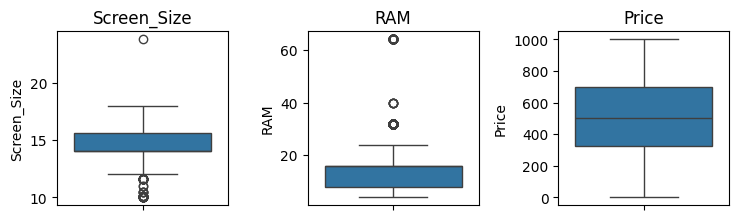

In [1580]:
plt.figure(figsize=(10, 10))
num_cols = df.select_dtypes(include = ["int64","float64"]) 

for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1) 
    sns.boxplot(df[col]) 
    plt.title(col)  

plt.tight_layout()

plt.show()

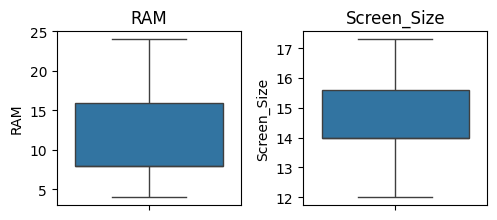

In [1581]:

outliers = ["RAM", "Screen_Size"]

plt.figure(figsize=(10, 10))

for i, col in enumerate(outliers):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UW = Q3 + 1.5 * IQR
    LW = Q1 - 1.5 * IQR
    
    # Identify outliers based on IQR
    outliers_mask = (df[col] < LW) | (df[col] > UW)
    
    # Remove outliers from the DataFrame
    df = df.loc[~outliers_mask]
    
    plt.subplot(5, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [1582]:
df = df.reset_index(drop=True)

In [1583]:
df

,Brand,Screen_Size,RAM,Processor,GPU,Resolution,Condition,Price
0,Lenovo,15.6,16,Intel i5,Intel Integrated,1920 x 1080,Very Good - Refurbished,344.99
1,Lenovo,14.0,16,Intel i5,Intel Integrated,1600 x 900,Very Good - Refurbished,189.99
2,Lenovo,14.0,16,Intel i5,Intel Integrated,1920 x 1080,Good - Refurbished,289.99
3,Dell,15.6,4,Intel i5,Intel Integrated,1920 x 1080,Very Good - Refurbished,349.99
4,Asus,15.6,16,Intel i7,Intel Integrated,1920 x 1080,New,538.95
...,...,...,...,...,...,...,...,...
3507,HP,15.6,8,Intel i5,Intel Integrated,1920 x 1080,New,405.99
3508,Dell,14.0,16,Intel i5,Intel Integrated,1920 x 1200,Excellent - Refurbished,792.76
3509,Dell,14.0,16,Intel i7,AMD Radeon RX 540,1920 x 1080,Excellent - Refurbished,527.21
3510,Dell,13.4,16,Intel i7,Intel Integrated,3456 x 2160,Excellent - Refurbished,628.30


## Visualisation

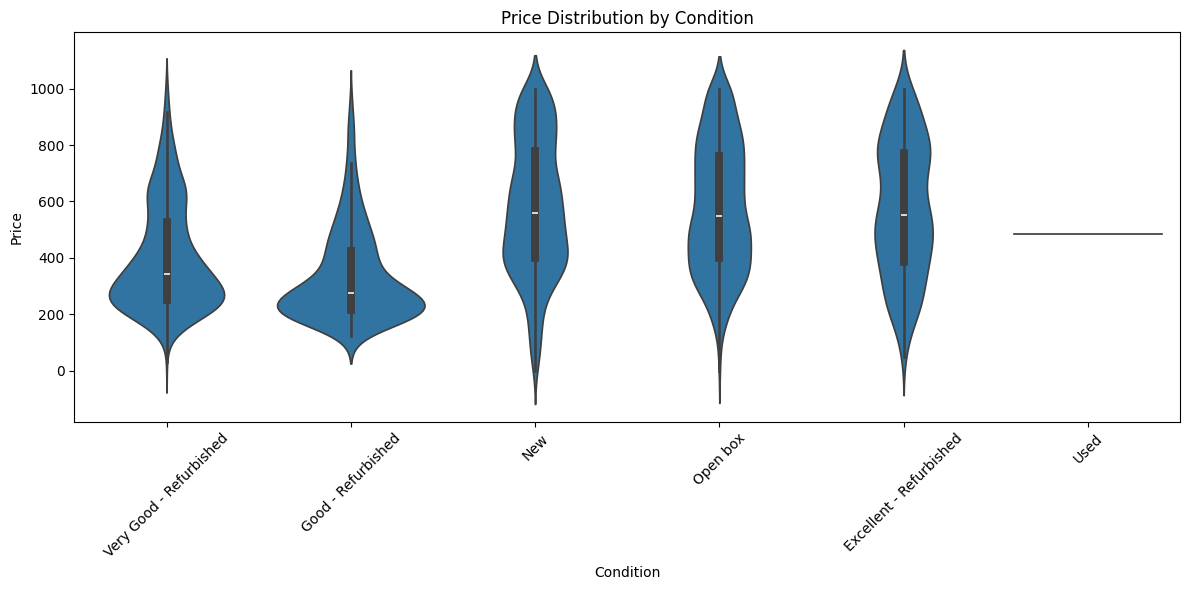

In [1587]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Condition', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

We can observe that New, Open Box, Excellent - Refurbished has a higher price when compared to Very Good - Refurbished, Good- Refurbished. So the price is directly proportional to condition.

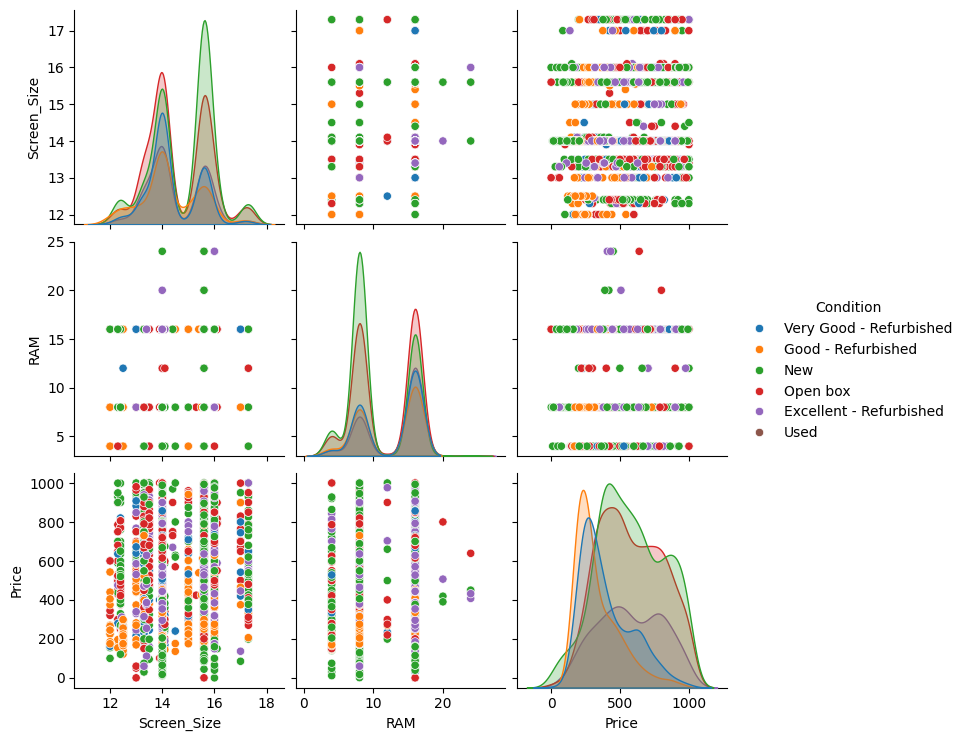

In [1592]:
sns.pairplot(df,hue='Condition')

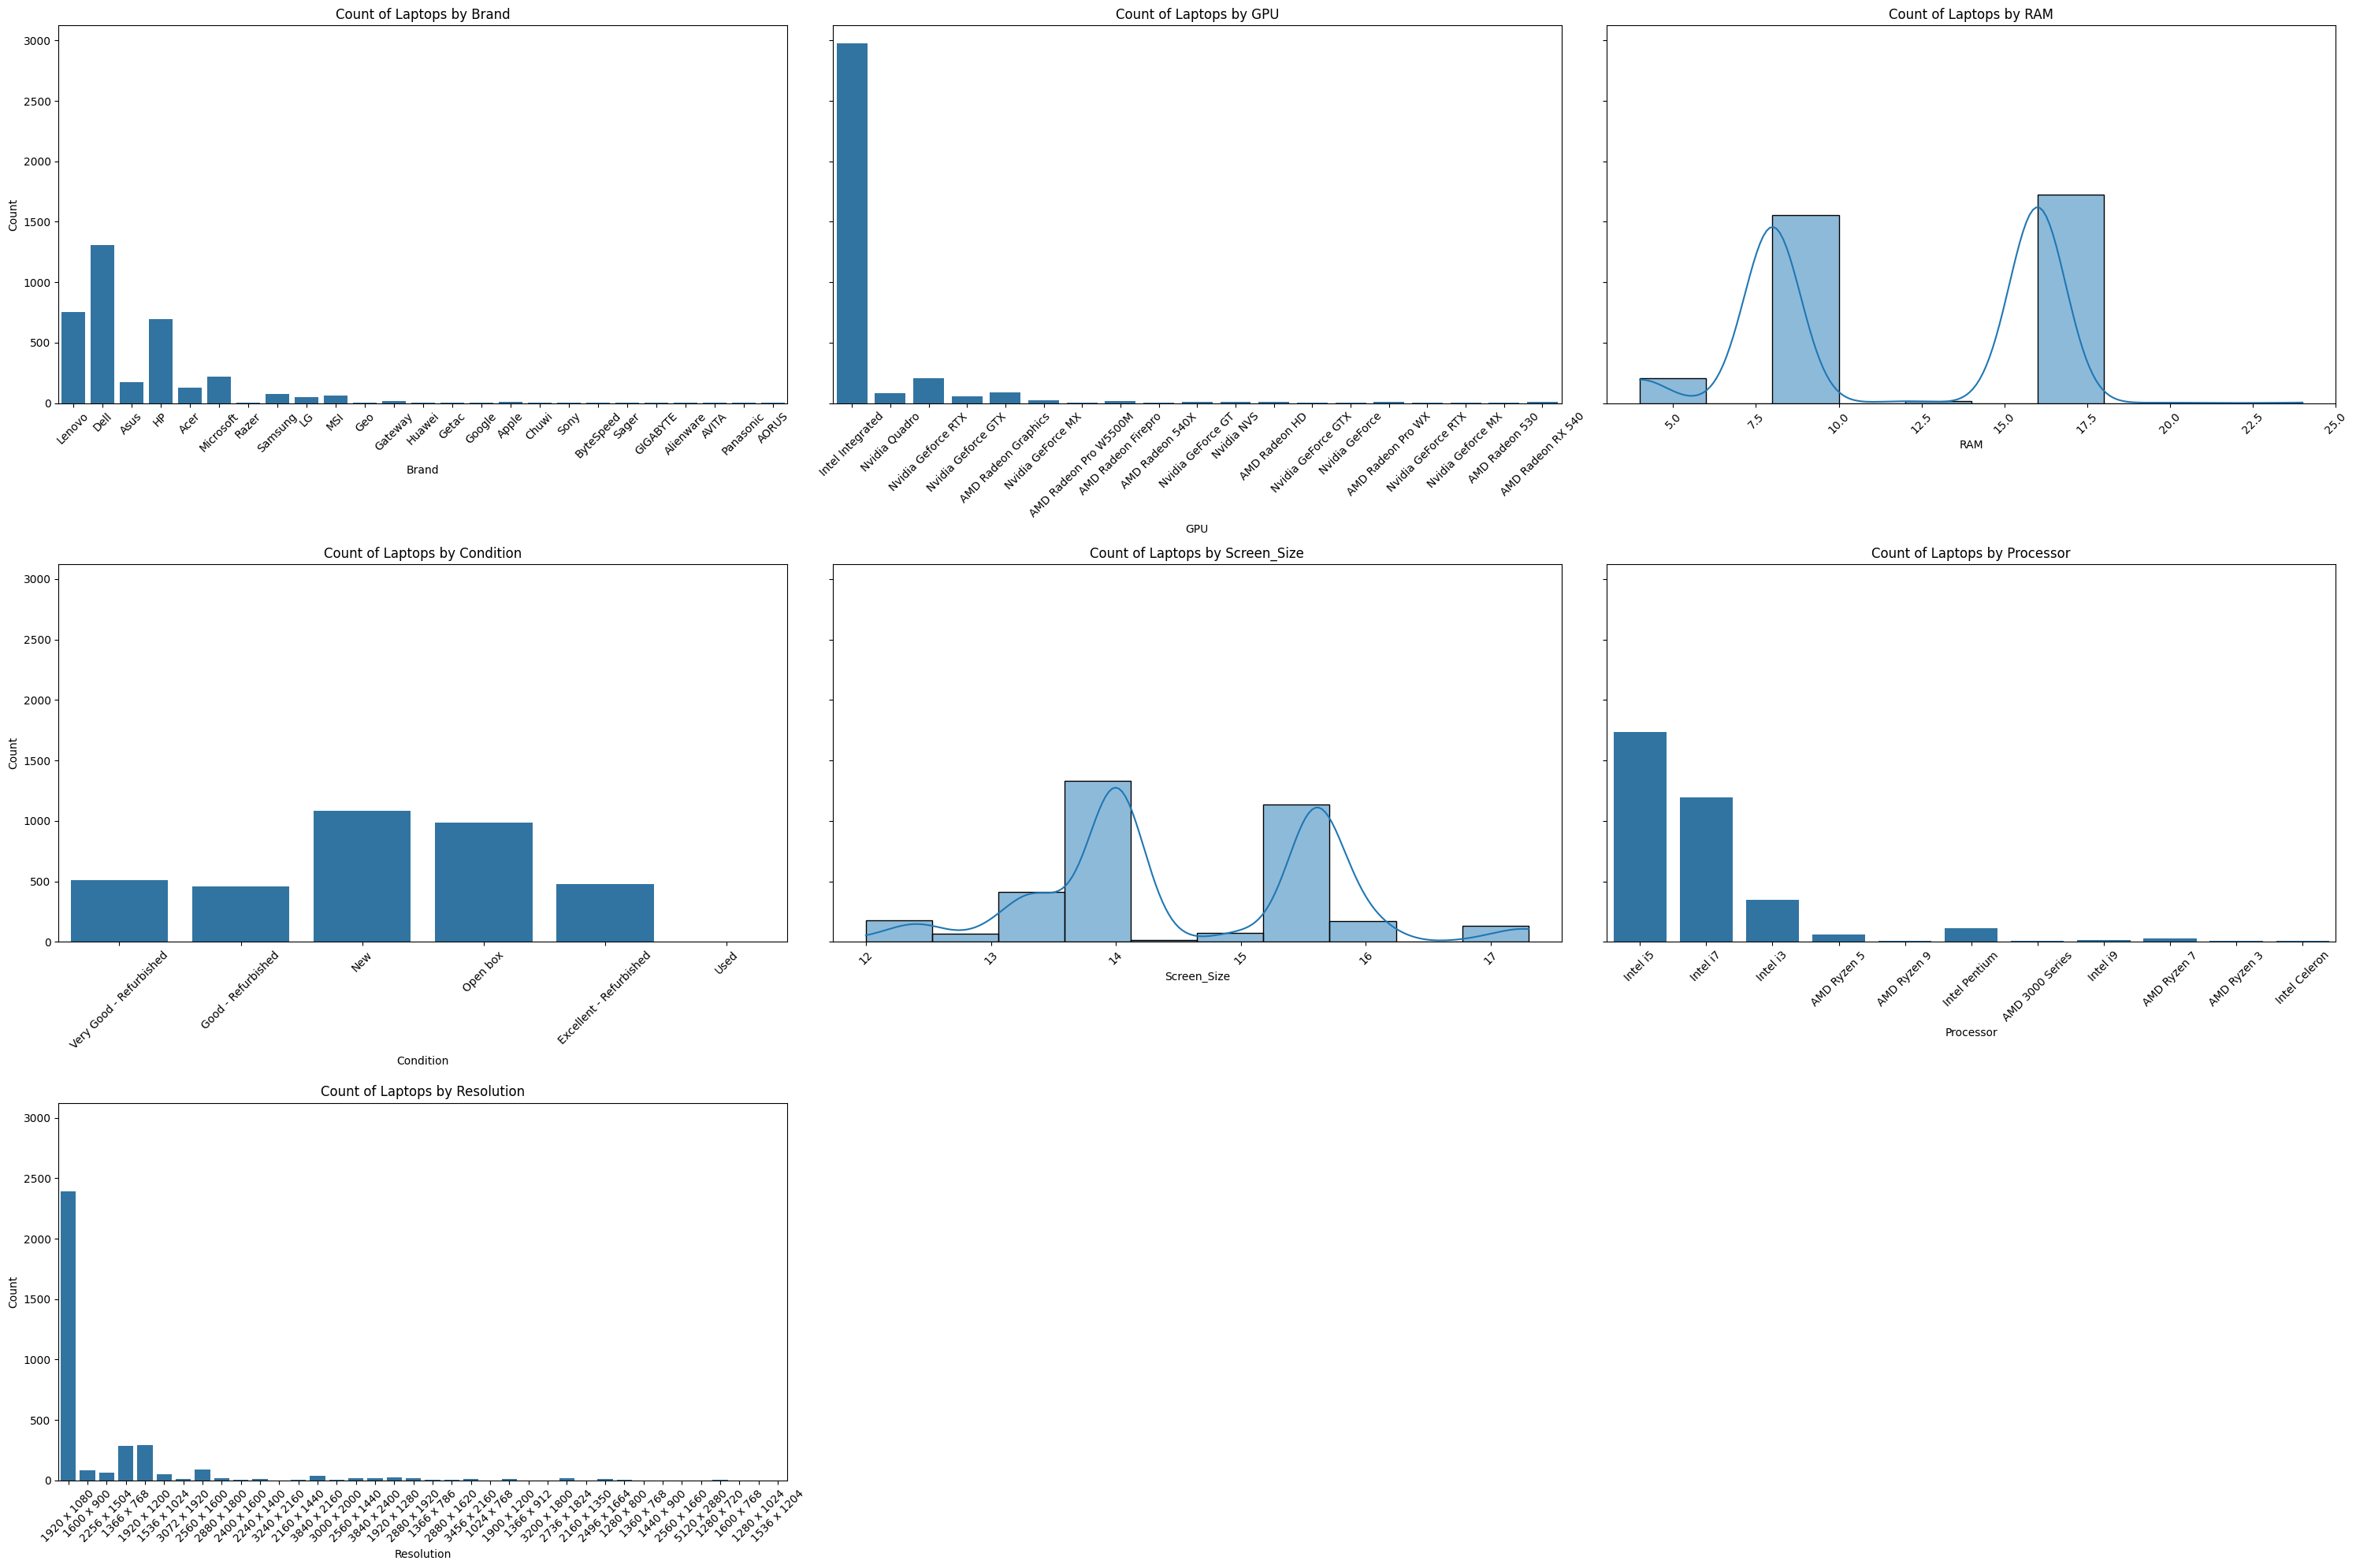

In [1617]:
# Create a grid layout with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(30, 20), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns):
    if df[col].dtype == 'object':  # Categorical columns
        sns.countplot(x=col, data=df, ax=axes[i])
    else:  # Numerical columns
        sns.histplot(df[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Count of Laptops by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

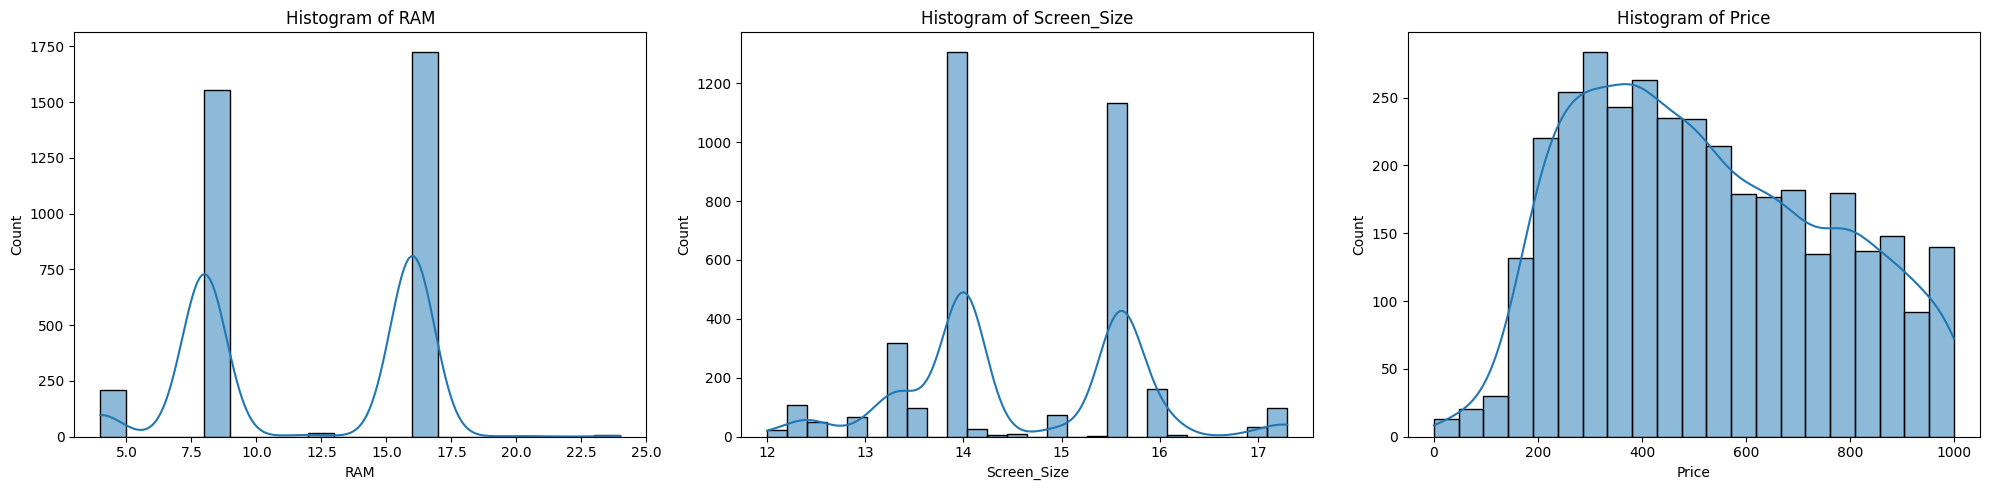

In [1588]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axes = axes.flatten()
for i, column in enumerate(['RAM','Screen_Size','Price']):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

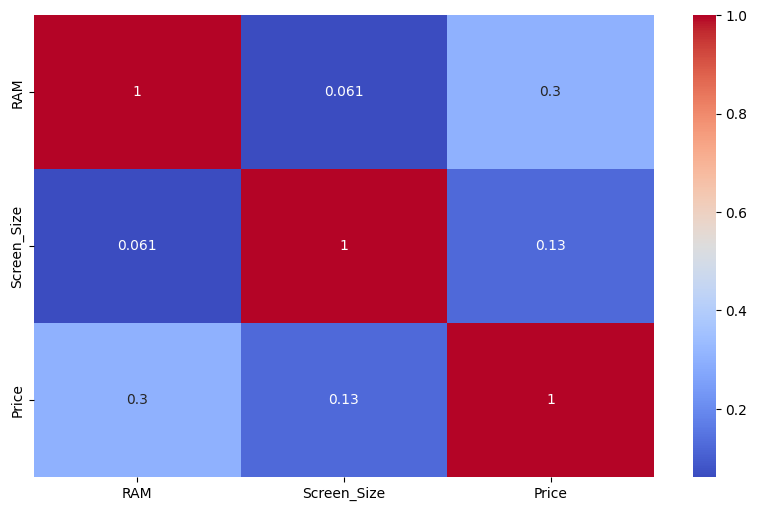

In [1589]:
plt.figure(figsize=(10, 6))
plot_df = df[['RAM','Screen_Size','Price']]
corr = plot_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [1590]:
from scipy.stats import skew,kurtosis
columns = ['RAM','Screen_Size','Price']
for column in columns:
    skew_val = df[column].skew()
    kurt_val = df[column].kurtosis()
    print(f"Column: {column}")
    print(f"Skewness: {skew_val}")
    print(f"Kurtosis: {kurt_val}")
    print("-" * 20)

Column: RAM
Skewness: -0.12036785661063423
Kurtosis: -1.6112899648965424
--------------------
Column: Screen_Size
Skewness: 0.16705300707374296
Kurtosis: -0.5742013750678883
--------------------
Column: Price
Skewness: 0.29498938677007913
Kurtosis: -0.9154012497275348
--------------------


In [1618]:
df

,Brand,Screen_Size,RAM,Processor,GPU,Resolution,Condition,Price
0,Lenovo,15.6,16,Intel i5,Intel Integrated,1920 x 1080,Very Good - Refurbished,344.99
1,Lenovo,14.0,16,Intel i5,Intel Integrated,1600 x 900,Very Good - Refurbished,189.99
2,Lenovo,14.0,16,Intel i5,Intel Integrated,1920 x 1080,Good - Refurbished,289.99
3,Dell,15.6,4,Intel i5,Intel Integrated,1920 x 1080,Very Good - Refurbished,349.99
4,Asus,15.6,16,Intel i7,Intel Integrated,1920 x 1080,New,538.95
...,...,...,...,...,...,...,...,...
3507,HP,15.6,8,Intel i5,Intel Integrated,1920 x 1080,New,405.99
3508,Dell,14.0,16,Intel i5,Intel Integrated,1920 x 1200,Excellent - Refurbished,792.76
3509,Dell,14.0,16,Intel i7,AMD Radeon RX 540,1920 x 1080,Excellent - Refurbished,527.21
3510,Dell,13.4,16,Intel i7,Intel Integrated,3456 x 2160,Excellent - Refurbished,628.30


## Feature Engineering

In [1619]:
df=pd.get_dummies(data=df,columns = ['Brand','Processor','GPU','Resolution','Condition'])

In [1620]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = ['Screen_Size', 'RAM','Price']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [1621]:
x=df.drop(columns='Price')
y=df["Price"]
y = y.ravel()

In [1622]:
x

,Screen_Size,RAM,Brand_AORUS,Brand_AVITA,Brand_Acer,Brand_Alienware,Brand_Apple,Brand_Asus,Brand_ByteSpeed,Brand_Chuwi,...,Resolution_3456 x 2160,Resolution_3840 x 2160,Resolution_3840 x 2400,Resolution_5120 x 2880,Condition_Excellent - Refurbished,Condition_Good - Refurbished,Condition_New,Condition_Open box,Condition_Used,Condition_Very Good - Refurbished
0,0.679245,0.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.377358,0.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.377358,0.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.679245,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.679245,0.6,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,0.679245,0.2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3508,0.377358,0.6,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3509,0.377358,0.6,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3510,0.264151,0.6,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


## Data Splitting

In [1623]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Training without Feature Selection and Hyperparameter tuning

In [1637]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score, root_mean_squared_error
import math
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []

models = [
LinearRegression(),
DecisionTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
SVR(),
]
for model in models :
    model.fit(x_train , y_train)
    prediction = model.predict(x_test)
    model_name.append(model.__class__.__name__)
    RMSE.append(root_mean_squared_error(y_test, prediction))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction)*100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
LinearRegression,141064031381.030457,19899060949468349202432.000000,7433412507.968368,-35857765847828079707160576.000000
DecisionTreeRegressor,0.204540,0.041836,0.145569,24.611432
RandomForestRegressor,0.185731,0.034496,0.135138,37.838651
GradientBoostingRegressor,0.179701,0.032292,0.138160,41.809645
SVR,0.175322,0.030738,0.130737,44.611239


From this it can be inferred as Linear regression evaluation metrics are not in the desired range, this could be possibly due to overfitting, hence feature selection is important

# Feature Selection 

## Feature Importance using Random Forest

In [1624]:
x.shape

(3512, 101)

In [1625]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train , y_train)
# Extract feature importances
feature_importances = rf.feature_importances_
# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
# Print feature importances
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{x.columns[idx]}: {feature_importances[idx]}")

Feature Importances:
RAM: 0.14214891967635757
Condition_Good - Refurbished: 0.12745999925950513
Condition_Very Good - Refurbished: 0.10644074942047005
Screen_Size: 0.10326313956568896
Processor_Intel i3: 0.04962370920132339
Brand_Dell: 0.03441265517394329
Condition_Excellent - Refurbished: 0.033890885709653394
Processor_Intel i7: 0.03200029420921137
Resolution_1920 x 1200: 0.02606847956637766
Resolution_1920 x 1080: 0.024355907400139994
GPU_Nvidia Geforce RTX: 0.023858271283288737
Brand_Lenovo: 0.02167888942637649
Condition_New: 0.01991527567501464
Condition_Open box: 0.01873641204812413
Processor_Intel i5: 0.016836137228323177
GPU_Intel Integrated: 0.015160388789939623
Brand_HP: 0.014946794224381317
Resolution_1366 x 768: 0.01471146921870242
Processor_Intel Pentium: 0.0136599162674228
Resolution_2560 x 1600: 0.011712066012875966
Brand_Acer: 0.010677928180516669
Brand_Microsoft: 0.009031372663285492
Brand_Asus: 0.007235237991191444
Resolution_1600 x 900: 0.007141848576094446
Brand_Gate

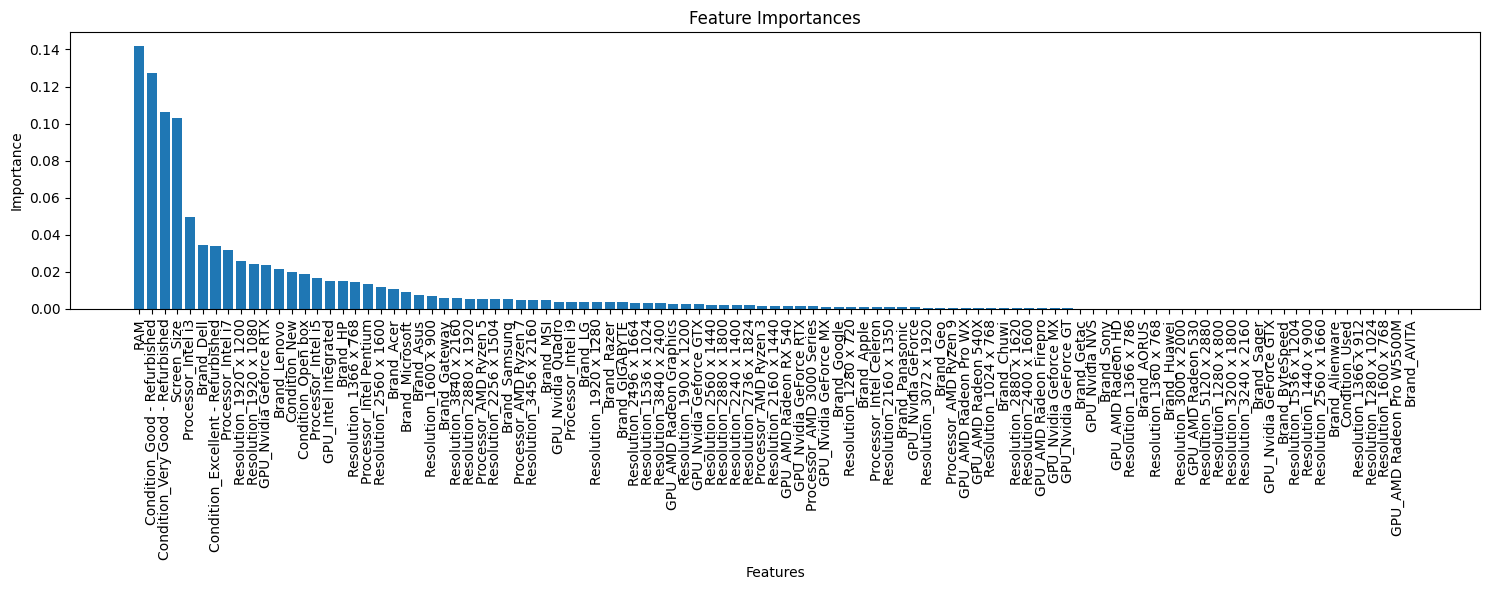

In [1626]:
import matplotlib.pyplot as plt
# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = [x.columns[idx] for idx in sorted_indices]
sorted_importances = [feature_importances[idx] for idx in sorted_indices]
# Plot feature importances
plt.figure(figsize=(15, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

## Feature Selection using SelectKBest

In [1627]:
from sklearn.feature_selection import SelectKBest, f_regression
# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=50)
X_kbest = selector_kbest.fit_transform(x_train, y_train)
# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)
# Get the names of the selected features
selected_features_kbest = x_train.columns[selected_indices_kbest]
print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['Screen_Size', 'RAM', 'Brand_AORUS', 'Brand_Dell', 'Brand_Gateway',
       'Brand_LG', 'Brand_Lenovo', 'Brand_MSI', 'Brand_Microsoft',
       'Brand_Sager', 'Brand_Samsung', 'Processor_AMD 3000 Series',
       'Processor_AMD Ryzen 3', 'Processor_AMD Ryzen 7',
       'Processor_AMD Ryzen 9', 'Processor_Intel i3', 'Processor_Intel i5',
       'Processor_Intel i7', 'Processor_Intel i9', 'GPU_AMD Radeon Firepro',
       'GPU_AMD Radeon HD', 'GPU_Intel Integrated', 'GPU_Nvidia GeForce GT',
       'GPU_Nvidia GeForce MX', 'GPU_Nvidia GeForce RTX',
       'GPU_Nvidia Geforce GTX', 'GPU_Nvidia Geforce RTX', 'GPU_Nvidia NVS',
       'Resolution_1280 x 800', 'Resolution_1366 x 768',
       'Resolution_1600 x 900', 'Resolution_1920 x 1080',
       'Resolution_1920 x 1200', 'Resolution_2160 x 1440',
       'Resolution_2240 x 1400', 'Resolution_2400 x 1600',
       'Resolution_2496 x 1664', 'Resolution_2560 x 1600',
       'Resolution_2736 x 1824', 'Resol

In [1628]:
x_kbest= x[['Screen_Size', 'RAM', 'Brand_AORUS', 'Brand_Dell', 'Brand_Gateway',
       'Brand_LG', 'Brand_Lenovo', 'Brand_MSI', 'Brand_Microsoft',
       'Brand_Sager', 'Brand_Samsung', 'Processor_AMD 3000 Series',
       'Processor_AMD Ryzen 3', 'Processor_AMD Ryzen 7',
       'Processor_AMD Ryzen 9', 'Processor_Intel i3', 'Processor_Intel i5',
       'Processor_Intel i7', 'Processor_Intel i9', 'GPU_AMD Radeon Firepro',
       'GPU_AMD Radeon HD', 'GPU_Intel Integrated', 'GPU_Nvidia GeForce GT',
       'GPU_Nvidia GeForce MX', 'GPU_Nvidia GeForce RTX',
       'GPU_Nvidia Geforce GTX', 'GPU_Nvidia Geforce RTX', 'GPU_Nvidia NVS',
       'Resolution_1280 x 800', 'Resolution_1366 x 768',
       'Resolution_1600 x 900', 'Resolution_1920 x 1080',
       'Resolution_1920 x 1200', 'Resolution_2160 x 1440',
       'Resolution_2240 x 1400', 'Resolution_2400 x 1600',
       'Resolution_2496 x 1664', 'Resolution_2560 x 1600',
       'Resolution_2736 x 1824', 'Resolution_2880 x 1800',
       'Resolution_2880 x 1920', 'Resolution_3072 x 1920',
       'Resolution_3456 x 2160', 'Resolution_3840 x 2160',
       'Resolution_3840 x 2400', 'Condition_Excellent - Refurbished',
       'Condition_Good - Refurbished', 'Condition_New', 'Condition_Open box',
       'Condition_Very Good - Refurbished']]

In [1629]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_kbest,y,test_size = 0.2,random_state=55)

In [1630]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score, root_mean_squared_error
import math
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []

models = [
LinearRegression(),
DecisionTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
SVR(),
]
for model in models :
    model.fit(x1_train , y1_train)
    prediction = model.predict(x1_test)
    model_name.append(model.__class__.__name__)
    RMSE.append(root_mean_squared_error(y1_test, prediction))
    MSE.append(mean_squared_error(y1_test, prediction))
    MAE.append(mean_absolute_error(y1_test, prediction))
    R2_score.append(r2_score(y1_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
SVR,0.169631,0.028775,0.125493,48.612483
GradientBoostingRegressor,0.174002,0.030277,0.131969,45.930350
RandomForestRegressor,0.176219,0.031053,0.128180,44.543287
LinearRegression,0.180176,0.032463,0.135785,42.024863
DecisionTreeRegressor,0.191915,0.036831,0.136689,34.224403


## Hyperparameter tuning

In [1631]:
# Define parameter grids
param_grids = {
    'LinearRegression': {
    'fit_intercept': [True, False],
    },
    'DecisionTreeRegressor': {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestRegressor': {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
    },
    'GradientBoostingRegressor': {
    'n_estimators': [50, 100],
    'learning_rate': [0.05,0.2],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
    },
    'SVR': {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
    }
            }
# Lists to store the results
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]
for model in models:
    model_class_name = model.__class__.__name__
    param_grid = param_grids[model_class_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=8, verbose=1)
    grid_search.fit(x1_train, y1_train)
    
    best_model = grid_search.best_estimator_
    prediction = best_model.predict(x1_test)
    
    model_name.append(model_class_name)
    RMSE.append(root_mean_squared_error(y1_test, prediction))
    MSE.append(mean_squared_error(y1_test, prediction))
    MAE.append(mean_absolute_error(y1_test, prediction))
    R2_score.append(r2_score(y1_test, prediction) * 100)
# Create a DataFrame with the results
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "R2_Score": R2_score
})
    
models_df = models_df.set_index('Model-Name')
models_df = models_df.sort_values("R2_Score", ascending=False)

models_df

Fitting 8 folds for each of 2 candidates, totalling 16 fits
Fitting 8 folds for each of 27 candidates, totalling 216 fits
Fitting 8 folds for each of 27 candidates, totalling 216 fits
Fitting 8 folds for each of 64 candidates, totalling 512 fits
Fitting 8 folds for each of 12 candidates, totalling 96 fits


,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
SVR,0.169631,0.028775,0.125493,48.612483
GradientBoostingRegressor,0.170953,0.029225,0.127918,47.808420
RandomForestRegressor,0.172413,0.029726,0.128324,46.912863
LinearRegression,0.180198,0.032471,0.135776,42.010616
DecisionTreeRegressor,0.183162,0.033548,0.136612,40.087754


## Feature Selection using Recursive Feature Elimination

In [1640]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
# Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# RFE with Random Forest regressor
rfe_selector_regressor = RFE(estimator=rf_regressor, n_features_to_select=50, step=1)
X_rfe_regressor = rfe_selector_regressor.fit_transform(x_train, y_train)
# Get the selected feature indices
selected_indices_rfe_regressor = rfe_selector_regressor.get_support(indices=True)
# Get the names of the selected features
selected_features_rfe_regressor = x_train.columns[selected_indices_rfe_regressor]
print("Selected features using RFE with Random Forest Regressor:", selected_features_rfe_regressor)

Selected features using RFE with Random Forest Regressor: Index(['Screen_Size', 'RAM', 'Brand_Acer', 'Brand_Asus', 'Brand_Dell',
       'Brand_GIGABYTE', 'Brand_Gateway', 'Brand_HP', 'Brand_LG',
       'Brand_Lenovo', 'Brand_MSI', 'Brand_Microsoft', 'Brand_Razer',
       'Brand_Samsung', 'Processor_AMD Ryzen 5', 'Processor_AMD Ryzen 7',
       'Processor_Intel Pentium', 'Processor_Intel i3', 'Processor_Intel i5',
       'Processor_Intel i7', 'Processor_Intel i9', 'GPU_AMD Radeon Graphics',
       'GPU_Intel Integrated', 'GPU_Nvidia Geforce GTX',
       'GPU_Nvidia Geforce RTX', 'GPU_Nvidia Quadro', 'Resolution_1366 x 768',
       'Resolution_1536 x 1024', 'Resolution_1600 x 900',
       'Resolution_1900 x 1200', 'Resolution_1920 x 1080',
       'Resolution_1920 x 1200', 'Resolution_1920 x 1280',
       'Resolution_2160 x 1440', 'Resolution_2240 x 1400',
       'Resolution_2256 x 1504', 'Resolution_2496 x 1664',
       'Resolution_2560 x 1440', 'Resolution_2560 x 1600',
       'Resoluti

In [1641]:
x_rfe= x[['Screen_Size', 'RAM', 'Brand_AORUS', 'Brand_Dell', 'Brand_Gateway',
       'Brand_LG', 'Brand_Lenovo', 'Brand_MSI', 'Brand_Microsoft',
       'Brand_Sager', 'Brand_Samsung', 'Processor_AMD 3000 Series',
       'Processor_AMD Ryzen 3', 'Processor_AMD Ryzen 7',
       'Processor_AMD Ryzen 9', 'Processor_Intel i3', 'Processor_Intel i5',
       'Processor_Intel i7', 'Processor_Intel i9', 'GPU_AMD Radeon Firepro',
       'GPU_AMD Radeon HD', 'GPU_Intel Integrated', 'GPU_Nvidia GeForce GT',
       'GPU_Nvidia GeForce MX', 'GPU_Nvidia GeForce RTX',
       'GPU_Nvidia Geforce GTX', 'GPU_Nvidia Geforce RTX', 'GPU_Nvidia NVS',
       'Resolution_1280 x 800', 'Resolution_1366 x 768',
       'Resolution_1600 x 900', 'Resolution_1920 x 1080',
       'Resolution_1920 x 1200', 'Resolution_2160 x 1440',
       'Resolution_2240 x 1400', 'Resolution_2400 x 1600',
       'Resolution_2496 x 1664', 'Resolution_2560 x 1600',
       'Resolution_2736 x 1824', 'Resolution_2880 x 1800',
       'Resolution_2880 x 1920', 'Resolution_3072 x 1920',
       'Resolution_3456 x 2160', 'Resolution_3840 x 2160',
       'Resolution_3840 x 2400', 'Condition_Excellent - Refurbished',
       'Condition_Good - Refurbished', 'Condition_New', 'Condition_Open box',
       'Condition_Very Good - Refurbished']]

In [1642]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x_rfe,y,test_size = 0.2,random_state=55)

In [1646]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score, root_mean_squared_error
import math
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []

models = [
LinearRegression(),
DecisionTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
SVR(),
]
for model in models :
    model.fit(x2_train , y2_train)
    prediction = model.predict(x2_test)
    model_name.append(model.__class__.__name__)
    RMSE.append(root_mean_squared_error(y2_test, prediction))
    MSE.append(mean_squared_error(y2_test, prediction))
    MAE.append(mean_absolute_error(y2_test, prediction))
    R2_score.append(r2_score(y2_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
SVR,0.169631,0.028775,0.125493,48.612483
GradientBoostingRegressor,0.174126,0.030320,0.132101,45.853075
RandomForestRegressor,0.176830,0.031269,0.128611,44.158485
LinearRegression,0.180176,0.032463,0.135785,42.024863
DecisionTreeRegressor,0.192924,0.037220,0.136790,33.530700


### Hyperparameter tuning

In [1645]:
# Define parameter grids
param_grids = {
    'LinearRegression': {
    'fit_intercept': [True, False],
    },
    'DecisionTreeRegressor': {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestRegressor': {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
    },
    'GradientBoostingRegressor': {
    'n_estimators': [50, 100],
    'learning_rate': [0.05,0.2],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
    },
    'SVR': {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
    }
            }
# Lists to store the results
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]
for model in models:
    model_class_name = model.__class__.__name__
    param_grid = param_grids[model_class_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=8, verbose=1)
    grid_search.fit(x2_train, y2_train)
    
    best_model = grid_search.best_estimator_
    prediction = best_model.predict(x2_test)
    
    model_name.append(model_class_name)
    RMSE.append(root_mean_squared_error(y2_test, prediction))
    MSE.append(mean_squared_error(y2_test, prediction))
    MAE.append(mean_absolute_error(y2_test, prediction))
    R2_score.append(r2_score(y2_test, prediction) * 100)
# Create a DataFrame with the results
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "R2_Score": R2_score
})
    
models_df = models_df.set_index('Model-Name')
models_df = models_df.sort_values("R2_Score", ascending=False)

models_df

Fitting 8 folds for each of 2 candidates, totalling 16 fits
Fitting 8 folds for each of 27 candidates, totalling 216 fits
Fitting 8 folds for each of 27 candidates, totalling 216 fits
Fitting 8 folds for each of 64 candidates, totalling 512 fits
Fitting 8 folds for each of 12 candidates, totalling 96 fits


,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
SVR,0.169631,0.028775,0.125493,48.612483
GradientBoostingRegressor,0.170876,0.029199,0.125078,47.855218
RandomForestRegressor,0.172821,0.029867,0.128643,46.661532
LinearRegression,0.180198,0.032471,0.135776,42.010616
DecisionTreeRegressor,0.183162,0.033548,0.136612,40.087754


## Result

Support Vector Regressor has the best performance among all listed models, indicated by the lowest RMSE, MSE, and MAE, and the
highest R2 score. It suggests that the Support Vector Regressor is able to capture the underlying patterns in the data very well before
and after feature selection.

## Save model using joblib

In [1649]:
import joblib
# saves the model object to a file named model_joblib using the joblib.dump function.
joblib.dump(model,'model_joblib')

['model_joblib']

## Limitations

The dataset primarily contains laptops with Intel processor and Integrated graphics. To accurately pridict the prices we need a bit more data with AMD processors and other graphic cards

The dataset is scraped from eBay in which the prices are decided by induvidual sellers so there might be some disputes with the market standard even though we get details with laptop of various conditions which can also be benificial to the model

The product catalog of eBay didn't contain some necessary features which also can cause the decline in performance of the model.

## Conclusion

We performed EDA and created a machine learning model using the given dataset of laptop prices.

The dataset required much work during preprocessing. The null and wrong data was filled accuarately using the product description column present in the dataset and with the help of web search.

After the cleaning we created different plots to study the data distribution. The condition of the laptops were proportional to the price. The skewness and kurtosis values of numerical columns were in range. There was impalance regarding Processor, Graphics and also resolution where one particulat category were much higher than other values altogether.

The resultant dataframe were subjected to one hot encoding and the numerical columns were scaled using minmax scaler. Upon model training we observed that Linear regression model evaluation metrics was way above range possibly due to overfitting hence proceeded with feature selection.

After performing Kbest, and RFE feature selection methods we got maximum efficiency in Support Vector Regression algorithm.

## Future Work

We need to collect more data with AMD processors, Nvidia and AMD Graphics cards and laptops with other resolutions in order to create a balanced dataset.

We need to get more features like storage space which can aid accurate price prediction.

We can rely on other sources other than eBay which has better feature catalog, and pricing close to market standards